In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
import textwrap
import functions

colors_2 = ["#4096E6", "#40E6DD"]
colors_3 = ["#4096E6", "#53D8FC", "#40E6DD"]
colors_4 = ["#4776FE", "#4096E6", "#40E6DD", "#47FEC1"]
colors_5 = ["#4776FE", "#4096E6", "#53D8FC", "#40E6DD", "#47FEC1"]

In [2]:
pd.options.display.max_colwidth = 500

In [3]:
file = "../data/2019-2020 Pew Research Center International Science Survey.sav"
data, metadata = pyreadstat.read_sav(file)

In [4]:
# US only
data = data[data['place'] == 20].copy()

In [5]:
drop_cols = ['Q41d_alt', 'place', 'QRID', 'QT1a', 'QT1b', 'QT2a', 'QT2b', 'QT3a', 'QT3b', 'PTYAUS_a', 'PTYAUS_b', 
             'PTYAUS_c',
             'PTYAUS_d', 'PTYBRA_a', 'PTYBRA_b', 'PTYBRA_c', 'PTYBRI_a', 'PTYBRI_b', 'PTYBRI_c', 'PTYBRI_d', 
             'PTYCAN_A', 'PTYCAN_B', 'PTYCAN_C', 'PTYCAN_D', 'PTYCZE_a', 'PTYCZE_b', 'PTYCZE_c', 'PTYCZE_d', 
             'PTYFRA_a', 'PTYFRA_b', 'PTYFRA_c', 'PTYFRA_d', 'PTYFRA_e', 'PTYGER_a', 'PTYGER_b', 'PTYGER_c', 
             'PTYGER_d', 'PTYIND_a', 'PTYIND_b', 'PTYITA_a', 'PTYITA_b', 'PTYITA_c', 'PTYITA_d', 'PTYJPN_a', 
             'PTYJPN_b', 'PTYJPN_c', 'PTYMAL_a', 'PTYMAL_b', 'PTYMAL_c', 'PTYNLD_a', 'PTYNLD_b', 'PTYNLD_c', 
             'PTYNLD_d', 'PTYPOL_a', 'PTYPOL_b', 'PTYPOL_c', 'PTYPOL_d', 'PTYRUS_a', 'PTYRUS_b', 'PTYRUS_c',
             'PTYSIN_a', 'PTYSIN_b', 'PTYSPA_a', 'PTYSPA_b', 'PTYSPA_c', 'PTYSPA_d', 'PTYSWE_a', 'PTYSWE_b', 
             'PTYSWE_c', 'PTYTAI_a', 'PTYTAI_b', 'EDUaAUS', 'EDUaGER', 'EDUAUS', 'EDUbAUS', 'EDUBRA', 'EDUBRI',
             'EDUCAN', 'EDUCZE', 'EDUFRA', 'EDUGER', 'EDUIND', 'EDUITA', 'EDUJPN', 'EDUKOR', 'EDUMAL', 'EDUNLD', 
             'EDUPOL', 'EDURUS', 'EDUSIN', 'EDUSPA', 'EDUSWE', 'EDUTAI', 'ethausam1', 'ethausam2', 'ethausam3', 
             'ethausam4', 'ETHBRA', 'ethbusa', 'ETHIND', 'ETHMAL', 'ETHSIN', 'ETHTAI', 'ethusa', 'PIDa', 'PIDATAI', 
             'PIDAUS', 'pidausa', 'PIDBRA', 'PIDBRI', 'PIDCAN', 'PIDCZE', 'PIDFRA', 'PIDGER', 'PIDIND', 'PIDITA', 
             'PIDJPN', 'PIDMAL', 'PIDNLD', 'PIDPOL', 'PIDRUS', 'PIDSIN', 'PIDSPA', 'PIDSWE', 'PIDTAI', 'pidusa', 
             'pidusa_5_other', 'IDO', 'CURRELAUS', 'CURRELBRA', 'CURRELBRI', 'CURRELCAN', 'CURRELCZE', 'CURRELFRA', 
             'CURRELGER', 'CURRELIND', 'CURRELITA', 'CURRELJPN', 'CURRELKOR', 'CURRELMAL', 'CURRELNLD', 'CURRELPOL', 
             'CURRELRUS', 'CURRELSIN', 'CURRELSPA', 'CURRELSWE', 'CURRELTAI', 'ATTEND_M', 'PRAY_M', 'HOME', 
             'racecmbusa', 'partysumideo_usa', 
             'partyideousa', 'HH2b', 'CALL1', 'CALL2', 'CALL3', 'QLANG', 'S1', 'T.Sample', 'QDATE_S', 'QDATE_E', 
             'deff']
data.drop(columns = drop_cols, inplace = True)

In [6]:
# dictionary for column name: question wording
wording_dict = dict(zip(metadata.column_names, metadata.column_labels))

In [7]:
# nested dictionary for column name: response labels
response_dict = metadata.variable_value_labels

---
# Q1

In [8]:
wording_dict['Q1']

'Q1. Overall, are you satisfied or dissatisfied with the way things are going in (survey public) today?'

In [9]:
response_dict['Q1']

{1.0: 'Satisfied',
 2.0: 'Dissatisfied',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [10]:
functions.univar_table(data, 'weight', 'Q1', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q1                                          
1.0      Satisfied   534  35.5   33.1   38.0
2.0   Dissatisfied   881  58.7   56.2   61.2
99.0    DK/Refused    87   5.8    4.6    7.0

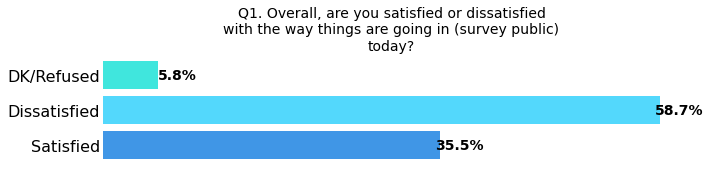

In [11]:
functions.univar_bar(data, 'weight', 'Q1', response_dict, wording_dict, figh = 1.5, nudge_dlab=2, color = colors_3)

In [12]:
################
# Q1 transform #
################

conditions = [data['Q1'] == 1, 
              data['Q1'] == 2, 
              data['Q1'] == 99]
outputs = [1, -1, 0]
data['q1_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q1_rec'] = wording_dict['Q1']

# update labels dict with categories and labels
response_dict['q1_rec'] = {
    -1: "Dissatisfied",
    0: "DK/Ref",
    1: "Satisfied"
}

In [13]:
functions.univar_table(data, 'weight', 'q1_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q1_rec                                        
-1      Dissatisfied   881  58.7   56.2   61.2
 0            DK/Ref    87   5.8    4.6    7.0
 1         Satisfied   534  35.5   33.1   38.0

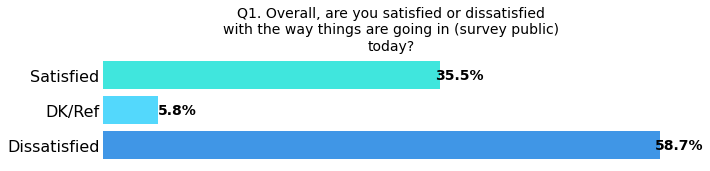

In [14]:
functions.univar_bar(data, 'weight', 'q1_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=2, color = colors_3)

---
# Q2a

In [15]:
wording_dict['Q2a']

'Q2a. How much do you trust ____ to do what is right for (survey public) — a lot, some, not too much, or not at all? a. the national government'

In [16]:
response_dict['Q2a']

{1.0: 'A lot',
 2.0: 'Some',
 3.0: 'Not too much',
 4.0: 'Not at all',
 98.0: "Don't know (DO NOT READ}",
 99.0: 'DK/Refused'}

In [17]:
functions.univar_table(data, 'weight', 'Q2a', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q2a                                         
1.0          A lot   125   8.3    6.9    9.7
2.0           Some   535  35.7   33.2   38.1
3.0   Not too much   438  29.2   26.9   31.5
4.0     Not at all   373  24.8   22.7   27.0
99.0    DK/Refused    30   2.0    1.3    2.7

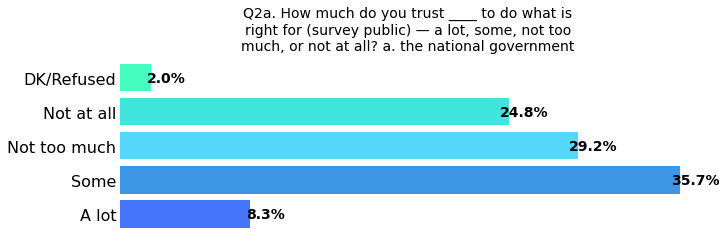

In [18]:
functions.univar_bar(data, 'weight', 'Q2a', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [19]:
#################
# Q2a transform #
#################

conditions = [data['Q2a'] == 1, 
              data['Q2a'] == 2,
              data['Q2a'] == 3,
              data['Q2a'] == 4,
              data['Q2a'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q2a_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q2a_rec'] = wording_dict['Q2a']

# update labels dict with categories and labels
response_dict['q2a_rec'] = {
    -1: "Not at all",
    -0.5: "Not too much",
    0: "DK/Ref",
    0.5: "Some",
    1: "A lot"
}

In [20]:
functions.univar_table(data, 'weight', 'q2a_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q2a_rec                                        
-1.0       Not at all   373  24.8   22.7   27.0
-0.5     Not too much   438  29.2   26.9   31.5
 0.0           DK/Ref    30   2.0    1.3    2.7
 0.5             Some   535  35.7   33.2   38.1
 1.0            A lot   125   8.3    6.9    9.7

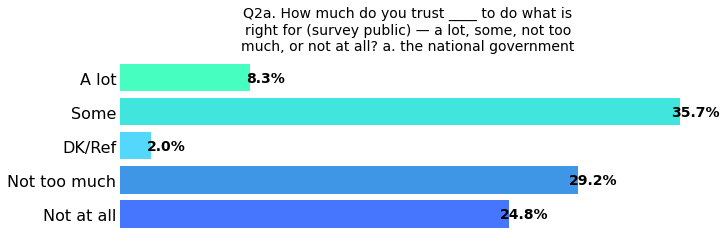

In [21]:
functions.univar_bar(data, 'weight', 'q2a_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

---
# Q2b

In [22]:
wording_dict['Q2b']

'Q2b. How much do you trust ____ to do what is right for (survey public) — a lot, some, not too much, or not at all? b. the military'

In [23]:
response_dict['Q2b']

{1.0: 'A lot',
 2.0: 'Some',
 3.0: 'Not too much',
 4.0: 'Not at all',
 98.0: "Don't know (DO NOT READ}",
 99.0: 'DK/Refused'}

In [24]:
functions.univar_table(data, 'weight', 'Q2b', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q2b                                         
1.0          A lot   846  56.4   53.8   58.9
2.0           Some   441  29.3   27.0   31.7
3.0   Not too much   113   7.5    6.2    8.8
4.0     Not at all    78   5.2    4.0    6.3
99.0    DK/Refused    25   1.6    1.0    2.3

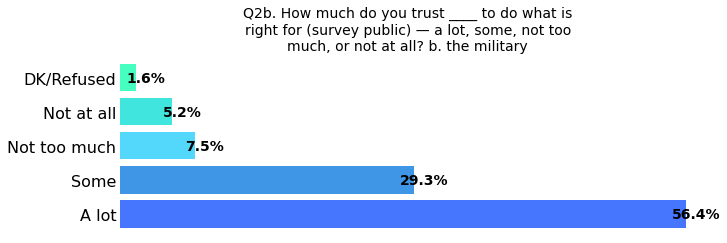

In [25]:
functions.univar_bar(data, 'weight', 'Q2b', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [26]:
#################
# Q2b transform #
#################

conditions = [data['Q2b'] == 1, 
              data['Q2b'] == 2,
              data['Q2b'] == 3,
              data['Q2b'] == 4,
              data['Q2b'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q2b_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q2b_rec'] = wording_dict['Q2b']

# update labels dict with categories and labels
response_dict['q2b_rec'] = {
    -1: "Not at all",
    -0.5: "Not too much",
    0: "DK/Ref",
    0.5: "Some",
    1: "A lot"
}

In [27]:
functions.univar_table(data, 'weight', 'q2b_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q2b_rec                                        
-1.0       Not at all    78   5.2    4.0    6.3
-0.5     Not too much   113   7.5    6.2    8.8
 0.0           DK/Ref    25   1.6    1.0    2.3
 0.5             Some   441  29.3   27.0   31.7
 1.0            A lot   846  56.4   53.8   58.9

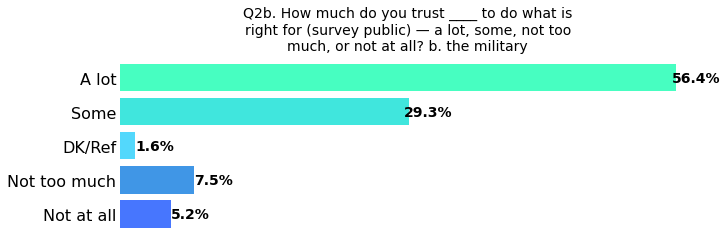

In [28]:
functions.univar_bar(data, 'weight', 'q2b_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=2, color = colors_5)

# Q2c

In [29]:
wording_dict['Q2c']

'Q2c. How much do you trust ____ to do what is right for (survey public) — a lot, some, not too much, or not at all? c. the news media'

In [30]:
response_dict['Q2c']

{1.0: 'A lot',
 2.0: 'Some',
 3.0: 'Not too much',
 4.0: 'Not at all',
 98.0: "Don't know (DO NOT READ}",
 99.0: 'DK/Refused'}

In [31]:
functions.univar_table(data, 'weight', 'Q2c', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q2c                                         
1.0          A lot   201  13.4   11.7   15.1
2.0           Some   432  28.8   26.5   31.0
3.0   Not too much   303  20.2   18.2   22.2
4.0     Not at all   556  37.0   34.5   39.4
99.0    DK/Refused    10   0.7    0.2    1.1

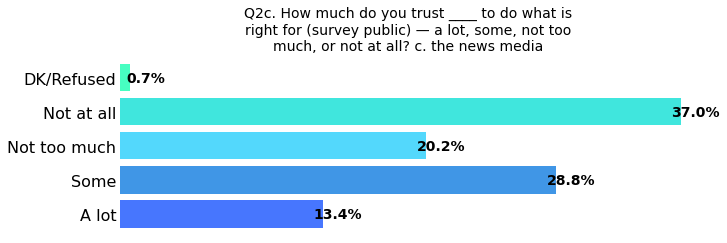

In [32]:
functions.univar_bar(data, 'weight', 'Q2c', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [33]:
#################
# Q2c transform #
#################

conditions = [data['Q2c'] == 1, 
              data['Q2c'] == 2,
              data['Q2c'] == 3,
              data['Q2c'] == 4,
              data['Q2c'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q2c_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q2c_rec'] = wording_dict['Q2c']

# update labels dict with categories and labels
response_dict['q2c_rec'] = {
    -1: "Not at all",
    -0.5: "Not too much",
    0: "DK/Ref",
    0.5: "Some",
    1: "A lot"
}

In [34]:
functions.univar_table(data, 'weight', 'q2c_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q2c_rec                                        
-1.0       Not at all   556  37.0   34.5   39.4
-0.5     Not too much   303  20.2   18.2   22.2
 0.0           DK/Ref    10   0.7    0.2    1.1
 0.5             Some   432  28.8   26.5   31.0
 1.0            A lot   201  13.4   11.7   15.1

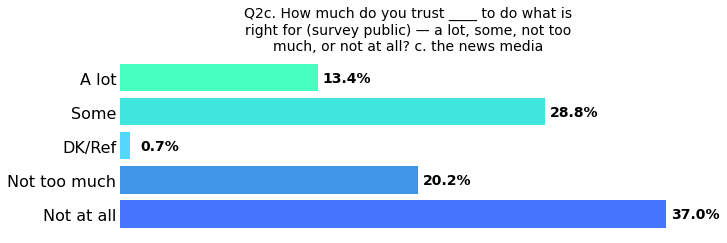

In [35]:
functions.univar_bar(data, 'weight', 'q2c_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=2, color = colors_5)

# Q2d

In [36]:
wording_dict['Q2d']

'Q2d. How much do you trust ____ to do what is right for (survey public) — a lot, some, not too much, or not at all? d. scientists'

In [37]:
response_dict['Q2d']

{1.0: 'A lot',
 2.0: 'Some',
 3.0: 'Not too much',
 4.0: 'Not at all',
 98.0: "Don't know (DO NOT READ}",
 99.0: 'DK/Refused'}

In [38]:
functions.univar_table(data, 'weight', 'Q2d', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q2d                                         
1.0          A lot   568  37.8   35.3   40.2
2.0           Some   584  38.9   36.4   41.3
3.0   Not too much   180  12.0   10.3   13.6
4.0     Not at all   142   9.4    8.0   10.9
99.0    DK/Refused    29   1.9    1.2    2.6

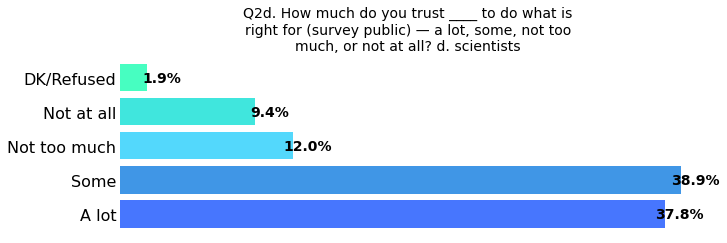

In [39]:
functions.univar_bar(data, 'weight', 'Q2d', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [40]:
#################
# Q2d transform #
#################

conditions = [data['Q2d'] == 1, 
              data['Q2d'] == 2,
              data['Q2d'] == 3,
              data['Q2d'] == 4,
              data['Q2d'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q2d_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q2d_rec'] = wording_dict['Q2d']

# update labels dict with categories and labels
response_dict['q2d_rec'] = {
    -1: "Not at all",
    -0.5: "Not too much",
    0: "DK/Ref",
    0.5: "Some",
    1: "A lot"
}

In [41]:
functions.univar_table(data, 'weight', 'q2d_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q2d_rec                                        
-1.0       Not at all   142   9.4    8.0   10.9
-0.5     Not too much   180  12.0   10.3   13.6
 0.0           DK/Ref    29   1.9    1.2    2.6
 0.5             Some   584  38.9   36.4   41.3
 1.0            A lot   568  37.8   35.3   40.2

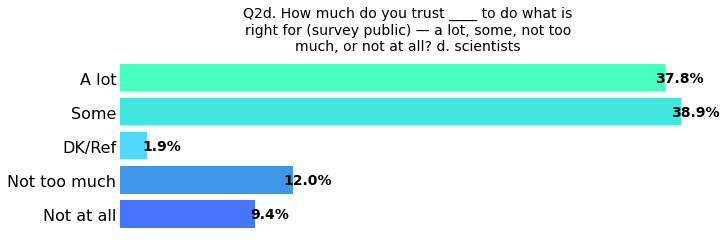

In [42]:
functions.univar_bar(data, 'weight', 'q2d_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q2e

In [43]:
wording_dict['Q2e']

'Q2e. How much do you trust ____ to do what is right for (survey public) — a lot, some, not too much, or not at all? e. business leaders'

In [44]:
response_dict['Q2e']

{1.0: 'A lot',
 2.0: 'Some',
 3.0: 'Not too much',
 4.0: 'Not at all',
 98.0: "Don't know (DO NOT READ}",
 99.0: 'DK/Refused'}

In [45]:
functions.univar_table(data, 'weight', 'Q2e', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q2e                                         
1.0          A lot   166  11.0    9.5   12.6
2.0           Some   554  36.9   34.4   39.3
3.0   Not too much   430  28.6   26.3   30.9
4.0     Not at all   320  21.3   19.2   23.4
99.0    DK/Refused    33   2.2    1.4    2.9

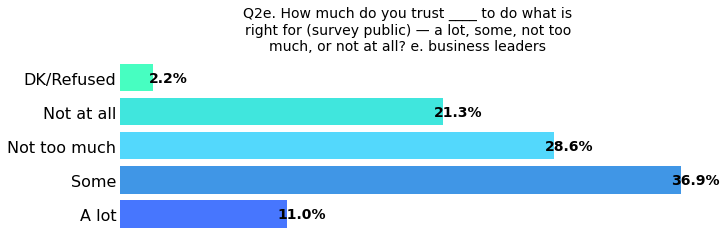

In [46]:
functions.univar_bar(data, 'weight', 'Q2e', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [47]:
#################
# Q2e transform #
#################

conditions = [data['Q2e'] == 1, 
              data['Q2e'] == 2,
              data['Q2e'] == 3,
              data['Q2e'] == 4,
              data['Q2e'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q2e_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q2e_rec'] = wording_dict['Q2e']

# update labels dict with categories and labels
response_dict['q2e_rec'] = {
    -1: "Not at all",
    -0.5: "Not too much",
    0: "DK/Ref",
    0.5: "Some",
    1: "A lot"
}

In [48]:
functions.univar_table(data, 'weight', 'q2e_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q2e_rec                                        
-1.0       Not at all   320  21.3   19.2   23.4
-0.5     Not too much   430  28.6   26.3   30.9
 0.0           DK/Ref    33   2.2    1.4    2.9
 0.5             Some   554  36.9   34.4   39.3
 1.0            A lot   166  11.0    9.5   12.6

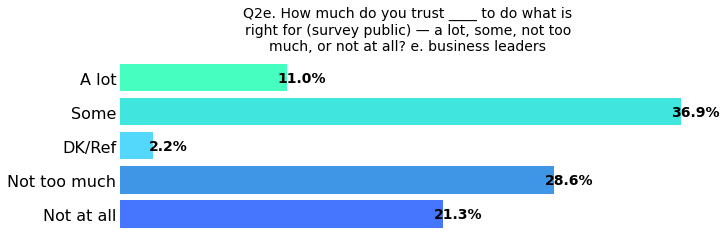

In [49]:
functions.univar_bar(data, 'weight', 'q2e_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q4a

In [50]:
wording_dict['Q4a']

"Q4a. I'd like you to compare (survey public) to other nations ... Do you think (survey public) is the best in the world, above average, average or below average? a. its scientific achievements [SHORTENED]"

In [51]:
response_dict['Q4a']

{1.0: '(survey public) is the best in the world',
 2.0: '(survey public) is above average',
 3.0: '(survey public) is average',
 4.0: '(survey public) is below average',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [52]:
functions.univar_table(data, 'weight', 'Q4a', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q4a                                                                     
1.0   (survey public) is the best in the world   263  17.5   15.6   19.5
2.0           (survey public) is above average   649  43.2   40.7   45.7
3.0                 (survey public) is average   442  29.4   27.1   31.7
4.0           (survey public) is below average   105   7.0    5.7    8.3
99.0                                DK/Refused    43   2.9    2.0    3.7

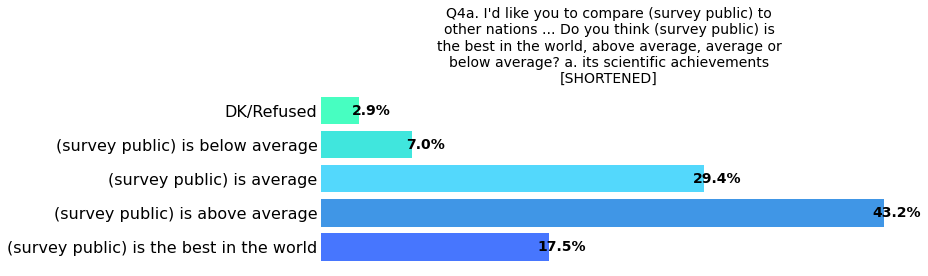

In [53]:
functions.univar_bar(data, 'weight', 'Q4a', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [54]:
#################
# Q4a transform #
#################

conditions = [data['Q4a'] == 1, 
              data['Q4a'] == 2,
              data['Q4a'] == 3,
              data['Q4a'] == 4,
              data['Q4a'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q4a_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q4a_rec'] = wording_dict['Q4a']

# update labels dict with categories and labels
response_dict['q4a_rec'] = {
    -1: "(survey public) is below average",
    -0.5: "(survey public) is average",
    0: "DK/Ref",
    0.5: "(survey public) is above average",
    1: "(survey public) is the best in the world"
}

In [55]:
functions.univar_table(data, 'weight', 'q4a_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q4a_rec                                                                    
-1.0             (survey public) is below average   105   7.0    5.7    8.3
-0.5                   (survey public) is average   442  29.4   27.1   31.7
 0.0                                       DK/Ref    43   2.9    2.0    3.7
 0.5             (survey public) is above average   649  43.2   40.7   45.7
 1.0     (survey public) is the best in the world   263  17.5   15.6   19.5

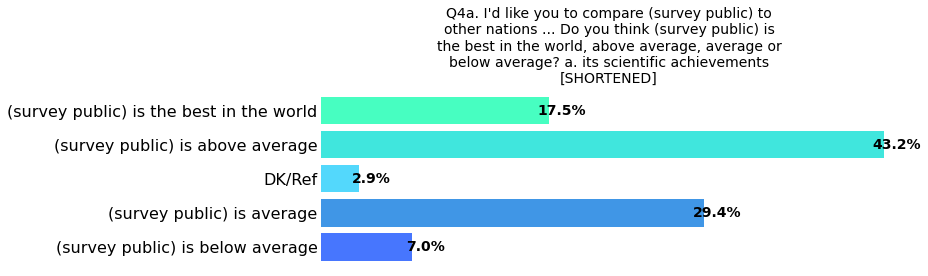

In [56]:
functions.univar_bar(data, 'weight', 'q4a_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q4b

In [57]:
wording_dict['Q4b']

"Q4b. I'd like you to compare (survey public) to other nations ... Do you think (survey public) is the best in the world, above average, average or below average? b. its political system [SHORTENED]"

In [58]:
response_dict['Q4b']

{1.0: '(survey public) is the best in the world',
 2.0: '(survey public) is above average',
 3.0: '(survey public) is average',
 4.0: '(survey public) is below average',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [59]:
functions.univar_table(data, 'weight', 'Q4b', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q4b                                                                     
1.0   (survey public) is the best in the world   259  17.2   15.3   19.1
2.0           (survey public) is above average   354  23.5   21.4   25.7
3.0                 (survey public) is average   403  26.8   24.6   29.0
4.0           (survey public) is below average   462  30.7   28.4   33.1
99.0                                DK/Refused    26   1.7    1.0    2.4

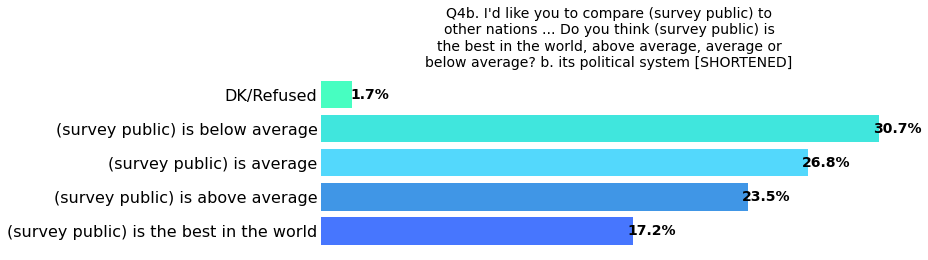

In [60]:
functions.univar_bar(data, 'weight', 'Q4b', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [61]:
#################
# Q4b transform #
#################

conditions = [data['Q4b'] == 1, 
              data['Q4b'] == 2,
              data['Q4b'] == 3,
              data['Q4b'] == 4,
              data['Q4b'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q4b_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q4b_rec'] = wording_dict['Q4b']

# update labels dict with categories and labels
response_dict['q4b_rec'] = {
    -1: "(survey public) is below average",
    -0.5: "(survey public) is average",
    0: "DK/Ref",
    0.5: "(survey public) is above average",
    1: "(survey public) is the best in the world"
}

In [62]:
functions.univar_table(data, 'weight', 'q4b_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q4b_rec                                                                    
-1.0             (survey public) is below average   462  30.7   28.4   33.1
-0.5                   (survey public) is average   403  26.8   24.6   29.0
 0.0                                       DK/Ref    26   1.7    1.0    2.4
 0.5             (survey public) is above average   354  23.5   21.4   25.7
 1.0     (survey public) is the best in the world   259  17.2   15.3   19.1

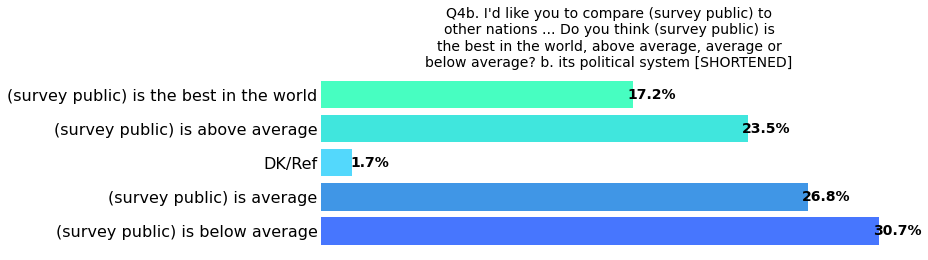

In [63]:
functions.univar_bar(data, 'weight', 'q4b_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q4c

In [64]:
wording_dict['Q4c']

"Q4c. I'd like you to compare (survey public) to other nations ... Do you think (survey public) is the best in the world, above average, average or below average? c. its economy [SHORTENED]"

In [65]:
response_dict['Q4c']

{1.0: '(survey public) is the best in the world',
 2.0: '(survey public) is above average',
 3.0: '(survey public) is average',
 4.0: '(survey public) is below average',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [66]:
functions.univar_table(data, 'weight', 'Q4c', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q4c                                                                     
1.0   (survey public) is the best in the world   325  21.6   19.5   23.7
2.0           (survey public) is above average   573  38.1   35.7   40.6
3.0                 (survey public) is average   386  25.7   23.5   27.9
4.0           (survey public) is below average   199  13.2   11.5   14.9
99.0                                DK/Refused    20   1.3    0.7    1.9

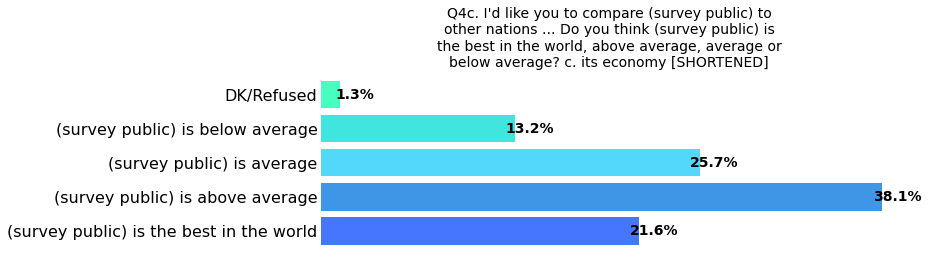

In [67]:
functions.univar_bar(data, 'weight', 'Q4c', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [68]:
#################
# Q4c transform #
#################

conditions = [data['Q4c'] == 1, 
              data['Q4c'] == 2,
              data['Q4c'] == 3,
              data['Q4c'] == 4,
              data['Q4c'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q4c_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q4c_rec'] = wording_dict['Q4c']

# update labels dict with categories and labels
response_dict['q4c_rec'] = {
    -1: "(survey public) is below average",
    -0.5: "(survey public) is average",
    0: "DK/Ref",
    0.5: "(survey public) is above average",
    1: "(survey public) is the best in the world"
}

In [69]:
functions.univar_table(data, 'weight', 'q4c_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q4c_rec                                                                    
-1.0             (survey public) is below average   199  13.2   11.5   14.9
-0.5                   (survey public) is average   386  25.7   23.5   27.9
 0.0                                       DK/Ref    20   1.3    0.7    1.9
 0.5             (survey public) is above average   573  38.1   35.7   40.6
 1.0     (survey public) is the best in the world   325  21.6   19.5   23.7

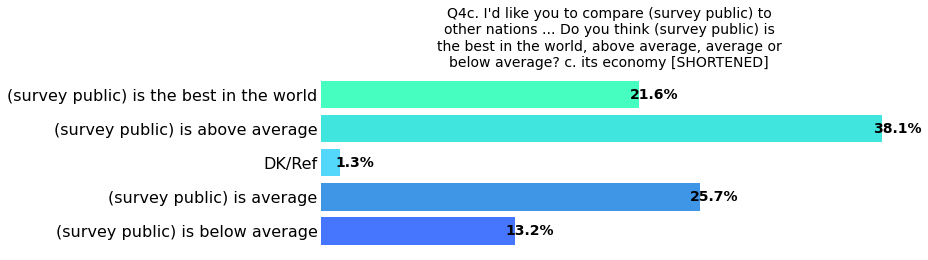

In [70]:
functions.univar_bar(data, 'weight', 'q4c_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q4d

In [71]:
wording_dict['Q4d']

"Q4d. I'd like you to compare (survey public) to other nations ... Do you think (survey public) is the best in the world, above average, average or below average? d. its military [SHORTENED]"

In [72]:
response_dict['Q4d']

{1.0: '(survey public) is the best in the world',
 2.0: '(survey public) is above average',
 3.0: '(survey public) is average',
 4.0: '(survey public) is below average',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [73]:
functions.univar_table(data, 'weight', 'Q4d', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q4d                                                                     
1.0   (survey public) is the best in the world   679  45.2   42.7   47.7
2.0           (survey public) is above average   526  35.0   32.6   37.4
3.0                 (survey public) is average   239  15.9   14.1   17.8
4.0           (survey public) is below average    28   1.9    1.2    2.5
99.0                                DK/Refused    30   2.0    1.3    2.7

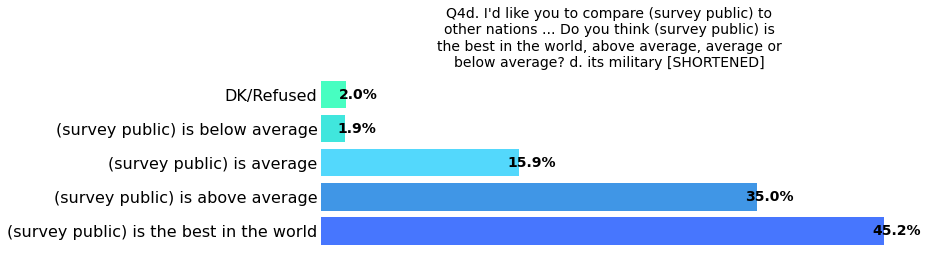

In [74]:
functions.univar_bar(data, 'weight', 'Q4d', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [75]:
#################
# Q4d transform #
#################

conditions = [data['Q4d'] == 1, 
              data['Q4d'] == 2,
              data['Q4d'] == 3,
              data['Q4d'] == 4,
              data['Q4d'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q4d_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q4d_rec'] = wording_dict['Q4d']

# update labels dict with categories and labels
response_dict['q4d_rec'] = {
    -1: "(survey public) is below average",
    -0.5: "(survey public) is average",
    0: "DK/Ref",
    0.5: "(survey public) is above average",
    1: "(survey public) is the best in the world"
}

In [76]:
functions.univar_table(data, 'weight', 'q4d_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q4d_rec                                                                    
-1.0             (survey public) is below average    28   1.9    1.2    2.5
-0.5                   (survey public) is average   239  15.9   14.1   17.8
 0.0                                       DK/Ref    30   2.0    1.3    2.7
 0.5             (survey public) is above average   526  35.0   32.6   37.4
 1.0     (survey public) is the best in the world   679  45.2   42.7   47.7

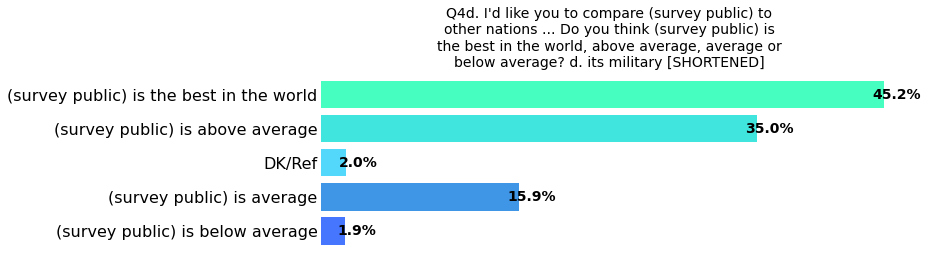

In [77]:
functions.univar_bar(data, 'weight', 'q4d_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q4e

In [78]:
wording_dict['Q4e']

"Q4e. I'd like you to compare (survey public) to other nations ... Do you think (survey public) is the best in the world, above average, average or below average? e. its STEM education in [grades K-12/primary and secondary schools] [SHORTENED]"

In [79]:
response_dict['Q4e']

{1.0: '(survey public) is the best in the world',
 2.0: '(survey public) is above average',
 3.0: '(survey public) is average',
 4.0: '(survey public) is below average',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [80]:
functions.univar_table(data, 'weight', 'Q4e', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q4e                                                                     
1.0   (survey public) is the best in the world    96   6.4    5.1    7.6
2.0           (survey public) is above average   368  24.5   22.3   26.7
3.0                 (survey public) is average   588  39.1   36.7   41.6
4.0           (survey public) is below average   412  27.5   25.2   29.7
99.0                                DK/Refused    38   2.5    1.7    3.3

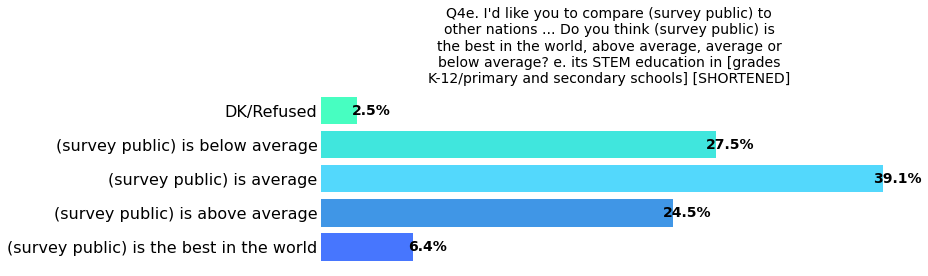

In [81]:
functions.univar_bar(data, 'weight', 'Q4e', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [82]:
#################
# Q4e transform #
#################

conditions = [data['Q4e'] == 1, 
              data['Q4e'] == 2,
              data['Q4e'] == 3,
              data['Q4e'] == 4,
              data['Q4e'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q4e_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q4e_rec'] = wording_dict['Q4e']

# update labels dict with categories and labels
response_dict['q4e_rec'] = {
    -1: "(survey public) is below average",
    -0.5: "(survey public) is average",
    0: "DK/Ref",
    0.5: "(survey public) is above average",
    1: "(survey public) is the best in the world"
}

In [83]:
functions.univar_table(data, 'weight', 'q4e_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q4e_rec                                                                    
-1.0             (survey public) is below average   412  27.5   25.2   29.7
-0.5                   (survey public) is average   588  39.1   36.7   41.6
 0.0                                       DK/Ref    38   2.5    1.7    3.3
 0.5             (survey public) is above average   368  24.5   22.3   26.7
 1.0     (survey public) is the best in the world    96   6.4    5.1    7.6

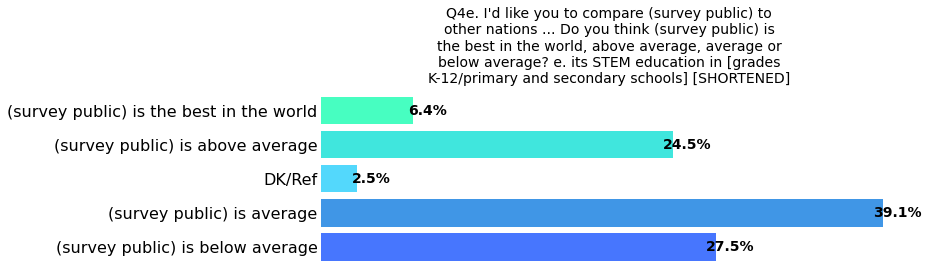

In [84]:
functions.univar_bar(data, 'weight', 'q4e_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q4f

In [85]:
wording_dict['Q4f']

"Q4f. I'd like you to compare (survey public) to other nations ... Do you think (survey public) is the best in the world, above average, average or below average? f. its medical treatments [SHORTENED]"

In [86]:
response_dict['Q4f']

{1.0: '(survey public) is the best in the world',
 2.0: '(survey public) is above average',
 3.0: '(survey public) is average',
 4.0: '(survey public) is below average',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [87]:
functions.univar_table(data, 'weight', 'Q4f', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q4f                                                                     
1.0   (survey public) is the best in the world   333  22.2   20.1   24.3
2.0           (survey public) is above average   493  32.8   30.4   35.2
3.0                 (survey public) is average   371  24.7   22.5   26.9
4.0           (survey public) is below average   294  19.6   17.6   21.6
99.0                                DK/Refused    12   0.8    0.3    1.2

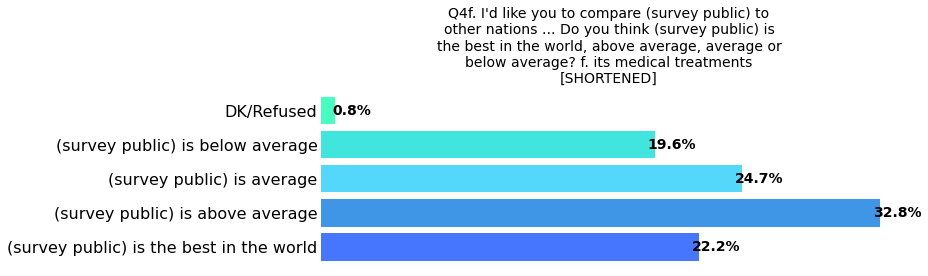

In [88]:
functions.univar_bar(data, 'weight', 'Q4f', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [89]:
#################
# Q4f transform #
#################

conditions = [data['Q4f'] == 1, 
              data['Q4f'] == 2,
              data['Q4f'] == 3,
              data['Q4f'] == 4,
              data['Q4f'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q4f_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q4f_rec'] = wording_dict['Q4f']

# update labels dict with categories and labels
response_dict['q4f_rec'] = {
    -1: "(survey public) is below average",
    -0.5: "(survey public) is average",
    0: "DK/Ref",
    0.5: "(survey public) is above average",
    1: "(survey public) is the best in the world"
}

In [90]:
functions.univar_table(data, 'weight', 'q4f_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q4f_rec                                                                    
-1.0             (survey public) is below average   294  19.6   17.6   21.6
-0.5                   (survey public) is average   371  24.7   22.5   26.9
 0.0                                       DK/Ref    12   0.8    0.3    1.2
 0.5             (survey public) is above average   493  32.8   30.4   35.2
 1.0     (survey public) is the best in the world   333  22.2   20.1   24.3

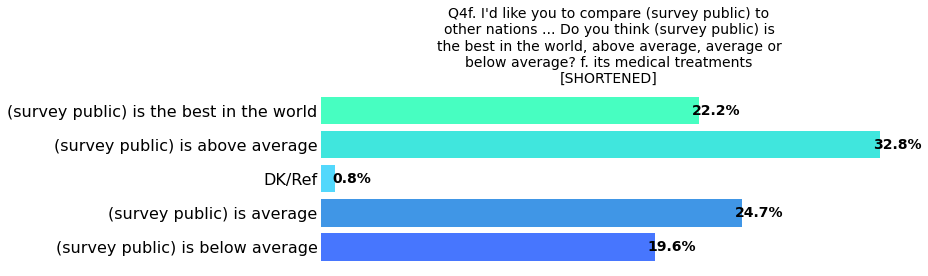

In [91]:
functions.univar_bar(data, 'weight', 'q4f_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q4g

In [92]:
wording_dict['Q4g']

"Q4g. I'd like you to compare (survey public) to other nations ... Do you think (survey public) is the best in the world, above average, average or below average? g. its technological achievements [SHORTENED]"

In [93]:
response_dict['Q4g']

{1.0: '(survey public) is the best in the world',
 2.0: '(survey public) is above average',
 3.0: '(survey public) is average',
 4.0: '(survey public) is below average',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [94]:
functions.univar_table(data, 'weight', 'Q4g', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q4g                                                                     
1.0   (survey public) is the best in the world   292  19.4   17.4   21.4
2.0           (survey public) is above average   661  44.0   41.5   46.5
3.0                 (survey public) is average   427  28.5   26.2   30.7
4.0           (survey public) is below average    94   6.3    5.0    7.5
99.0                                DK/Refused    28   1.8    1.2    2.5

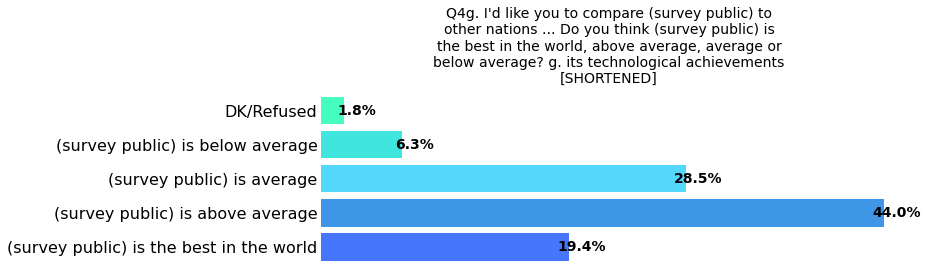

In [95]:
functions.univar_bar(data, 'weight', 'Q4g', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [96]:
#################
# Q4g transform #
#################

conditions = [data['Q4g'] == 1, 
              data['Q4g'] == 2,
              data['Q4g'] == 3,
              data['Q4g'] == 4,
              data['Q4g'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q4g_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q4g_rec'] = wording_dict['Q4g']

# update labels dict with categories and labels
response_dict['q4g_rec'] = {
    -1: "(survey public) is below average",
    -0.5: "(survey public) is average",
    0: "DK/Ref",
    0.5: "(survey public) is above average",
    1: "(survey public) is the best in the world"
}

In [97]:
functions.univar_table(data, 'weight', 'q4g_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q4g_rec                                                                    
-1.0             (survey public) is below average    94   6.3    5.0    7.5
-0.5                   (survey public) is average   427  28.5   26.2   30.7
 0.0                                       DK/Ref    28   1.8    1.2    2.5
 0.5             (survey public) is above average   661  44.0   41.5   46.5
 1.0     (survey public) is the best in the world   292  19.4   17.4   21.4

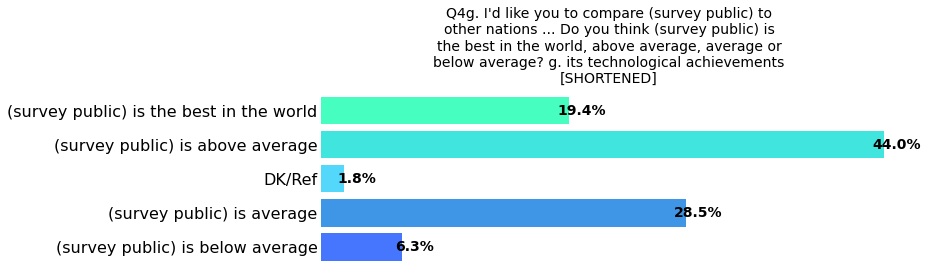

In [98]:
functions.univar_bar(data, 'weight', 'q4g_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q4h

In [99]:
wording_dict['Q4h']

"Q4h. I'd like you to compare (survey public) to other nations ... Do you think (survey public) is the best in the world, above average, average or below average? h. its STEM education in colleges and universities/universities [SHORTENED]"

In [100]:
response_dict['Q4h']

{1.0: '(survey public) is the best in the world',
 2.0: '(survey public) is above average',
 3.0: '(survey public) is average',
 4.0: '(survey public) is below average',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [101]:
functions.univar_table(data, 'weight', 'Q4h', response_dict) 

Labels  Freq  Prop  CI_lo  CI_up
Q4h                                                                     
1.0   (survey public) is the best in the world   206  13.7   12.0   15.4
2.0           (survey public) is above average   569  37.9   35.4   40.3
3.0                 (survey public) is average   513  34.1   31.7   36.5
4.0           (survey public) is below average   175  11.6   10.0   13.2
99.0                                DK/Refused    40   2.7    1.8    3.5

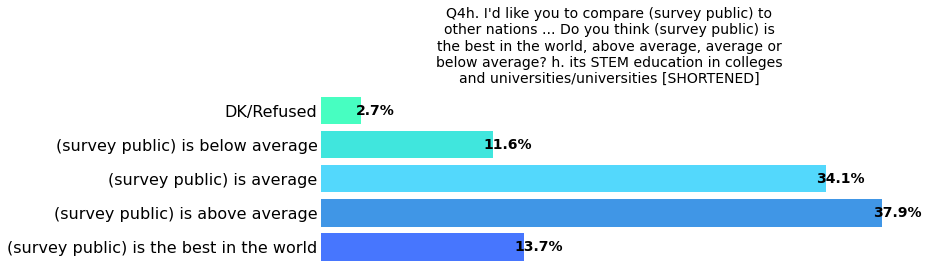

In [102]:
functions.univar_bar(data, 'weight', 'Q4h', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [103]:
#################
# Q4h transform #
#################

conditions = [data['Q4h'] == 1, 
              data['Q4h'] == 2,
              data['Q4h'] == 3,
              data['Q4h'] == 4,
              data['Q4h'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q4h_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q4h_rec'] = wording_dict['Q4h']

# update labels dict with categories and labels
response_dict['q4h_rec'] = {
    -1: "(survey public) is below average",
    -0.5: "(survey public) is average",
    0: "DK/Ref",
    0.5: "(survey public) is above average",
    1: "(survey public) is the best in the world"
}

In [104]:
functions.univar_table(data, 'weight', 'q4h_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q4h_rec                                                                    
-1.0             (survey public) is below average   175  11.6   10.0   13.2
-0.5                   (survey public) is average   513  34.1   31.7   36.5
 0.0                                       DK/Ref    40   2.7    1.8    3.5
 0.5             (survey public) is above average   569  37.9   35.4   40.3
 1.0     (survey public) is the best in the world   206  13.7   12.0   15.4

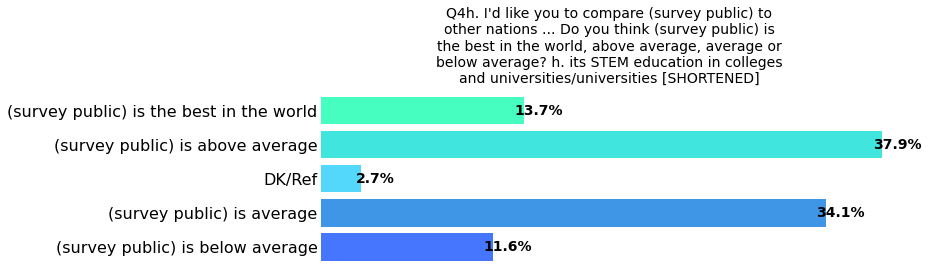

In [105]:
functions.univar_bar(data, 'weight', 'q4h_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q5

In [106]:
wording_dict['Q5']

'Q5. Overall, would you say developments in science have had a mostly positive effect on society, a mostly negative effect on society or would you say there have been equal positive and negative effects on society?'

In [107]:
response_dict['Q5']

{1.0: 'Mostly positive effect',
 2.0: 'Mostly negative effect',
 3.0: 'Equal positive and negative effects',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [108]:
functions.univar_table(data, 'weight', 'Q5', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q5                                                                 
1.0                Mostly positive effect   610  40.6   38.2   43.1
2.0                Mostly negative effect    77   5.1    4.0    6.2
3.0   Equal positive and negative effects   795  53.0   50.4   55.5
99.0                           DK/Refused    19   1.3    0.7    1.9

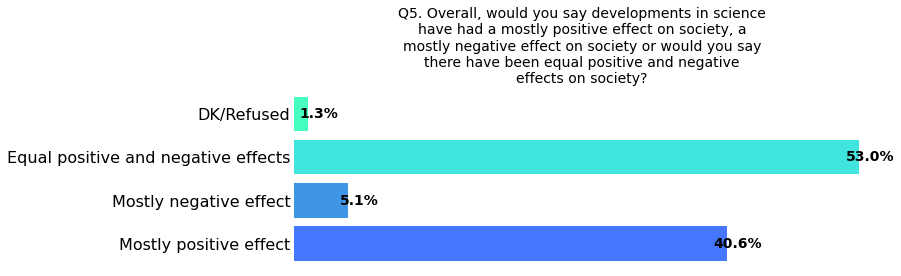

In [109]:
functions.univar_bar(data, 'weight', 'Q5', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_4)

In [110]:
################
# Q5 transform #
################

conditions = [data['Q5'] == 1, 
              (data['Q5'] == 2) | (data['Q5'] == 3),
              data['Q5'] == 99]
outputs = [1, -1, 0]
data['q5_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q5_rec'] = wording_dict['Q5']

# update labels dict with categories and labels
response_dict['q5_rec'] = {
    -1: "Mostly negative effect/equal positive & negative effects",
    0: "DK/Ref",
    1: "Mostly positive effect"
}

In [111]:
functions.univar_table(data, 'weight', 'q5_rec', response_dict)

Labels  Freq  Prop  \
q5_rec                                                                         
-1      Mostly negative effect/equal positive & negative effects   872  58.1   
 0                                                        DK/Ref    19   1.3   
 1                                        Mostly positive effect   610  40.6   

        CI_lo  CI_up  
q5_rec                
-1       55.6   60.6  
 0        0.7    1.9  
 1       38.2   43.1

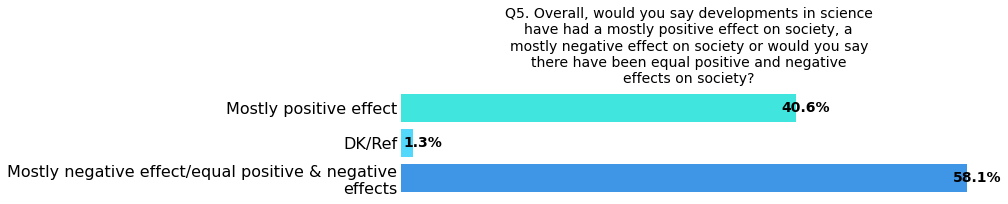

In [112]:
functions.univar_bar(data, 'weight', 'q5_rec', response_dict, 
                              wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

# Q7

In [113]:
wording_dict['Q7']

'Q7. Thinking about all the important goals for (survey public), how important do you think it is for (survey public) to be a world leader in scientific achievements? [SHORTENED]'

In [114]:
response_dict['Q7']

{1.0: 'Very important',
 2.0: 'Somewhat important',
 3.0: 'Not too important',
 4.0: 'Not at all important',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [115]:
functions.univar_table(data, 'weight', 'Q7', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q7                                                  
1.0         Very important  1039  69.2   66.8   71.5
2.0     Somewhat important   360  24.0   21.8   26.1
3.0      Not too important    48   3.2    2.3    4.1
4.0   Not at all important    40   2.7    1.8    3.5
99.0            DK/Refused    15   1.0    0.5    1.5

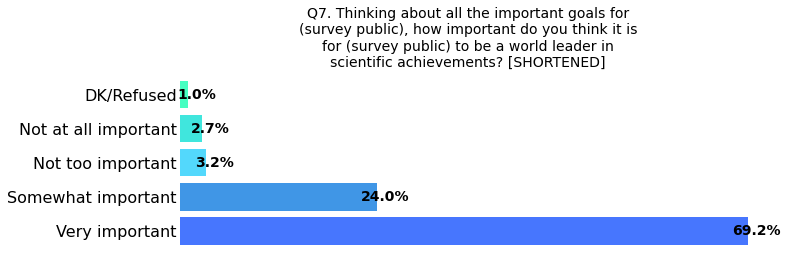

In [116]:
functions.univar_bar(data, 'weight', 'Q7', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [117]:
################
# Q7 transform #
################

conditions = [data['Q7'] == 1, 
              data['Q7'] == 2,
              data['Q7'] == 3,
              data['Q7'] == 4,
              data['Q7'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q7_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q7_rec'] = wording_dict['Q7']

# update labels dict with categories and labels
response_dict['q7_rec'] = {
    -1: "Not at all important",
    -0.5: "Not too important",
    0: "DK/Ref",
    0.5: "Somewhat important",
    1: "Very important"
}

In [118]:
functions.univar_table(data, 'weight', 'q7_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q7_rec                                                
-1.0    Not at all important    40   2.7    1.8    3.5
-0.5       Not too important    48   3.2    2.3    4.1
 0.0                  DK/Ref    15   1.0    0.5    1.5
 0.5      Somewhat important   360  24.0   21.8   26.1
 1.0          Very important  1039  69.2   66.8   71.5

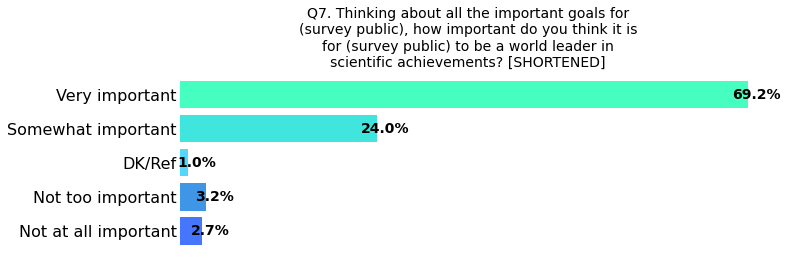

In [119]:
functions.univar_bar(data, 'weight', 'q7_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q9a

In [120]:
wording_dict['Q9a']

'Q9a. In your opinion, are government investments in scientific research aimed at advancing knowledge usually worthwhile for society over time, or are they not worth the investment?'

In [121]:
response_dict['Q9a']

{1.0: 'Yes, they are worthwhile for society over time',
 2.0: 'No, they are not worth the investment',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [122]:
functions.univar_table(data, 'weight', 'Q9a', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q9a                                                                           
1.0   Yes, they are worthwhile for society over time  1229  81.8   79.9   83.8
2.0            No, they are not worth the investment   222  14.8   13.0   16.6
99.0                                      DK/Refused    51   3.4    2.5    4.3

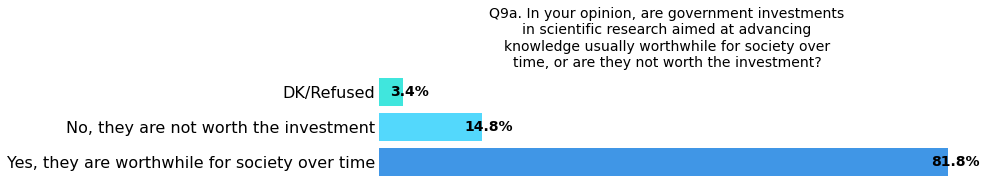

In [123]:
functions.univar_bar(data, 'weight', 'Q9a', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

In [124]:
#################
# Q9a transform #
#################

conditions = [data['Q9a'] == 1, 
              data['Q9a'] == 2,
              data['Q9a'] == 99]
outputs = [1, -1, 0]
data['q9a_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q9a_rec'] = wording_dict['Q9a']

# update labels dict with categories and labels
response_dict['q9a_rec'] = {
    -1: "No, they are not worth the investment",
    0: "DK/Ref",
    1: "Yes, they are worthwhile for society over time"
}

In [125]:
functions.univar_table(data, 'weight', 'q9a_rec', response_dict)

Labels  Freq  Prop  CI_lo  \
q9a_rec                                                                      
-1                No, they are not worth the investment   222  14.8   13.0   
 0                                               DK/Ref    51   3.4    2.5   
 1       Yes, they are worthwhile for society over time  1229  81.8   79.9   

         CI_up  
q9a_rec         
-1        16.6  
 0         4.3  
 1        83.8

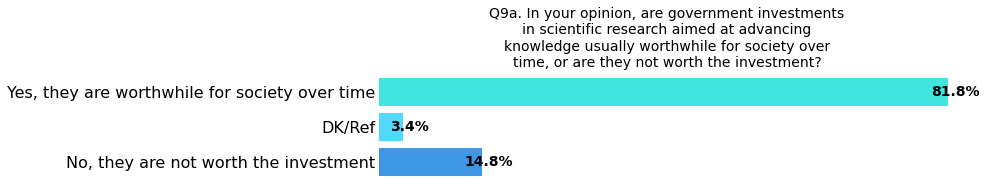

In [126]:
functions.univar_bar(data, 'weight', 'q9a_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

# Q11a

In [127]:
wording_dict['Q11a']

'Q11a. Consider all the advantages and disadvantages of ____. Overall would you say this has mostly been a good thing or a bad thing for society? a. using robots to automate many jobs humans have done in the past'

In [128]:
response_dict['Q11a']

{1.0: 'Good thing for society',
 2.0: 'Bad thing for society',
 96.0: 'Both (DO NOT READ)',
 97.0: 'Neither (DO NOT READ)',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [129]:
functions.univar_table(data, 'weight', 'Q11a', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q11a                                                  
1.0   Good thing for society   619  41.2   38.7   43.7
2.0    Bad thing for society   757  50.4   47.9   53.0
96.0      Both (DO NOT READ)    88   5.9    4.7    7.1
97.0   Neither (DO NOT READ)    14   0.9    0.5    1.4
99.0              DK/Refused    24   1.6    0.9    2.2

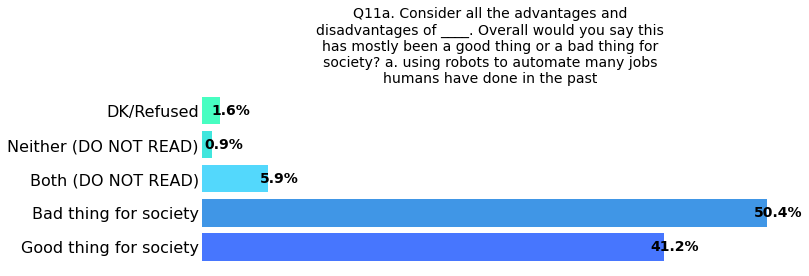

In [130]:
functions.univar_bar(data, 'weight', 'Q11a', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [131]:
##################
# Q11a transform #
##################

conditions = [data['Q11a'] == 1, 
              data['Q11a'] == 2,
              (data['Q11a'] == 96) | (data['Q11a'] == 97) | (data['Q11a'] == 99)]
outputs = [1, -1, 0]
data['q11a_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q11a_rec'] = wording_dict['Q11a']

# update labels dict with categories and labels
response_dict['q11a_rec'] = {
    -1: "Bad thing for society",
    0: "DK/Ref/Both/Neither",
    1: "Good thing for society"
}

In [132]:
functions.univar_table(data, 'weight', 'q11a_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q11a_rec                                                  
-1         Bad thing for society   757  50.4   47.9   53.0
 0           DK/Ref/Both/Neither   126   8.4    7.0    9.8
 1        Good thing for society   619  41.2   38.7   43.7

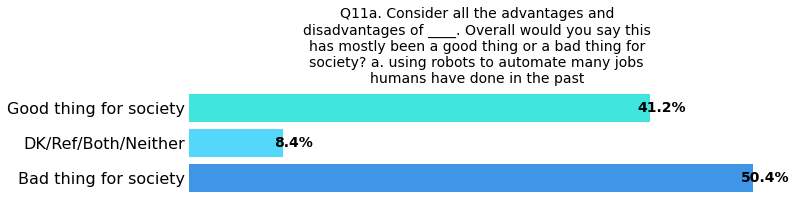

In [133]:
functions.univar_bar(data, 'weight', 'q11a_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

# Q11b

In [134]:
wording_dict['Q11b']

'Q11b. Consider all the advantages and disadvantages of ____. Overall would you say this has mostly been a good thing or a bad thing for society? b. the development of artificial intelligence ... [SHORTENED]'

In [135]:
response_dict['Q11b']

{1.0: 'Good thing for society',
 2.0: 'Bad thing for society',
 96.0: 'Both (DO NOT READ)',
 97.0: 'Neither (DO NOT READ)',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [136]:
functions.univar_table(data, 'weight', 'Q11b', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q11b                                                  
1.0   Good thing for society   699  46.5   44.0   49.0
2.0    Bad thing for society   668  44.5   41.9   47.0
96.0      Both (DO NOT READ)    63   4.2    3.2    5.2
97.0   Neither (DO NOT READ)     8   0.6    0.2    0.9
99.0              DK/Refused    64   4.3    3.2    5.3

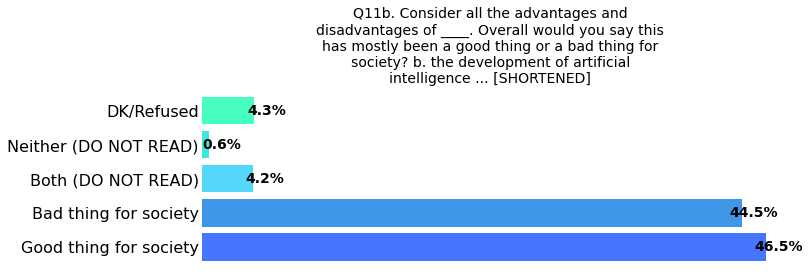

In [137]:
functions.univar_bar(data, 'weight', 'Q11b', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [138]:
##################
# Q11b transform #
##################

conditions = [data['Q11b'] == 1, 
              data['Q11b'] == 2,
              (data['Q11b'] == 96) | (data['Q11b'] == 97) | (data['Q11b'] == 99)]
outputs = [1, -1, 0]
data['q11b_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q11b_rec'] = wording_dict['Q11b']

# update labels dict with categories and labels
response_dict['q11b_rec'] = {
    -1: "Bad thing for society",
    0: "DK/Ref/Both/Neither",
    1: "Good thing for society"
}

In [139]:
functions.univar_table(data, 'weight', 'q11b_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q11b_rec                                                  
-1         Bad thing for society   668  44.5   41.9   47.0
 0           DK/Ref/Both/Neither   136   9.0    7.6   10.5
 1        Good thing for society   699  46.5   44.0   49.0

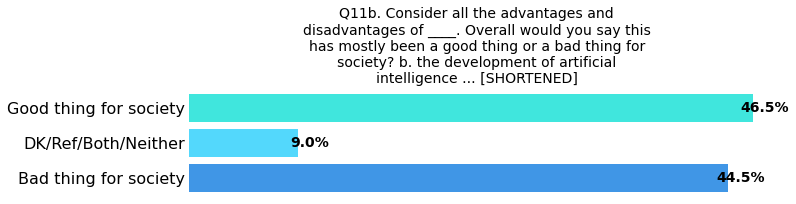

In [140]:
functions.univar_bar(data, 'weight', 'q11b_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

# Q11c

In [141]:
wording_dict['Q11c']

'Q11c. Consider all the advantages and disadvantages of ____. Overall would you say this has mostly been a good thing or a bad thing for society? c. the government’s space exploration program [SHORTENED]'

In [142]:
response_dict['Q11c']

{1.0: 'Good thing for society',
 2.0: 'Bad thing for society',
 96.0: 'Both (DO NOT READ)',
 97.0: 'Neither (DO NOT READ)',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [143]:
functions.univar_table(data, 'weight', 'Q11c', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q11c                                                  
1.0   Good thing for society  1254  83.5   81.6   85.4
2.0    Bad thing for society   154  10.2    8.7   11.8
96.0      Both (DO NOT READ)    25   1.6    1.0    2.3
97.0   Neither (DO NOT READ)    29   1.9    1.2    2.6
99.0              DK/Refused    41   2.7    1.9    3.6

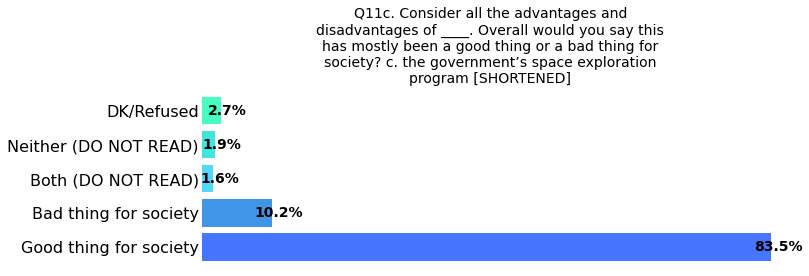

In [144]:
functions.univar_bar(data, 'weight', 'Q11c', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [145]:
##################
# Q11c transform #
##################

conditions = [data['Q11c'] == 1, 
              data['Q11c'] == 2,
              (data['Q11c'] == 96) | (data['Q11c'] == 97) | (data['Q11c'] == 99)]
outputs = [1, -1, 0]
data['q11c_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q11c_rec'] = wording_dict['Q11c']

# update labels dict with categories and labels
response_dict['q11c_rec'] = {
    -1: "Bad thing for society",
    0: "DK/Ref/Both/Neither",
    1: "Good thing for society"
}

In [146]:
functions.univar_table(data, 'weight', 'q11c_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q11c_rec                                                  
-1         Bad thing for society   154  10.2    8.7   11.8
 0           DK/Ref/Both/Neither    94   6.3    5.1    7.5
 1        Good thing for society  1254  83.5   81.6   85.4

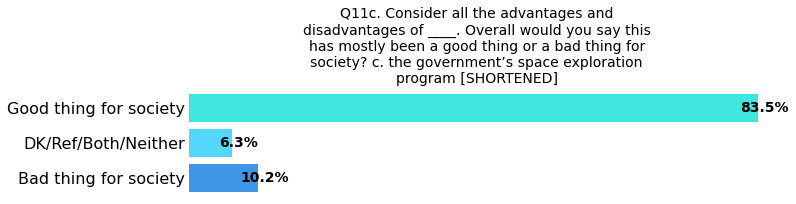

In [147]:
functions.univar_bar(data, 'weight', 'q11c_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

# Q12a

In [148]:
wording_dict['Q12a']

"Q12a. Do you think scientific research on _____ is appropriate or misusing technology? a. gene editing to change people's genetic characteristics"

In [149]:
response_dict['Q12a']

{1.0: 'Appropriate',
 2.0: 'Misusing technology',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [150]:
functions.univar_table(data, 'weight', 'Q12a', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q12a                                               
1.0           Appropriate   432  28.8   26.5   31.0
2.0   Misusing technology   998  66.4   64.0   68.8
99.0           DK/Refused    72   4.8    3.7    5.9

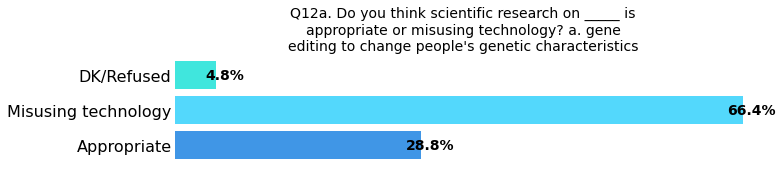

In [151]:
functions.univar_bar(data, 'weight', 'Q12a', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

In [152]:
##################
# Q12a transform #
##################

conditions = [data['Q12a'] == 1, 
              data['Q12a'] == 2,
              data['Q12a'] == 99]
outputs = [1, -1, 0]
data['q12a_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q12a_rec'] = wording_dict['Q12a']

# update labels dict with categories and labels
response_dict['q12a_rec'] = {
    -1: "Misusing technology",
    0: "DK/Ref",
    1: "Appropriate"
}

In [153]:
functions.univar_table(data, 'weight', 'q12a_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q12a_rec                                               
-1        Misusing technology   998  66.4   64.0   68.8
 0                     DK/Ref    72   4.8    3.7    5.9
 1                Appropriate   432  28.8   26.5   31.0

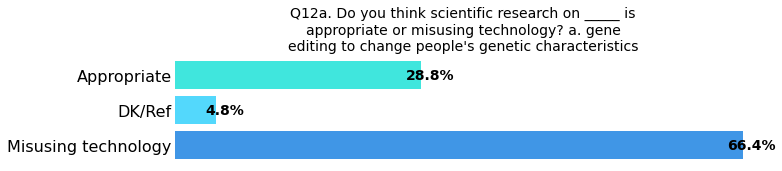

In [154]:
functions.univar_bar(data, 'weight', 'q12a_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

# Q12b

In [155]:
wording_dict['Q12b']

'Q12b. Do you think scientific research on _____ is appropriate or misusing technology? b. cloning of animals'

In [156]:
response_dict['Q12b']

{1.0: 'Appropriate',
 2.0: 'Misusing technology',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [157]:
functions.univar_table(data, 'weight', 'Q12b', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q12b                                               
1.0           Appropriate   502  33.4   31.0   35.8
2.0   Misusing technology   926  61.6   59.2   64.1
99.0           DK/Refused    74   4.9    3.8    6.0

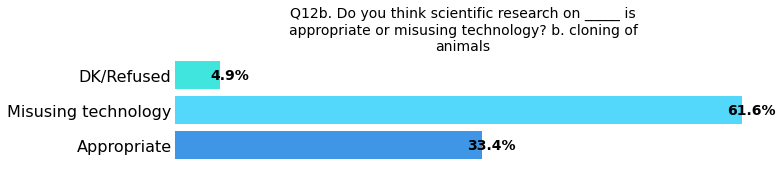

In [158]:
functions.univar_bar(data, 'weight', 'Q12b', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

In [159]:
##################
# Q12b transform #
##################

conditions = [data['Q12b'] == 1, 
              data['Q12b'] == 2,
              data['Q12b'] == 99]
outputs = [1, -1, 0]
data['q12b_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q12b_rec'] = wording_dict['Q12b']

# update labels dict with categories and labels
response_dict['q12b_rec'] = {
    -1: "Misusing technology",
    0: "DK/Ref",
    1: "Appropriate"
}

In [160]:
functions.univar_table(data, 'weight', 'q12b_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q12b_rec                                               
-1        Misusing technology   926  61.6   59.2   64.1
 0                     DK/Ref    74   4.9    3.8    6.0
 1                Appropriate   502  33.4   31.0   35.8

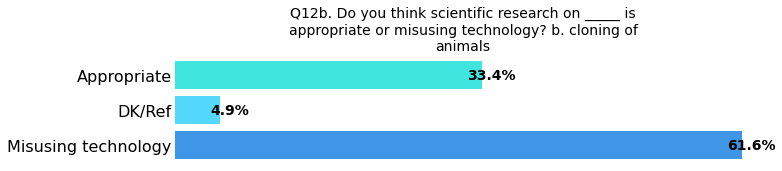

In [161]:
functions.univar_bar(data, 'weight', 'q12b_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

# Q12c

In [162]:
wording_dict['Q12c']

'Q12c. Do you think scientific research on _____ is appropriate or misusing technology? c. new technologies to help women get pregnant'

In [163]:
response_dict['Q12c']

{1.0: 'Appropriate',
 2.0: 'Misusing technology',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [164]:
functions.univar_table(data, 'weight', 'Q12c', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q12c                                               
1.0           Appropriate  1034  68.9   66.5   71.2
2.0   Misusing technology   395  26.3   24.1   28.5
99.0           DK/Refused    73   4.9    3.8    5.9

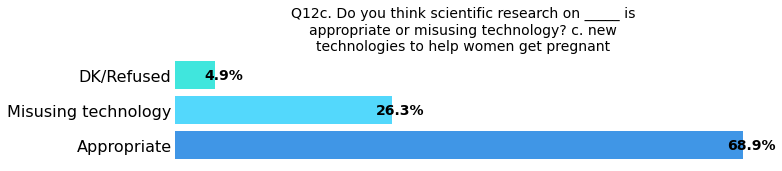

In [165]:
functions.univar_bar(data, 'weight', 'Q12c', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

In [166]:
##################
# Q12c transform #
##################

conditions = [data['Q12c'] == 1, 
              data['Q12c'] == 2,
              data['Q12c'] == 99]
outputs = [1, -1, 0]
data['q12c_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q12c_rec'] = wording_dict['Q12c']

# update labels dict with categories and labels
response_dict['q12c_rec'] = {
    -1: "Misusing technology",
    0: "DK/Ref",
    1: "Appropriate"
}

In [167]:
functions.univar_table(data, 'weight', 'q12c_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q12c_rec                                               
-1        Misusing technology   395  26.3   24.1   28.5
 0                     DK/Ref    73   4.9    3.8    5.9
 1                Appropriate  1034  68.9   66.5   71.2

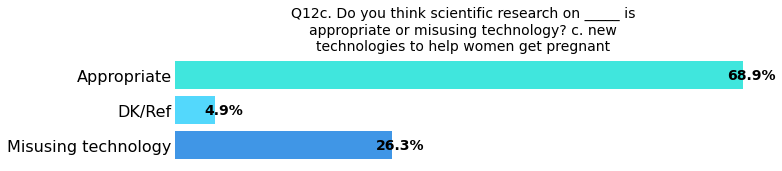

In [168]:
functions.univar_bar(data, 'weight', 'q12c_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

# Q15

In [169]:
wording_dict['Q15']

'Q15. Thinking about scientists, which of these statements comes closer to your own view, even if neither is exactly right?'

In [170]:
response_dict['Q15']

{1.0: 'Scientists make judgments based solely on the facts',
 2.0: "Scientists' judgments are just as likely to be biased as other people's",
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [171]:
functions.univar_table(data, 'weight', 'Q15', response_dict)

Labels  \
Q15                                                                             
1.0                       Scientists make judgments based solely on the facts   
2.0   Scientists' judgments are just as likely to be biased as other people's   
99.0                                                               DK/Refused   

      Freq  Prop  CI_lo  CI_up  
Q15                             
1.0    688  45.8   43.3   48.3  
2.0    768  51.1   48.6   53.7  
99.0    46   3.1    2.2    4.0

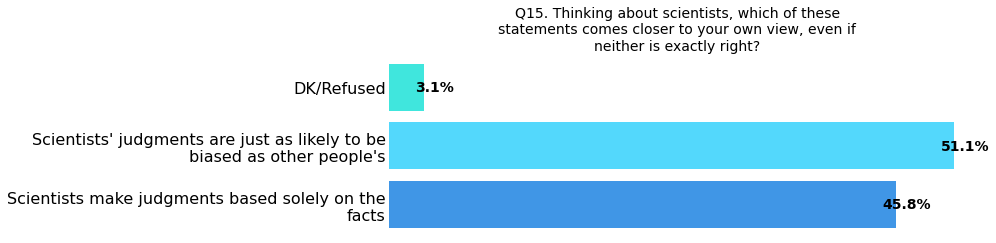

In [172]:
functions.univar_bar(data, 'weight', 'Q15', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

In [173]:
#################
# Q15 transform #
#################

conditions = [data['Q15'] == 1, 
              data['Q15'] == 2,
              data['Q15'] == 99]
outputs = [1, -1, 0]
data['q15_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q15_rec'] = wording_dict['Q15']

# update labels dict with categories and labels
response_dict['q15_rec'] = {
    -1: "Scientists' judgments are just as likely to be biased as other people's",
    0: "DK/Ref",
    1: "Scientists make judgments based solely on the facts"
}

In [174]:
functions.univar_table(data, 'weight', 'q15_rec', response_dict)

Labels  \
q15_rec                                                                            
-1       Scientists' judgments are just as likely to be biased as other people's   
 0                                                                        DK/Ref   
 1                           Scientists make judgments based solely on the facts   

         Freq  Prop  CI_lo  CI_up  
q15_rec                            
-1        768  51.1   48.6   53.7  
 0         46   3.1    2.2    4.0  
 1        688  45.8   43.3   48.3

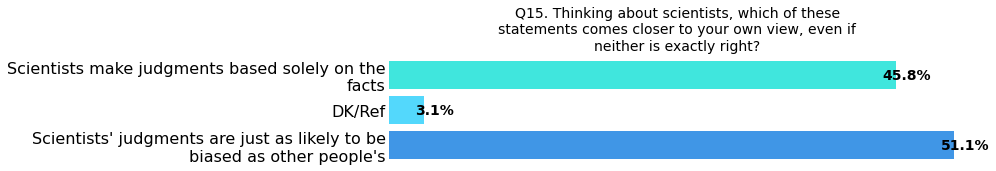

In [175]:
functions.univar_bar(data, 'weight', 'q15_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

# Q16a

In [176]:
wording_dict['Q16a']

'Q16a. Thinking about childhood vaccines for diseases such as measles, mumps and rubella, would you rate ____ as high, medium, low, or none at all? a. the risk of side effects'

In [177]:
response_dict['Q16a']

{1.0: 'High',
 2.0: 'Medium',
 3.0: 'Low',
 4.0: 'None at all',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [178]:
functions.univar_table(data, 'weight', 'Q16a', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q16a                                       
1.0          High   197  13.1   11.4   14.9
2.0        Medium   364  24.2   22.0   26.4
3.0           Low   669  44.5   42.0   47.0
4.0   None at all   230  15.3   13.5   17.2
99.0   DK/Refused    42   2.8    2.0    3.6

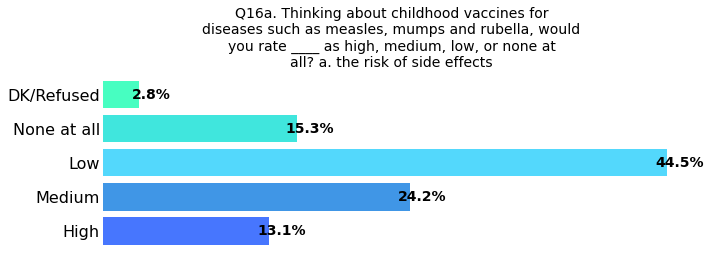

In [179]:
functions.univar_bar(data, 'weight', 'Q16a', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [180]:
##################
# Q16a transform #
##################

conditions = [data['Q16a'] == 1, 
              data['Q16a'] == 2,
              data['Q16a'] == 3,
              data['Q16a'] == 4,
              data['Q16a'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q16a_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q16a_rec'] = wording_dict['Q16a']

# update labels dict with categories and labels
response_dict['q16a_rec'] = {
    -1: "None at all",
    -0.5: "Low",
    0: "DK/Ref",
    0.5: "Medium",
    1: "High"
}

In [181]:
functions.univar_table(data, 'weight', 'q16a_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q16a_rec                                       
-1.0      None at all   230  15.3   13.5   17.2
-0.5              Low   669  44.5   42.0   47.0
 0.0           DK/Ref    42   2.8    2.0    3.6
 0.5           Medium   364  24.2   22.0   26.4
 1.0             High   197  13.1   11.4   14.9

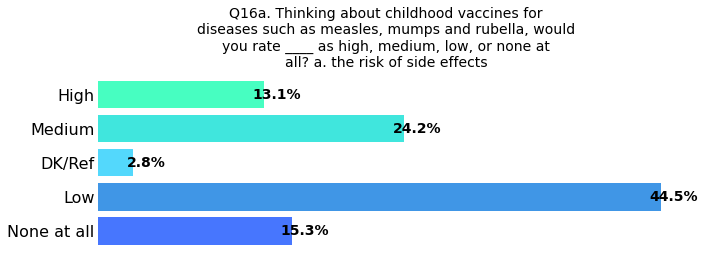

In [182]:
functions.univar_bar(data, 'weight', 'q16a_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q16b

In [183]:
wording_dict['Q16b']

'Q16b. Thinking about childhood vaccines for diseases such as measles, mumps and rubella, would you rate ____ as high, medium, low, or none at all? b. the preventative health benefits'

In [184]:
response_dict['Q16b']

{1.0: 'High',
 2.0: 'Medium',
 3.0: 'Low',
 4.0: 'None at all',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [185]:
functions.univar_table(data, 'weight', 'Q16b', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q16b                                       
1.0          High  1047  69.7   67.3   72.0
2.0        Medium   278  18.5   16.6   20.5
3.0           Low    93   6.2    5.0    7.4
4.0   None at all    58   3.9    2.9    4.8
99.0   DK/Refused    26   1.8    1.1    2.4

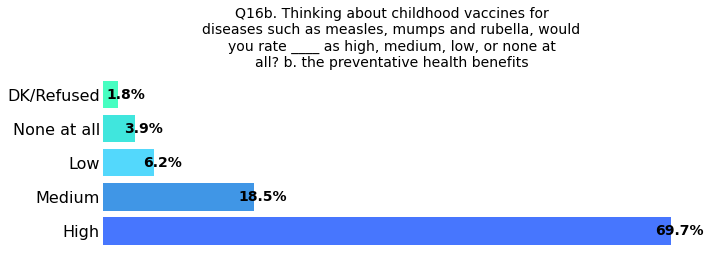

In [186]:
functions.univar_bar(data, 'weight', 'Q16b', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [187]:
##################
# Q16b transform #
##################

conditions = [data['Q16b'] == 1, 
              data['Q16b'] == 2,
              data['Q16b'] == 3,
              data['Q16b'] == 4,
              data['Q16b'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q16b_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q16b_rec'] = wording_dict['Q16b']

# update labels dict with categories and labels
response_dict['q16b_rec'] = {
    -1: "None at all",
    -0.5: "Low",
    0: "DK/Ref",
    0.5: "Medium",
    1: "High"
}

In [188]:
functions.univar_table(data, 'weight', 'q16b_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q16b_rec                                       
-1.0      None at all    58   3.9    2.9    4.8
-0.5              Low    93   6.2    5.0    7.4
 0.0           DK/Ref    26   1.8    1.1    2.4
 0.5           Medium   278  18.5   16.6   20.5
 1.0             High  1047  69.7   67.3   72.0

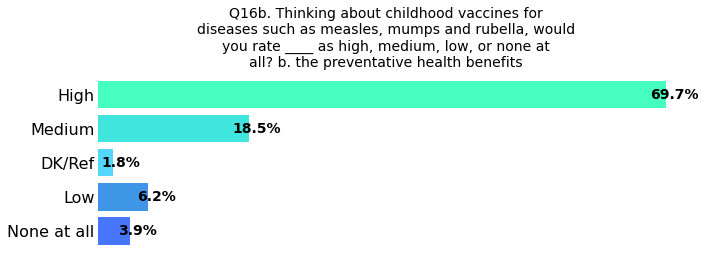

In [189]:
functions.univar_bar(data, 'weight', 'q16b_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q18

In [190]:
wording_dict['Q18']

'Q18. Do you think it is generally safe or unsafe to eat fruits and vegetables grown with pesticides, or do you not know enough about this to say?'

In [191]:
response_dict['Q18']

{1.0: 'Generally safe to eat',
 2.0: 'Generally unsafe to eat',
 3.0: "Don't know enough to say about this",
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [192]:
functions.univar_table(data, 'weight', 'Q18', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q18                                                                
1.0                 Generally safe to eat   386  25.7   23.5   27.9
2.0               Generally unsafe to eat   727  48.4   45.9   50.9
3.0   Don't know enough to say about this   373  24.9   22.7   27.0
99.0                           DK/Refused    15   1.0    0.5    1.5

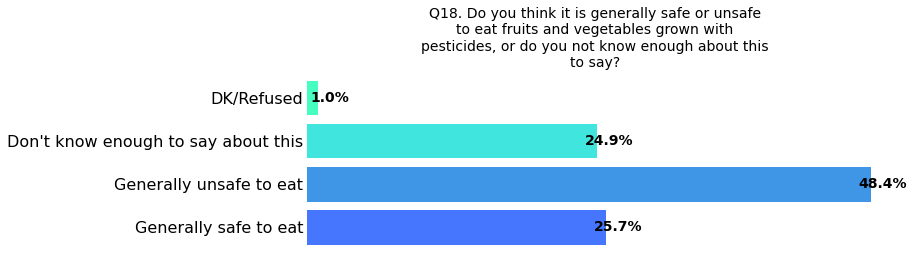

In [193]:
functions.univar_bar(data, 'weight', 'Q18', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_4 )

In [194]:
#################
# Q18 transform #
#################

conditions = [data['Q18'] == 1, 
              data['Q18'] == 2,
              (data['Q18'] == 3) | (data['Q18'] == 99)]
outputs = [1, -1, 0]
data['q18_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q18_rec'] = wording_dict['Q18']

# update labels dict with categories and labels
response_dict['q18_rec'] = {
    -1: "Generally unsafe to eat",
    0: "DK/Ref",
    1: "Generally safe to eat"
}

In [195]:
functions.univar_table(data, 'weight', 'q18_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q18_rec                                                   
-1       Generally unsafe to eat   727  48.4   45.9   50.9
 0                        DK/Ref   389  25.9   23.7   28.1
 1         Generally safe to eat   386  25.7   23.5   27.9

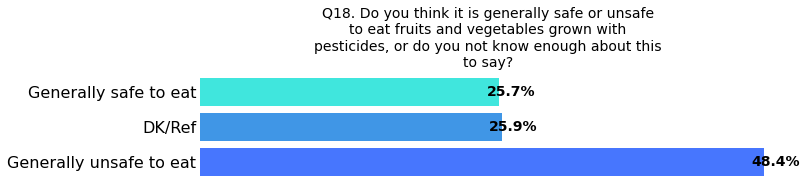

In [196]:
functions.univar_bar(data, 'weight', 'q18_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_4 )

# Q19

In [197]:
wording_dict['Q19']

'Q19. Do you think it is generally safe or unsafe to eat food and drinks with artificial preservatives, or do you not know enough about this to say?'

In [198]:
response_dict['Q19']

{1.0: 'Generally safe to eat',
 2.0: 'Generally unsafe to eat',
 3.0: "Don't know enough to say about this",
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [199]:
functions.univar_table(data, 'weight', 'Q19', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q19                                                                
1.0                 Generally safe to eat   340  22.6   20.5   24.7
2.0               Generally unsafe to eat   669  44.5   42.0   47.0
3.0   Don't know enough to say about this   479  31.9   29.5   34.2
99.0                           DK/Refused    15   1.0    0.5    1.5

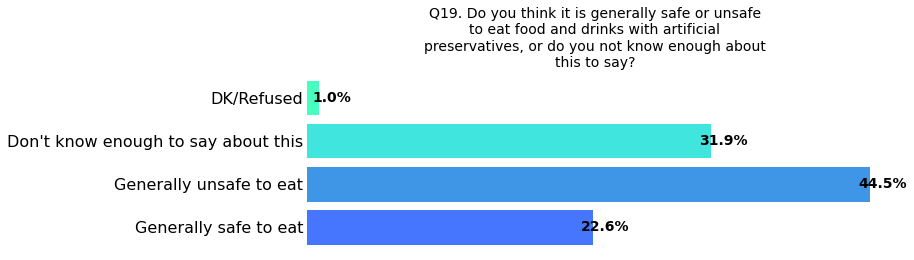

In [200]:
functions.univar_bar(data, 'weight', 'Q19', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_4)

In [201]:
#################
# Q19 transform #
#################

conditions = [data['Q19'] == 1, 
              data['Q19'] == 2,
              (data['Q19'] == 3) | (data['Q19'] == 99)]
outputs = [1, -1, 0]
data['q19_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q19_rec'] = wording_dict['Q19']

# update labels dict with categories and labels
response_dict['q19_rec'] = {
    -1: "Generally unsafe to eat",
    0: "DK/Ref",
    1: "Generally safe to eat"
}

In [202]:
functions.univar_table(data, 'weight', 'q19_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q19_rec                                                   
-1       Generally unsafe to eat   669  44.5   42.0   47.0
 0                        DK/Ref   494  32.9   30.5   35.2
 1         Generally safe to eat   340  22.6   20.5   24.7

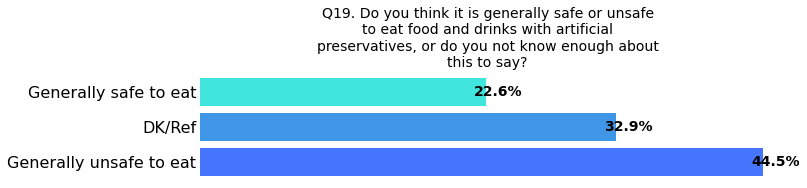

In [203]:
functions.univar_bar(data, 'weight', 'q19_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_4)

# Q20

In [204]:
wording_dict['Q20']

'Q20. Do you think it is generally safe or unsafe to eat genetically modified foods, or do you not know enough about this to say?'

In [205]:
response_dict['Q20']

{1.0: 'Generally safe to eat',
 2.0: 'Generally unsafe to eat',
 3.0: "Don't know enough to say about this",
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [206]:
functions.univar_table(data, 'weight', 'Q20', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q20                                                                
1.0                 Generally safe to eat   411  27.4   25.1   29.6
2.0               Generally unsafe to eat   575  38.2   35.8   40.7
3.0   Don't know enough to say about this   500  33.3   30.9   35.7
99.0                           DK/Refused    16   1.1    0.6    1.6

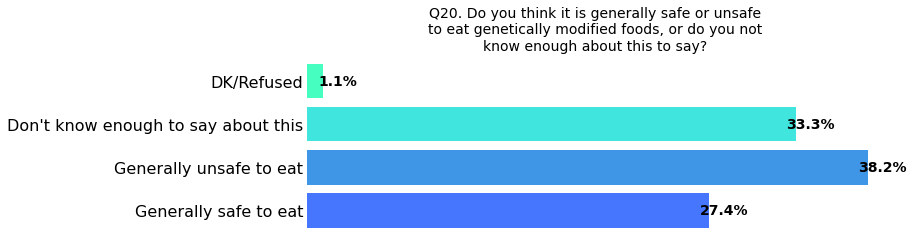

In [207]:
functions.univar_bar(data, 'weight', 'Q20', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_4)

In [208]:
#################
# Q20 transform #
#################

conditions = [data['Q20'] == 1, 
              data['Q20'] == 2,
              (data['Q20'] == 3) | (data['Q20'] == 99)]
outputs = [1, -1, 0]
data['q20_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q20_rec'] = wording_dict['Q20']

# update labels dict with categories and labels
response_dict['q20_rec'] = {
    -1: "Generally unsafe to eat",
    0: "DK/Ref",
    1: "Generally safe to eat"
}

In [209]:
functions.univar_table(data, 'weight', 'q20_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q20_rec                                                   
-1       Generally unsafe to eat   575  38.2   35.8   40.7
 0                        DK/Ref   517  34.4   32.0   36.8
 1         Generally safe to eat   411  27.4   25.1   29.6

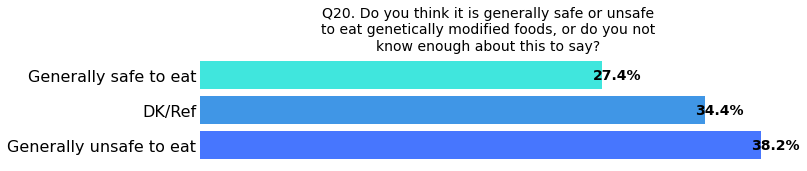

In [210]:
functions.univar_bar(data, 'weight', 'q20_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_4)

# Q23a

In [211]:
wording_dict['Q23a']

'Q23a. Now, thinking about gene editing that can be used to change a baby’s genetic characteristics. Would you say it is appropriate or misusing technology to change a baby’s genetic characteristics ____? a. to make the baby more intelligent'

In [212]:
response_dict['Q23a']

{1.0: 'Appropriate',
 2.0: 'Misusing technology',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [213]:
functions.univar_table(data, 'weight', 'Q23a', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q23a                                               
1.0           Appropriate   254  16.9   15.0   18.8
2.0   Misusing technology  1205  80.2   78.2   82.2
99.0           DK/Refused    43   2.9    2.0    3.7

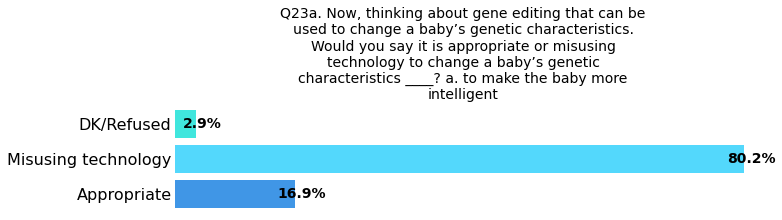

In [214]:
functions.univar_bar(data, 'weight', 'Q23a', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

In [215]:
##################
# Q23a transform #
##################

conditions = [data['Q23a'] == 1, 
              data['Q23a'] == 2,
              data['Q23a'] == 99]
outputs = [1, -1, 0]
data['q23a_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q23a_rec'] = wording_dict['Q23a']

# update labels dict with categories and labels
response_dict['q23a_rec'] = {
    -1: "Misusing technology",
    0: "DK/Ref",
    1: "Appropriate"
}

In [216]:
functions.univar_table(data, 'weight', 'q23a_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q23a_rec                                               
-1        Misusing technology  1205  80.2   78.2   82.2
 0                     DK/Ref    43   2.9    2.0    3.7
 1                Appropriate   254  16.9   15.0   18.8

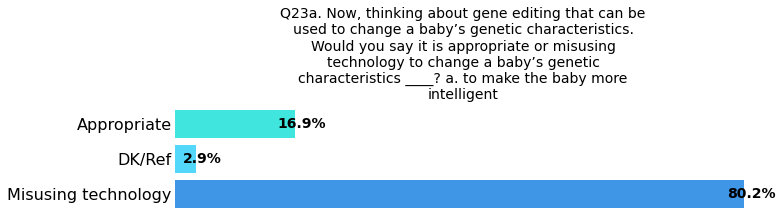

In [217]:
functions.univar_bar(data, 'weight', 'q23a_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

# Q23b

In [218]:
wording_dict['Q23b']

'Q23b. Now ... Would you say it is appropriate or misusing technology to change a baby’s genetic characteristics ____? b. to reduce the risk of a serious disease or condition that could occur over the course of the baby’s lifetime [SHORTENED]'

In [219]:
response_dict['Q23b']

{1.0: 'Appropriate',
 2.0: 'Misusing technology',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [220]:
functions.univar_table(data, 'weight', 'Q23b', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q23b                                               
1.0           Appropriate   861  57.3   54.8   59.8
2.0   Misusing technology   571  38.0   35.6   40.5
99.0           DK/Refused    69   4.6    3.6    5.7

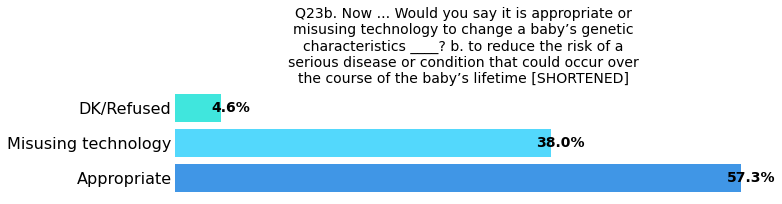

In [221]:
functions.univar_bar(data, 'weight', 'Q23b', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

In [222]:
##################
# Q23b transform #
##################

conditions = [data['Q23b'] == 1, 
              data['Q23b'] == 2,
              data['Q23b'] == 99]
outputs = [1, -1, 0]
data['q23b_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q23b_rec'] = wording_dict['Q23b']

# update labels dict with categories and labels
response_dict['q23b_rec'] = {
    -1: "Misusing technology",
    0: "DK/Ref",
    1: "Appropriate"
}

In [223]:
functions.univar_table(data, 'weight', 'q23b_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q23b_rec                                               
-1        Misusing technology   571  38.0   35.6   40.5
 0                     DK/Ref    69   4.6    3.6    5.7
 1                Appropriate   861  57.3   54.8   59.8

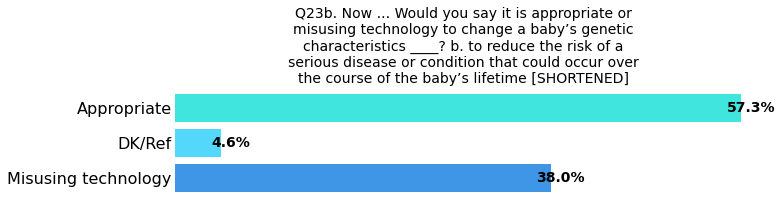

In [224]:
functions.univar_bar(data, 'weight', 'q23b_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

# Q23c

In [225]:
wording_dict['Q23c']

'Q23c. Now ... Would you say it is appropriate or misusing technology to change a baby’s genetic characteristics ____? c. to treat a serious disease or condition the baby would have at birth [SHORTENED]'

In [226]:
response_dict['Q23c']

{1.0: 'Appropriate',
 2.0: 'Misusing technology',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [227]:
functions.univar_table(data, 'weight', 'Q23c', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q23c                                               
1.0           Appropriate   989  65.8   63.4   68.2
2.0   Misusing technology   449  29.9   27.5   32.2
99.0           DK/Refused    65   4.3    3.3    5.3

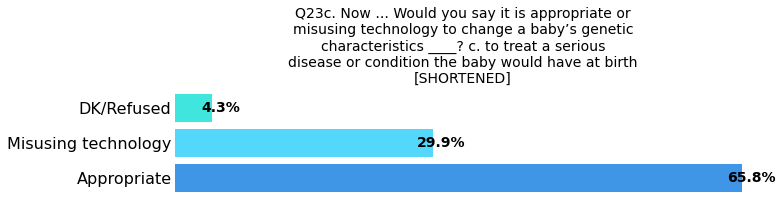

In [228]:
functions.univar_bar(data, 'weight', 'Q23c', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

In [229]:
##################
# Q23c transform #
##################

conditions = [data['Q23c'] == 1, 
              data['Q23c'] == 2,
              data['Q23c'] == 99]
outputs = [1, -1, 0]
data['q23c_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q23c_rec'] = wording_dict['Q23c']

# update labels dict with categories and labels
response_dict['q23c_rec'] = {
    -1: "Misusing technology",
    0: "DK/Ref",
    1: "Appropriate"
}

In [230]:
functions.univar_table(data, 'weight', 'q23c_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q23c_rec                                               
-1        Misusing technology   449  29.9   27.5   32.2
 0                     DK/Ref    65   4.3    3.3    5.3
 1                Appropriate   989  65.8   63.4   68.2

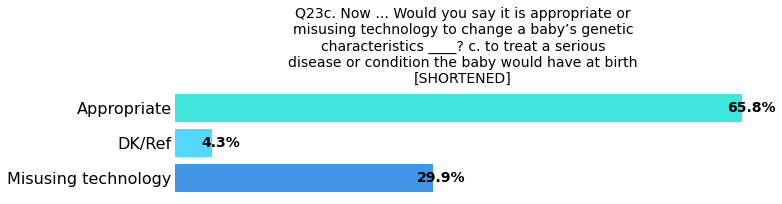

In [231]:
functions.univar_bar(data, 'weight', 'q23c_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=1, color = colors_3)

# Q24a

In [232]:
wording_dict['Q24a']

"Q24a. I'd like you to think about some possible environmental problems. Do you think ____ is a big problem, a moderate problem, a small problem or not a problem in (survey public)? a. air pollution"

In [233]:
response_dict['Q24a']

{1.0: 'A big problem',
 2.0: 'A moderate problem',
 3.0: 'A small problem',
 4.0: 'Not a problem',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [234]:
functions.univar_table(data, 'weight', 'Q24a', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q24a                                              
1.0        A big problem   944  62.9   60.4   65.3
2.0   A moderate problem   349  23.2   21.1   25.3
3.0      A small problem   139   9.3    7.8   10.7
4.0        Not a problem    64   4.3    3.2    5.3
99.0          DK/Refused     6   0.4    0.1    0.7

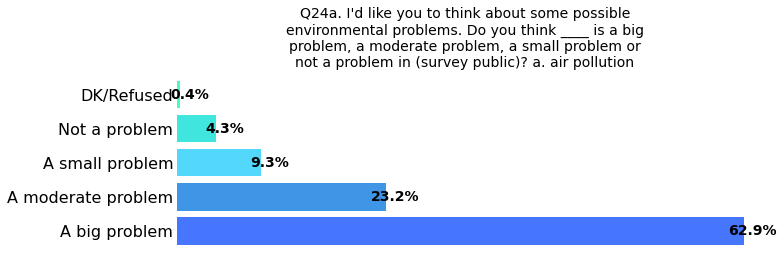

In [235]:
functions.univar_bar(data, 'weight', 'Q24a', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [236]:
##################
# Q24a transform #
##################

conditions = [data['Q24a'] == 1, 
              data['Q24a'] == 2,
              data['Q24a'] == 3,
              data['Q24a'] == 4,
              data['Q24a'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q24a_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q24a_rec'] = wording_dict['Q24a']

# update labels dict with categories and labels
response_dict['q24a_rec'] = {
    -1: "Not a problem",
    -0.5: "A small problem",
    0: "DK/Ref",
    0.5: "A moderate problem",
    1: "A big problem"
}

In [237]:
functions.univar_table(data, 'weight', 'q24a_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q24a_rec                                              
-1.0           Not a problem    64   4.3    3.2    5.3
-0.5         A small problem   139   9.3    7.8   10.7
 0.0                  DK/Ref     6   0.4    0.1    0.7
 0.5      A moderate problem   349  23.2   21.1   25.3
 1.0           A big problem   944  62.9   60.4   65.3

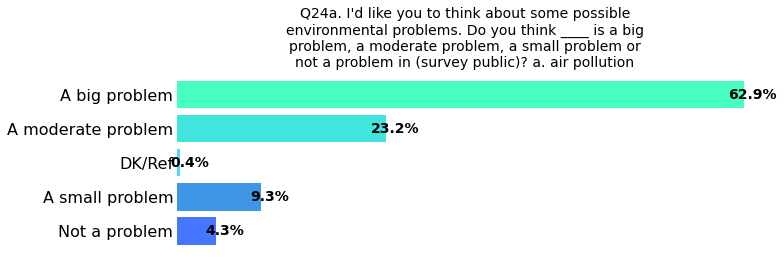

In [238]:
functions.univar_bar(data, 'weight', 'q24a_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q24b

In [239]:
wording_dict['Q24b']

"Q24b. I'd like you to think about some possible environmental problems. Do you think ____ is a big problem, a moderate problem, a small problem or not a problem in (survey public)? b. pollution of rivers, lakes and oceans"

In [240]:
response_dict['Q24b']

{1.0: 'A big problem',
 2.0: 'A moderate problem',
 3.0: 'A small problem',
 4.0: 'Not a problem',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [241]:
functions.univar_table(data, 'weight', 'Q24b', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q24b                                              
1.0        A big problem  1131  75.3   73.1   77.5
2.0   A moderate problem   231  15.3   13.5   17.2
3.0      A small problem    95   6.3    5.1    7.6
4.0        Not a problem    37   2.5    1.7    3.2
99.0          DK/Refused     8   0.6    0.2    0.9

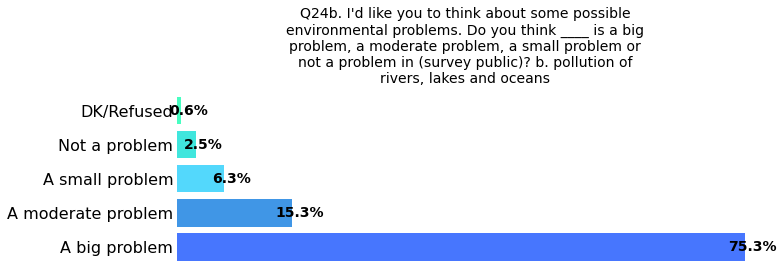

In [242]:
functions.univar_bar(data, 'weight', 'Q24b', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [243]:
##################
# Q24b transform #
##################

conditions = [data['Q24b'] == 1, 
              data['Q24b'] == 2,
              data['Q24b'] == 3,
              data['Q24b'] == 4,
              data['Q24b'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q24b_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q24b_rec'] = wording_dict['Q24b']

# update labels dict with categories and labels
response_dict['q24b_rec'] = {
    -1: "Not a problem",
    -0.5: "A small problem",
    0: "DK/Ref",
    0.5: "A moderate problem",
    1: "A big problem"
}

In [244]:
functions.univar_table(data, 'weight', 'q24b_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q24b_rec                                              
-1.0           Not a problem    37   2.5    1.7    3.2
-0.5         A small problem    95   6.3    5.1    7.6
 0.0                  DK/Ref     8   0.6    0.2    0.9
 0.5      A moderate problem   231  15.3   13.5   17.2
 1.0           A big problem  1131  75.3   73.1   77.5

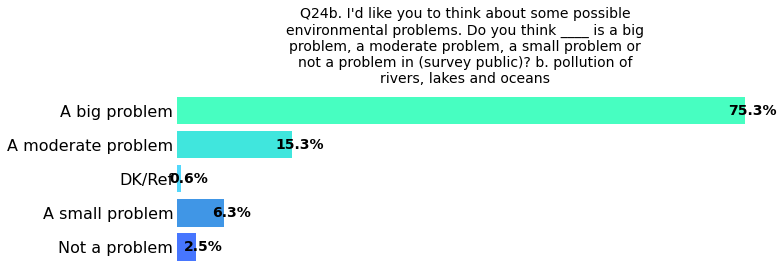

In [245]:
functions.univar_bar(data, 'weight', 'q24b_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q24c

In [246]:
wording_dict['Q24c']

"Q24c. I'd like you to think about some possible environmental problems. Do you think ____ is a big problem, a moderate problem, a small problem or not a problem in (survey public)? c. extinction of plant and animal species"

In [247]:
response_dict['Q24c']

{1.0: 'A big problem',
 2.0: 'A moderate problem',
 3.0: 'A small problem',
 4.0: 'Not a problem',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [248]:
functions.univar_table(data, 'weight', 'Q24c', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q24c                                              
1.0        A big problem   898  59.8   57.3   62.2
2.0   A moderate problem   308  20.5   18.5   22.6
3.0      A small problem   148   9.9    8.4   11.4
4.0        Not a problem   106   7.0    5.8    8.3
99.0          DK/Refused    42   2.8    1.9    3.6

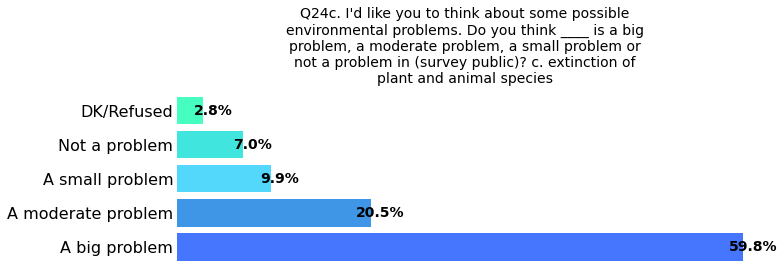

In [249]:
functions.univar_bar(data, 'weight', 'Q24c', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [250]:
##################
# Q24c transform #
##################

conditions = [data['Q24c'] == 1, 
              data['Q24c'] == 2,
              data['Q24c'] == 3,
              data['Q24c'] == 4,
              data['Q24c'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q24c_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q24c_rec'] = wording_dict['Q24c']

# update labels dict with categories and labels
response_dict['q24c_rec'] = {
    -1: "Not a problem",
    -0.5: "A small problem",
    0: "DK/Ref",
    0.5: "A moderate problem",
    1: "A big problem"
}

In [251]:
functions.univar_table(data, 'weight', 'q24c_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q24c_rec                                              
-1.0           Not a problem   106   7.0    5.8    8.3
-0.5         A small problem   148   9.9    8.4   11.4
 0.0                  DK/Ref    42   2.8    1.9    3.6
 0.5      A moderate problem   308  20.5   18.5   22.6
 1.0           A big problem   898  59.8   57.3   62.2

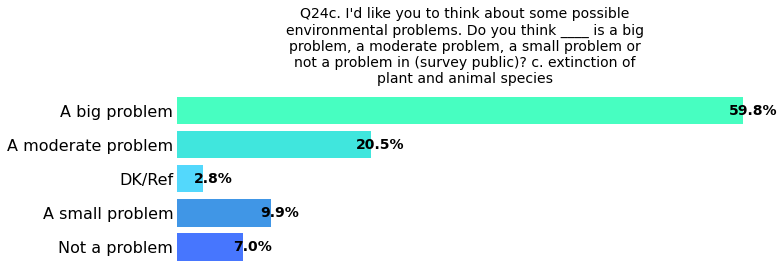

In [252]:
functions.univar_bar(data, 'weight', 'q24c_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q24e

In [253]:
wording_dict['Q24e']

"Q24e. I'd like you to think about some possible environmental problems. Do you think ____ is a big problem, a moderate problem, a small problem or not a problem in (survey public)? e. the amount of garbage, waste and landfills"

In [254]:
response_dict['Q24e']

{1.0: 'A big problem',
 2.0: 'A moderate problem',
 3.0: 'A small problem',
 4.0: 'Not a problem',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [255]:
functions.univar_table(data, 'weight', 'Q24e', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q24e                                              
1.0        A big problem  1075  71.6   69.3   73.9
2.0   A moderate problem   288  19.2   17.2   21.2
3.0      A small problem    88   5.9    4.7    7.1
4.0        Not a problem    38   2.5    1.7    3.3
99.0          DK/Refused    12   0.8    0.4    1.3

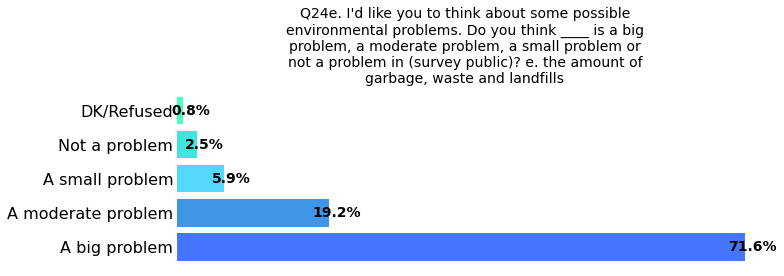

In [256]:
functions.univar_bar(data, 'weight', 'Q24e', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [257]:
##################
# Q24e transform #
##################

conditions = [data['Q24e'] == 1, 
              data['Q24e'] == 2,
              data['Q24e'] == 3,
              data['Q24e'] == 4,
              data['Q24e'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q24e_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q24e_rec'] = wording_dict['Q24e']

# update labels dict with categories and labels
response_dict['q24e_rec'] = {
    -1: "Not a problem",
    -0.5: "A small problem",
    0: "DK/Ref",
    0.5: "A moderate problem",
    1: "A big problem"
}

In [258]:
functions.univar_table(data, 'weight', 'q24e_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q24e_rec                                              
-1.0           Not a problem    38   2.5    1.7    3.3
-0.5         A small problem    88   5.9    4.7    7.1
 0.0                  DK/Ref    12   0.8    0.4    1.3
 0.5      A moderate problem   288  19.2   17.2   21.2
 1.0           A big problem  1075  71.6   69.3   73.9

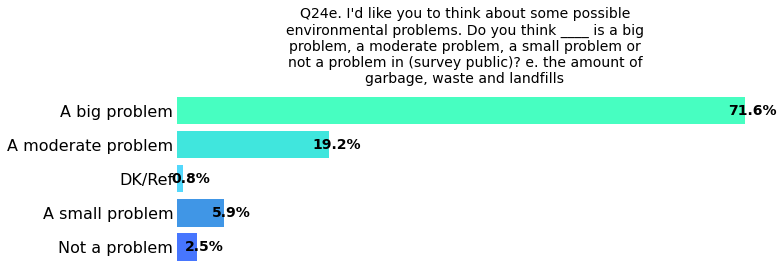

In [259]:
functions.univar_bar(data, 'weight', 'q24e_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q24f

In [260]:
wording_dict['Q24f']

"Q24f. I'd like you to think about some possible environmental problems. Do you think ____ is a big problem, a moderate problem, a small problem or not a problem in (survey public)? f. loss of forests"

In [261]:
response_dict['Q24f']

{1.0: 'A big problem',
 2.0: 'A moderate problem',
 3.0: 'A small problem',
 4.0: 'Not a problem',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [262]:
functions.univar_table(data, 'weight', 'Q24f', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q24f                                              
1.0        A big problem   991  66.0   63.6   68.4
2.0   A moderate problem   274  18.3   16.3   20.2
3.0      A small problem    92   6.1    4.9    7.4
4.0        Not a problem   113   7.5    6.2    8.9
99.0          DK/Refused    31   2.0    1.3    2.8

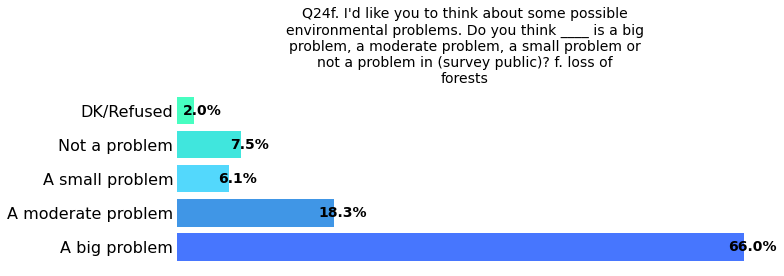

In [263]:
functions.univar_bar(data, 'weight', 'Q24f', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [264]:
##################
# Q24f transform #
##################

conditions = [data['Q24f'] == 1, 
              data['Q24f'] == 2,
              data['Q24f'] == 3,
              data['Q24f'] == 4,
              data['Q24f'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q24f_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q24f_rec'] = wording_dict['Q24f']

# update labels dict with categories and labels
response_dict['q24f_rec'] = {
    -1: "Not a problem",
    -0.5: "A small problem",
    0: "DK/Ref",
    0.5: "A moderate problem",
    1: "A big problem"
}

In [265]:
functions.univar_table(data, 'weight', 'q24f_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q24f_rec                                              
-1.0           Not a problem   113   7.5    6.2    8.9
-0.5         A small problem    92   6.1    4.9    7.4
 0.0                  DK/Ref    31   2.0    1.3    2.8
 0.5      A moderate problem   274  18.3   16.3   20.2
 1.0           A big problem   991  66.0   63.6   68.4

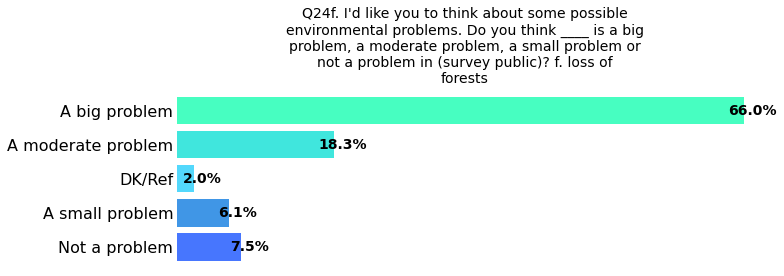

In [266]:
functions.univar_bar(data, 'weight', 'q24f_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q25

In [267]:
wording_dict['Q25']

'Q25. Which of these statements comes closer to your view, even if neither is exactly right?'

In [268]:
response_dict['Q25']

{1.0: 'Protecting the environment should be given priority, even if it causes slower economic growth and some loss of jobs',
 2.0: 'Creating jobs should be the top priority, even if the environment suffers to some extent',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [269]:
functions.univar_table(data, 'weight', 'Q25', response_dict)

Labels  \
Q25                                                                                                                         
1.0   Protecting the environment should be given priority, even if it causes slower economic growth and some loss of jobs   
2.0                              Creating jobs should be the top priority, even if the environment suffers to some extent   
99.0                                                                                                           DK/Refused   

      Freq  Prop  CI_lo  CI_up  
Q25                             
1.0    968  64.5   62.0   66.9  
2.0    468  31.1   28.8   33.5  
99.0    66   4.4    3.4    5.4

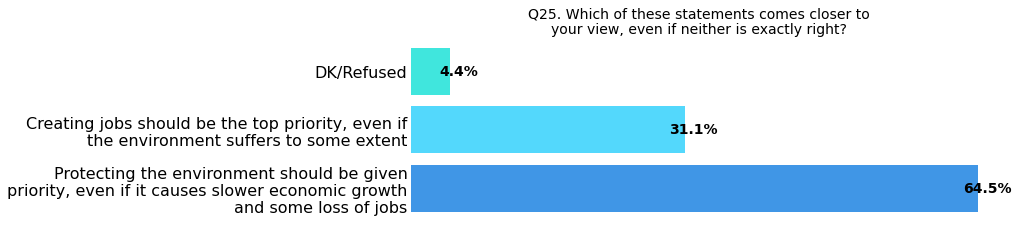

In [270]:
functions.univar_bar(data, 'weight', 'Q25', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

In [271]:
#################
# Q25 transform #
#################

conditions = [data['Q25'] == 1, 
              data['Q25'] == 2,
              data['Q25'] == 99]
outputs = [1, -1, 0]
data['q25_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q25_rec'] = wording_dict['Q25']

# update labels dict with categories and labels
response_dict['q25_rec'] = {
    -1: "Creating jobs should be the top priority, even if the environment suffers to some extent",
    0: "DK/Ref",
    1: "Protecting the environment should be given priority, even if it causes slower economic growth and some loss of jobs"
}

In [272]:
functions.univar_table(data, 'weight', 'q25_rec', response_dict)

Labels  \
q25_rec                                                                                                                        
-1                                  Creating jobs should be the top priority, even if the environment suffers to some extent   
 0                                                                                                                    DK/Ref   
 1       Protecting the environment should be given priority, even if it causes slower economic growth and some loss of jobs   

         Freq  Prop  CI_lo  CI_up  
q25_rec                            
-1        468  31.1   28.8   33.5  
 0         66   4.4    3.4    5.4  
 1        968  64.5   62.0   66.9

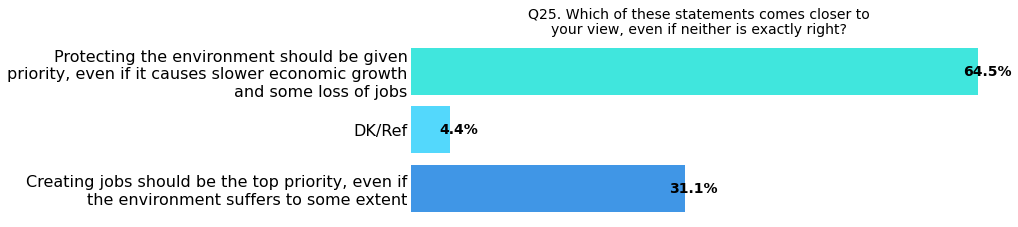

In [273]:
functions.univar_bar(data, 'weight', 'q25_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

# Q26a

In [274]:
wording_dict['Q26a']

'Q26a. Do you favor or oppose using more ____ as a source of energy in (survey public)? a. solar power'

In [275]:
response_dict['Q26a']

{1.0: 'Favor',
 2.0: 'Oppose',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [276]:
functions.univar_table(data, 'weight', 'Q26a', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q26a                                      
1.0        Favor  1369  91.1   89.7   92.6
2.0       Oppose   113   7.5    6.2    8.9
99.0  DK/Refused    20   1.3    0.8    1.9

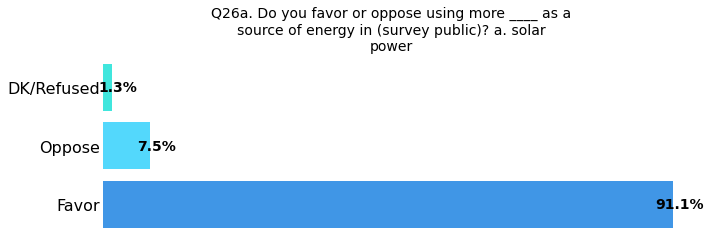

In [277]:
functions.univar_bar(data, 'weight', 'Q26a', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

In [278]:
##################
# Q26a transform #
##################

conditions = [data['Q26a'] == 1, 
              data['Q26a'] == 2,
              data['Q26a'] == 99]
outputs = [1, -1, 0]
data['q26a_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q26a_rec'] = wording_dict['Q26a']

# update labels dict with categories and labels
response_dict['q26a_rec'] = {
    -1: "Oppose",
    0: "DK/Ref",
    1: "Favor"
}

In [279]:
functions.univar_table(data, 'weight', 'q26a_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q26a_rec                                  
-1        Oppose   113   7.5    6.2    8.9
 0        DK/Ref    20   1.3    0.8    1.9
 1         Favor  1369  91.1   89.7   92.6

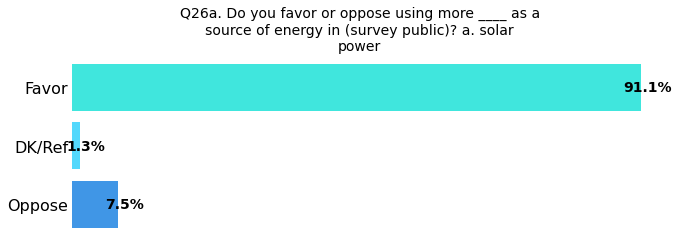

In [280]:
functions.univar_bar(data, 'weight', 'q26a_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

# Q26b

In [281]:
wording_dict['Q26b']

'Q26b. Do you favor or oppose using more ____ as a source of energy in (survey public)? b. wind power'

In [282]:
response_dict['Q26b']

{1.0: 'Favor',
 2.0: 'Oppose',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [283]:
functions.univar_table(data, 'weight', 'Q26b', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q26b                                      
1.0        Favor  1230  81.9   80.0   83.9
2.0       Oppose   209  13.9   12.2   15.7
99.0  DK/Refused    63   4.2    3.2    5.2

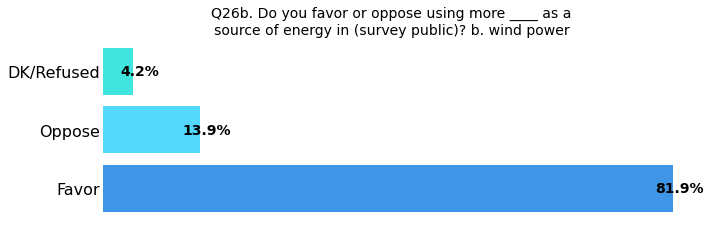

In [284]:
functions.univar_bar(data, 'weight', 'Q26b', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

In [285]:
##################
# Q26b transform #
##################

conditions = [data['Q26b'] == 1, 
              data['Q26b'] == 2,
              data['Q26b'] == 99]
outputs = [1, -1, 0]
data['q26b_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q26b_rec'] = wording_dict['Q26b']

# update labels dict with categories and labels
response_dict['q26b_rec'] = {
    -1: "Oppose",
    0: "DK/Ref",
    1: "Favor"
}

In [286]:
functions.univar_table(data, 'weight', 'q26b_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q26b_rec                                  
-1        Oppose   209  13.9   12.2   15.7
 0        DK/Ref    63   4.2    3.2    5.2
 1         Favor  1230  81.9   80.0   83.9

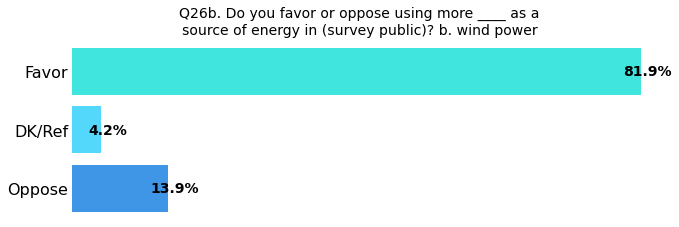

In [287]:
functions.univar_bar(data, 'weight', 'q26b_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

# Q26c

In [288]:
wording_dict['Q26c']

'Q26c. Do you favor or oppose using more ____ as a source of energy in (survey public)? c. coal'

In [289]:
response_dict['Q26c']

{1.0: 'Favor',
 2.0: 'Oppose',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [290]:
functions.univar_table(data, 'weight', 'Q26c', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q26c                                      
1.0        Favor   574  38.2   35.7   40.7
2.0       Oppose   856  57.0   54.5   59.5
99.0  DK/Refused    73   4.8    3.7    5.9

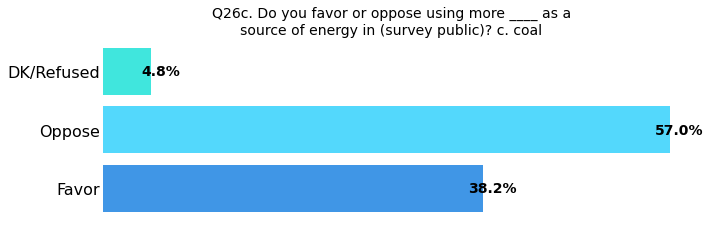

In [291]:
functions.univar_bar(data, 'weight', 'Q26c', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

In [292]:
##################
# Q26c transform #
##################

conditions = [data['Q26c'] == 1, 
              data['Q26c'] == 2,
              data['Q26c'] == 99]
outputs = [1, -1, 0]
data['q26c_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q26c_rec'] = wording_dict['Q26c']

# update labels dict with categories and labels
response_dict['q26c_rec'] = {
    -1: "Oppose",
    0: "DK/Ref",
    1: "Favor"
}

In [293]:
functions.univar_table(data, 'weight', 'q26c_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q26c_rec                                  
-1        Oppose   856  57.0   54.5   59.5
 0        DK/Ref    73   4.8    3.7    5.9
 1         Favor   574  38.2   35.7   40.7

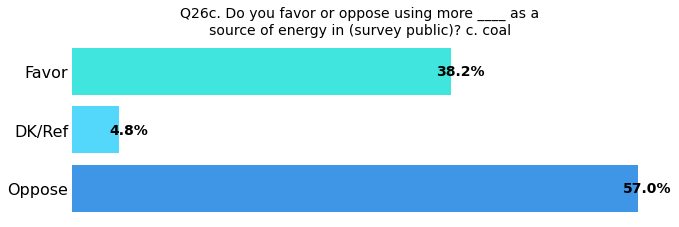

In [294]:
functions.univar_bar(data, 'weight', 'q26c_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

# Q26d

In [295]:
wording_dict['Q26d']

'Q26d. Do you favor or oppose using more ____ as a source of energy in (survey public)? d. natural gas'

In [296]:
response_dict['Q26d']

{1.0: 'Favor',
 2.0: 'Oppose',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [297]:
functions.univar_table(data, 'weight', 'Q26d', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q26d                                      
1.0        Favor  1076  71.6   69.4   73.9
2.0       Oppose   363  24.1   22.0   26.3
99.0  DK/Refused    63   4.2    3.2    5.2

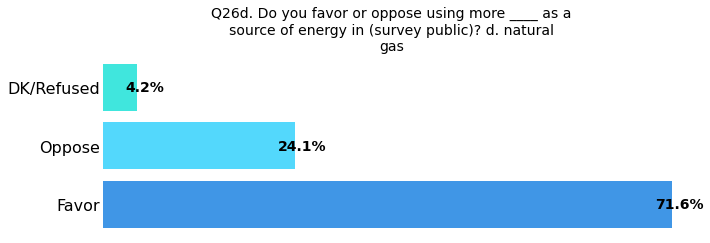

In [298]:
functions.univar_bar(data, 'weight', 'Q26d', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

In [299]:
##################
# Q26d transform #
##################

conditions = [data['Q26d'] == 1, 
              data['Q26d'] == 2,
              data['Q26d'] == 99]
outputs = [1, -1, 0]
data['q26d_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q26d_rec'] = wording_dict['Q26d']

# update labels dict with categories and labels
response_dict['q26d_rec'] = {
    -1: "Oppose",
    0: "DK/Ref",
    1: "Favor"
}

In [300]:
functions.univar_table(data, 'weight', 'q26d_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q26d_rec                                  
-1        Oppose   363  24.1   22.0   26.3
 0        DK/Ref    63   4.2    3.2    5.2
 1         Favor  1076  71.6   69.4   73.9

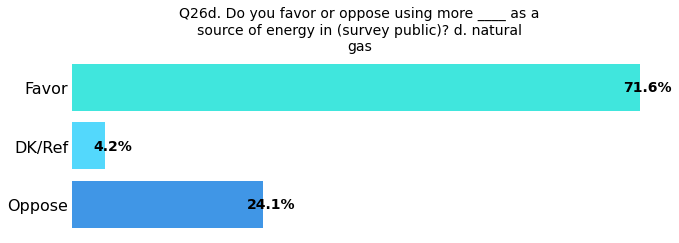

In [301]:
functions.univar_bar(data, 'weight', 'q26d_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

# Q26e

In [302]:
wording_dict['Q26e']

'Q26e. Do you favor or oppose using more ____ as a source of energy in (survey public)? e. nuclear power'

In [303]:
response_dict['Q26e']

{1.0: 'Favor',
 2.0: 'Oppose',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [304]:
functions.univar_table(data, 'weight', 'Q26e', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q26e                                      
1.0        Favor   661  44.0   41.5   46.5
2.0       Oppose   733  48.8   46.3   51.3
99.0  DK/Refused   108   7.2    5.9    8.5

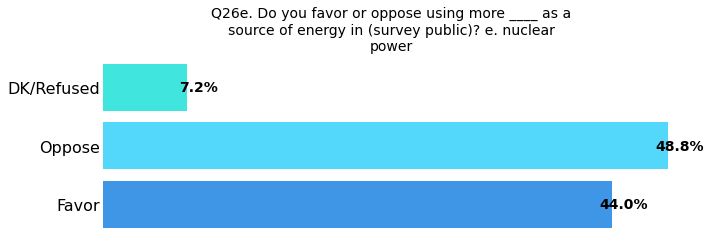

In [305]:
functions.univar_bar(data, 'weight', 'Q26e', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

In [306]:
##################
# Q26e transform #
##################

conditions = [data['Q26e'] == 1, 
              data['Q26e'] == 2,
              data['Q26e'] == 99]
outputs = [1, -1, 0]
data['q26e_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q26e_rec'] = wording_dict['Q26e']

# update labels dict with categories and labels
response_dict['q26e_rec'] = {
    -1: "Oppose",
    0: "DK/Ref",
    1: "Favor"
}

In [307]:
functions.univar_table(data, 'weight', 'q26e_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q26e_rec                                  
-1        Oppose   733  48.8   46.3   51.3
 0        DK/Ref   108   7.2    5.9    8.5
 1         Favor   661  44.0   41.5   46.5

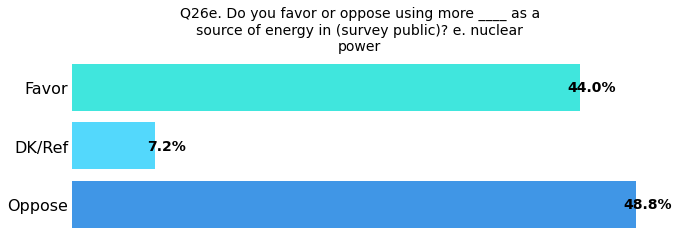

In [308]:
functions.univar_bar(data, 'weight', 'q26e_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

# Q26f

In [309]:
wording_dict['Q26f']

'Q26f. Do you favor or oppose using more ____ as a source of energy in (survey public)? f. oil'

In [310]:
response_dict['Q26f']

{1.0: 'Favor',
 2.0: 'Oppose',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [311]:
functions.univar_table(data, 'weight', 'Q26f', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q26f                                      
1.0        Favor   700  46.6   44.1   49.1
2.0       Oppose   734  48.9   46.4   51.4
99.0  DK/Refused    68   4.5    3.5    5.6

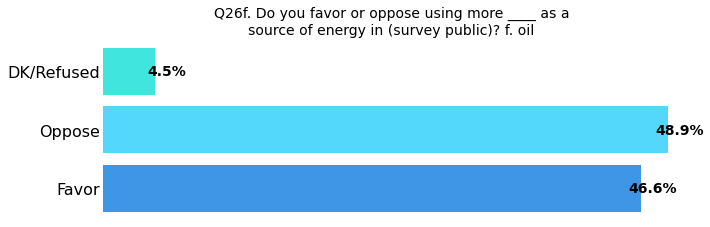

In [312]:
functions.univar_bar(data, 'weight', 'Q26f', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

In [313]:
##################
# Q26f transform #
##################

conditions = [data['Q26f'] == 1, 
              data['Q26f'] == 2,
              data['Q26f'] == 99]
outputs = [1, -1, 0]
data['q26f_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q26f_rec'] = wording_dict['Q26f']

# update labels dict with categories and labels
response_dict['q26f_rec'] = {
    -1: "Oppose",
    0: "DK/Ref",
    1: "Favor"
}

In [314]:
functions.univar_table(data, 'weight', 'q26f_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q26f_rec                                  
-1        Oppose   734  48.9   46.4   51.4
 0        DK/Ref    68   4.5    3.5    5.6
 1         Favor   700  46.6   44.1   49.1

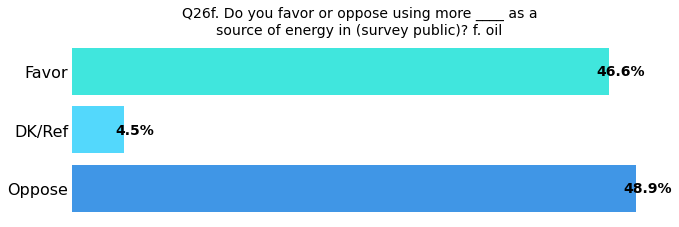

In [315]:
functions.univar_bar(data, 'weight', 'q26f_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

# Q26g

In [316]:
wording_dict['Q26g']

'Q26g. Do you favor or oppose using more ____ as a source of energy in (survey public)? g. hydropower'

In [317]:
response_dict['Q26g']

{1.0: 'Favor',
 2.0: 'Oppose',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [318]:
functions.univar_table(data, 'weight', 'Q26g', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q26g                                      
1.0        Favor  1206  80.3   78.3   82.3
2.0       Oppose   151  10.0    8.5   11.5
99.0  DK/Refused   145   9.7    8.2   11.2

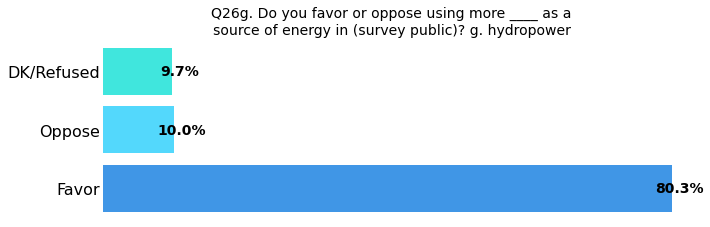

In [319]:
functions.univar_bar(data, 'weight', 'Q26g', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

In [320]:
##################
# Q26g transform #
##################

conditions = [data['Q26g'] == 1, 
              data['Q26g'] == 2,
              data['Q26g'] == 99]
outputs = [1, -1, 0]
data['q26g_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q26g_rec'] = wording_dict['Q26g']

# update labels dict with categories and labels
response_dict['q26g_rec'] = {
    -1: "Oppose",
    0: "DK/Ref",
    1: "Favor"
}

In [321]:
functions.univar_table(data, 'weight', 'q26g_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q26g_rec                                  
-1        Oppose   151  10.0    8.5   11.5
 0        DK/Ref   145   9.7    8.2   11.2
 1         Favor  1206  80.3   78.3   82.3

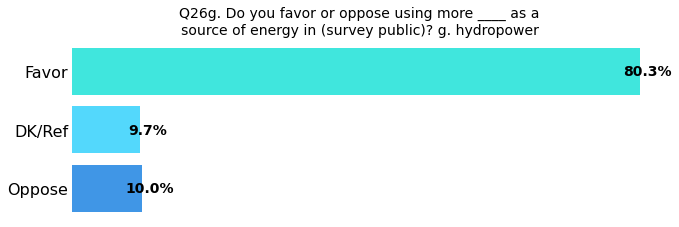

In [322]:
functions.univar_bar(data, 'weight', 'q26g_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

# Q27

In [323]:
wording_dict['Q27']

"Q27. Right now, which of these do you think should be the more important priority for addressing (survey public)'s energy supply?"

In [324]:
response_dict['Q27']

{1.0: 'Increasing energy production from renewable energy such as wind and solar',
 2.0: 'Increasing energy production from oil, natural gas and coal',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [325]:
functions.univar_table(data, 'weight', 'Q27', response_dict)

Labels  \
Q27                                                                               
1.0   Increasing energy production from renewable energy such as wind and solar   
2.0                 Increasing energy production from oil, natural gas and coal   
99.0                                                                 DK/Refused   

      Freq  Prop  CI_lo  CI_up  
Q27                             
1.0   1109  73.9   71.6   76.1  
2.0    364  24.2   22.0   26.4  
99.0    29   1.9    1.2    2.6

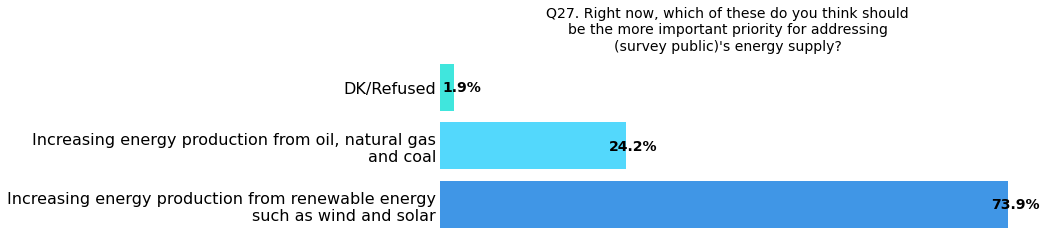

In [326]:
functions.univar_bar(data, 'weight', 'Q27', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

In [327]:
#################
# Q27 transform #
#################

conditions = [data['Q27'] == 1, 
              data['Q27'] == 2,
              data['Q27'] == 99]
outputs = [1, -1, 0]
data['q27_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q27_rec'] = wording_dict['Q27']

# update labels dict with categories and labels
response_dict['q27_rec'] = {
    -1: "Increasing energy production from oil, natural gas and coal",
    0: "DK/Ref",
    1: "Increasing energy production from renewable energy such as wind and solar"
}

In [328]:
functions.univar_table(data, 'weight', 'q27_rec', response_dict)

Labels  \
q27_rec                                                                              
-1                     Increasing energy production from oil, natural gas and coal   
 0                                                                          DK/Ref   
 1       Increasing energy production from renewable energy such as wind and solar   

         Freq  Prop  CI_lo  CI_up  
q27_rec                            
-1        364  24.2   22.0   26.4  
 0         29   1.9    1.2    2.6  
 1       1109  73.9   71.6   76.1

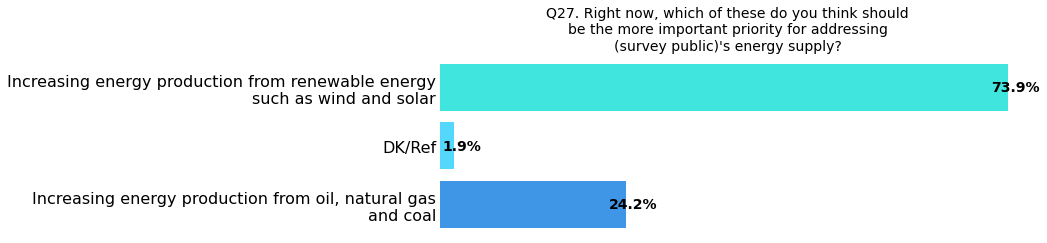

In [329]:
functions.univar_bar(data, 'weight', 'q27_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

# Q28

In [330]:
wording_dict['Q28']

'Q28. In your view, is global climate change a very serious problem, somewhat serious, not too serious or not a problem?'

In [331]:
response_dict['Q28']

{1.0: 'Very serious problem',
 2.0: 'Somewhat serious problem',
 3.0: 'Not too serious',
 4.0: 'Not a problem',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [332]:
functions.univar_table(data, 'weight', 'Q28', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q28                                                     
1.0       Very serious problem   798  53.1   50.6   55.6
2.0   Somewhat serious problem   315  21.0   18.9   23.0
3.0            Not too serious   152  10.1    8.6   11.7
4.0              Not a problem   229  15.3   13.4   17.1
99.0                DK/Refused     7   0.5    0.1    0.8

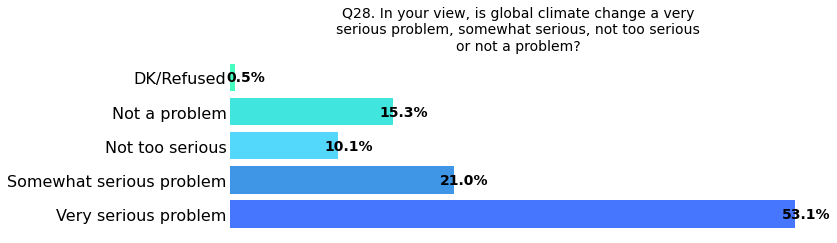

In [333]:
functions.univar_bar(data, 'weight', 'Q28', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [334]:
#################
# Q28 transform #
#################

conditions = [data['Q28'] == 1, 
              data['Q28'] == 2,
              data['Q28'] == 3,
              data['Q28'] == 4,
              data['Q28'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q28_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q28_rec'] = wording_dict['Q28']

# update labels dict with categories and labels
response_dict['q28_rec'] = {
    -1: "Not a problem",
    -0.5: "Not too serious",
    0: "DK/Ref",
    0.5: "Somewhat serious problem",
    1: "Very serious problem"
}

In [335]:
functions.univar_table(data, 'weight', 'q28_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q28_rec                                                    
-1.0                Not a problem   229  15.3   13.4   17.1
-0.5              Not too serious   152  10.1    8.6   11.7
 0.0                       DK/Ref     7   0.5    0.1    0.8
 0.5     Somewhat serious problem   315  21.0   18.9   23.0
 1.0         Very serious problem   798  53.1   50.6   55.6

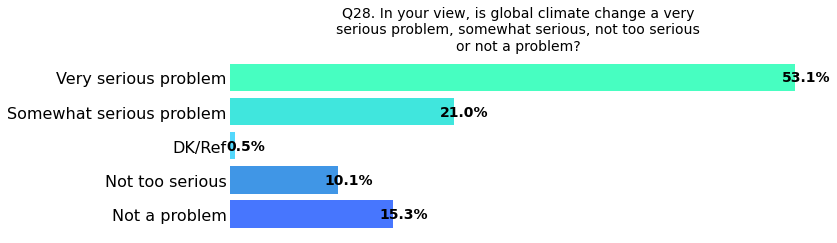

In [336]:
functions.univar_bar(data, 'weight', 'q28_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q29

In [337]:
wording_dict['Q29']

'Q29. How much do you think human activity, such as the burning of fossil fuels, contributes to global climate change — a great deal, some, not too much or not at all?'

In [338]:
response_dict['Q29']

{1.0: 'A great deal',
 2.0: 'Some',
 3.0: 'Not too much',
 4.0: 'Not at all',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [339]:
functions.univar_table(data, 'weight', 'Q29', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q29                                         
1.0   A great deal   734  48.8   46.3   51.4
2.0           Some   390  26.0   23.8   28.2
3.0   Not too much   192  12.8   11.1   14.4
4.0     Not at all   151  10.1    8.5   11.6
99.0    DK/Refused    35   2.3    1.6    3.1

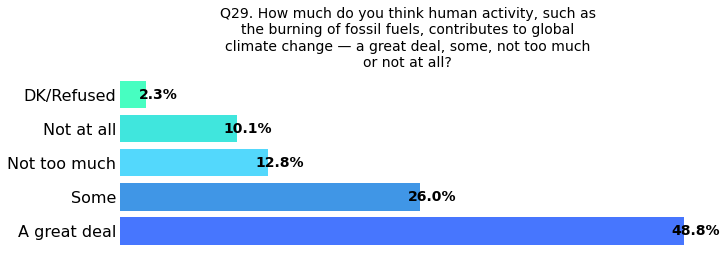

In [340]:
functions.univar_bar(data, 'weight', 'Q29', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [341]:
#################
# Q29 transform #
#################

conditions = [data['Q29'] == 1, 
              data['Q29'] == 2,
              data['Q29'] == 3,
              data['Q29'] == 4,
              data['Q29'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q29_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q29_rec'] = wording_dict['Q29']

# update labels dict with categories and labels
response_dict['q29_rec'] = {
    -1: "Not at all",
    -0.5: "Not too much",
    0: "DK/Ref",
    0.5: "Some",
    1: "A great deal"
}

In [342]:
functions.univar_table(data, 'weight', 'q29_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q29_rec                                        
-1.0       Not at all   151  10.1    8.5   11.6
-0.5     Not too much   192  12.8   11.1   14.4
 0.0           DK/Ref    35   2.3    1.6    3.1
 0.5             Some   390  26.0   23.8   28.2
 1.0     A great deal   734  48.8   46.3   51.4

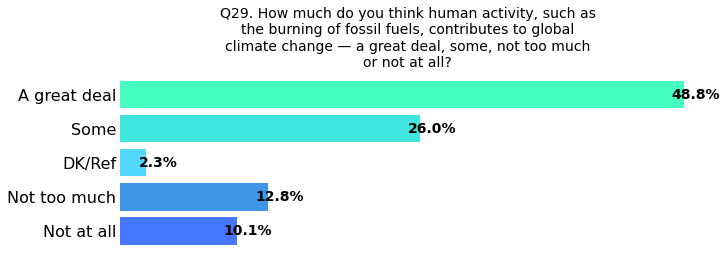

In [343]:
functions.univar_bar(data, 'weight', 'q29_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q30

In [344]:
wording_dict['Q30']

'Q30. Do you think the national government is doing too much, too little, or about the right amount to reduce the effects of global climate change?'

In [345]:
response_dict['Q30']

{1.0: 'Too much',
 2.0: 'Too little',
 3.0: 'About the right amount',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [346]:
functions.univar_table(data, 'weight', 'Q30', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q30                                                   
1.0                 Too much   170  11.3    9.7   12.9
2.0               Too little   949  63.2   60.7   65.6
3.0   About the right amount   321  21.4   19.3   23.4
99.0              DK/Refused    62   4.1    3.1    5.1

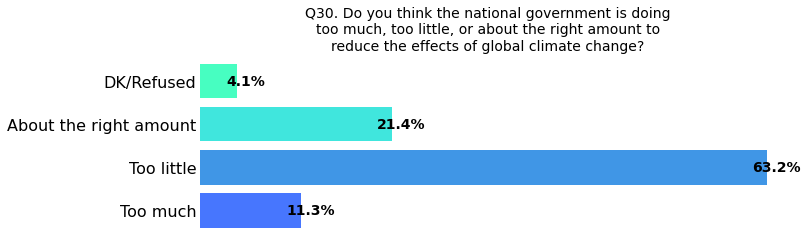

In [347]:
functions.univar_bar(data, 'weight', 'Q30', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_4)

In [348]:
#################
# Q30 transform #
#################

conditions = [(data['Q30'] == 1) | (data['Q30'] == 3), 
              data['Q30'] == 2,
              data['Q30'] == 99]
outputs = [-1, 1, 0]
data['q30_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q30_rec'] = wording_dict['Q30']

# update labels dict with categories and labels
response_dict['q30_rec'] = {
    -1: "Too much/About the right amount",
    0: "DK/Ref",
    1: "Too little"
}

In [349]:
functions.univar_table(data, 'weight', 'q30_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q30_rec                                                           
-1       Too much/About the right amount   491  32.7   30.3   35.1
 0                                DK/Ref    62   4.1    3.1    5.1
 1                            Too little   949  63.2   60.7   65.6

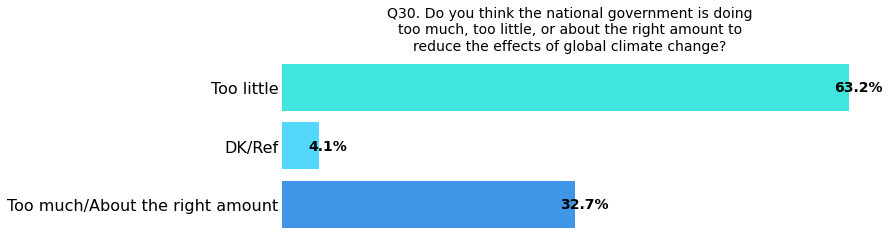

In [350]:
functions.univar_bar(data, 'weight', 'q30_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

# Q31

In [351]:
wording_dict['Q31']

'Q31. Do you think global climate change is affecting [IN US: your local community/ELSE: The area where you live] a great deal, some, not too much or not at all?'

In [352]:
response_dict['Q31']

{1.0: 'A great deal',
 2.0: 'Some',
 3.0: 'Not too much',
 4.0: 'Not at all',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [353]:
functions.univar_table(data, 'weight', 'Q31', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q31                                         
1.0   A great deal   359  23.9   21.7   26.0
2.0           Some   524  34.9   32.5   37.3
3.0   Not too much   256  17.0   15.1   18.9
4.0     Not at all   349  23.2   21.1   25.4
99.0    DK/Refused    15   1.0    0.5    1.5

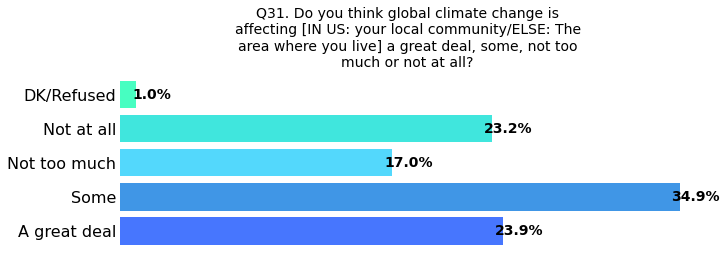

In [354]:
functions.univar_bar(data, 'weight', 'Q31', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [355]:
#################
# Q31 transform #
#################

conditions = [data['Q31'] == 1, 
              data['Q31'] == 2,
              data['Q31'] == 3,
              data['Q31'] == 4,
              data['Q31'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q31_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q31_rec'] = wording_dict['Q31']

# update labels dict with categories and labels
response_dict['q31_rec'] = {
    -1: "Not at all",
    -0.5: "Not too much",
    0: "DK/Ref",
    0.5: "Some",
    1: "A great deal"
}

In [356]:
functions.univar_table(data, 'weight', 'q31_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q31_rec                                        
-1.0       Not at all   349  23.2   21.1   25.4
-0.5     Not too much   256  17.0   15.1   18.9
 0.0           DK/Ref    15   1.0    0.5    1.5
 0.5             Some   524  34.9   32.5   37.3
 1.0     A great deal   359  23.9   21.7   26.0

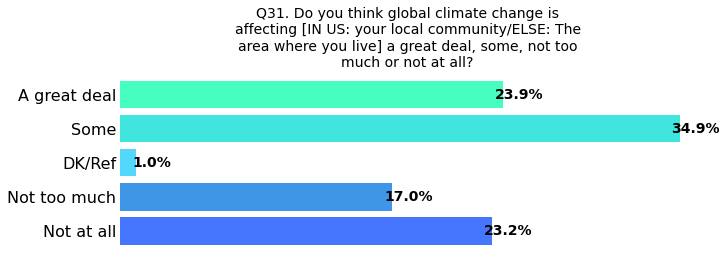

In [357]:
functions.univar_bar(data, 'weight', 'q31_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q32

In [358]:
wording_dict['Q32']

'Q32. How important is religion in your life — very important, somewhat important, not too important or not at all important?'

In [359]:
response_dict['Q32']

{1.0: 'Very important',
 2.0: 'Somewhat important',
 3.0: 'Not too important',
 4.0: 'Not at all important',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [360]:
functions.univar_table(data, 'weight', 'Q32', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q32                                                 
1.0         Very important   719  47.8   45.3   50.4
2.0     Somewhat important   361  24.0   21.9   26.2
3.0      Not too important   168  11.2    9.6   12.8
4.0   Not at all important   240  16.0   14.1   17.8
99.0            DK/Refused    14   0.9    0.5    1.4

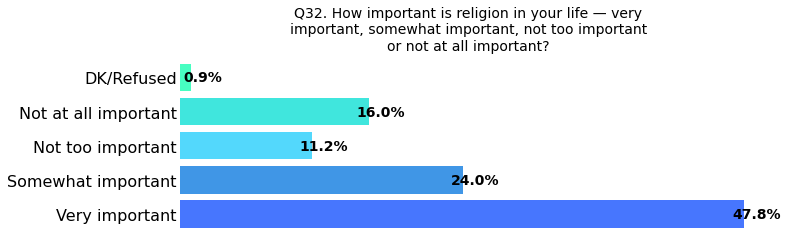

In [361]:
functions.univar_bar(data, 'weight', 'Q32', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [362]:
#################
# Q32 transform #
#################

conditions = [data['Q32'] == 1, 
              data['Q32'] == 2,
              data['Q32'] == 3,
              data['Q32'] == 4,
              data['Q32'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q32_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q32_rec'] = wording_dict['Q32']

# update labels dict with categories and labels
response_dict['q32_rec'] = {
    -1: "Not at all important",
    -0.5: "Not too important",
    0: "DK/Ref",
    0.5: "Somewhat important",
    1: "Very important"
}

In [363]:
functions.univar_table(data, 'weight', 'q32_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q32_rec                                                
-1.0     Not at all important   240  16.0   14.1   17.8
-0.5        Not too important   168  11.2    9.6   12.8
 0.0                   DK/Ref    14   0.9    0.5    1.4
 0.5       Somewhat important   361  24.0   21.9   26.2
 1.0           Very important   719  47.8   45.3   50.4

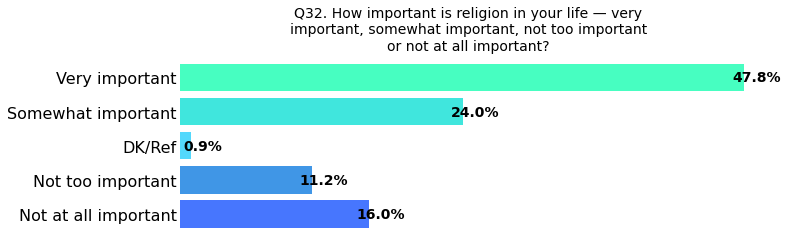

In [364]:
functions.univar_bar(data, 'weight', 'q32_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q33

In [365]:
wording_dict['Q33']

'Q33. In your opinion, do you think there is generally a conflict between science and religion, or not?'

In [366]:
response_dict['Q33']

{1.0: 'Yes, there is generally a conflict between science and religion',
 2.0: 'No, there is NOT a conflict between science and religion',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [367]:
functions.univar_table(data, 'weight', 'Q33', response_dict)

Labels  Freq  \
Q33                                                                           
1.0   Yes, there is generally a conflict between science and religion   847   
2.0          No, there is NOT a conflict between science and religion   626   
99.0                                                       DK/Refused    29   

      Prop  CI_lo  CI_up  
Q33                       
1.0   56.4   53.9   58.9  
2.0   41.7   39.2   44.2  
99.0   1.9    1.2    2.6

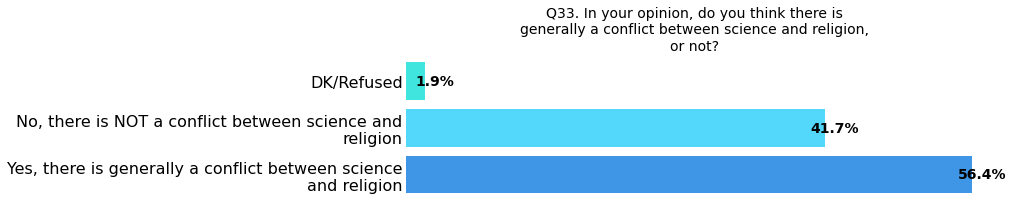

In [368]:
functions.univar_bar(data, 'weight', 'Q33', response_dict, wording_dict, figh = 2, nudge_dlab=1, color = colors_3)

In [369]:
#################
# Q33 transform #
#################

conditions = [data['Q33'] == 1, 
              data['Q33'] == 2,
              data['Q33'] == 99]
outputs = [1, -1, 0]
data['q33_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q33_rec'] = wording_dict['Q33']

# update labels dict with categories and labels
response_dict['q33_rec'] = {
    -1: "No, there is NOT a conflict between science and religion",
    0: "DK/Ref",
    1: "Yes, there is generally a conflict between science and religion"
}

In [370]:
functions.univar_table(data, 'weight', 'q33_rec', response_dict)

Labels  \
q33_rec                                                                    
-1              No, there is NOT a conflict between science and religion   
 0                                                                DK/Ref   
 1       Yes, there is generally a conflict between science and religion   

         Freq  Prop  CI_lo  CI_up  
q33_rec                            
-1        626  41.7   39.2   44.2  
 0         29   1.9    1.2    2.6  
 1        847  56.4   53.9   58.9

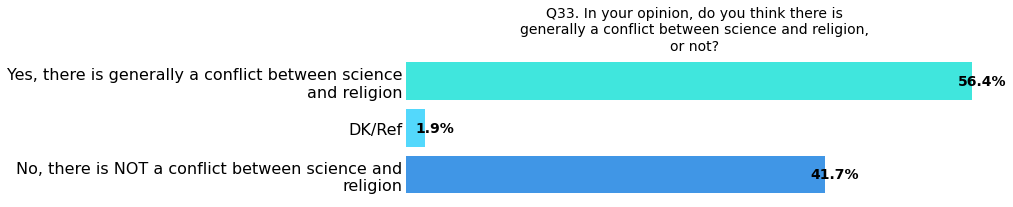

In [371]:
functions.univar_bar(data, 'weight', 'q33_rec', response_dict, wording_dict, figh = 2, nudge_dlab=1, color = colors_3)

# Q34

In [372]:
wording_dict['Q34']

'Q34. Thinking about your own beliefs, how often would you say your religious beliefs conflict with science — often, sometimes, rarely or never?'

In [373]:
response_dict['Q34']

{1.0: 'Often',
 2.0: 'Sometimes',
 3.0: 'Rarely',
 4.0: 'Never',
 97.0: 'Have no religious beliefs (DO NOT READ)',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [374]:
functions.univar_table(data, 'weight', 'Q34', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q34                                                                    
1.0                                     Often   200  13.3   11.6   15.0
2.0                                 Sometimes   359  23.9   21.8   26.1
3.0                                    Rarely   348  23.2   21.1   25.3
4.0                                     Never   555  36.9   34.5   39.4
97.0  Have no religious beliefs (DO NOT READ)    23   1.5    0.9    2.1
99.0                               DK/Refused    17   1.1    0.6    1.7

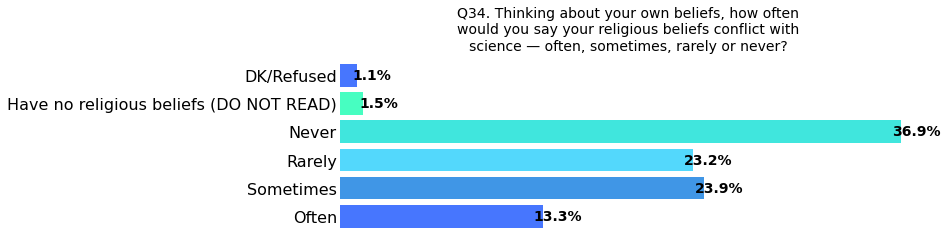

In [375]:
functions.univar_bar(data, 'weight', 'Q34', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [376]:
#################
# Q34 transform #
#################

conditions = [data['Q34'] == 1, 
              data['Q34'] == 2,
              data['Q34'] == 3,
              (data['Q34'] == 4) | (data['Q34'] == 97),
              data['Q34'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q34_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q34_rec'] = wording_dict['Q34']

# update labels dict with categories and labels
response_dict['q34_rec'] = {
    -1: "Never/No religious beliefs",
    -0.5: "Rarely",
    0: "DK/Ref",
    0.5: "Sometimes",
    1: "Often"
}

In [377]:
functions.univar_table(data, 'weight', 'q34_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q34_rec                                                      
-1.0     Never/No religious beliefs   577  38.4   36.0   40.9
-0.5                         Rarely   348  23.2   21.1   25.3
 0.0                         DK/Ref    17   1.1    0.6    1.7
 0.5                      Sometimes   359  23.9   21.8   26.1
 1.0                          Often   200  13.3   11.6   15.0

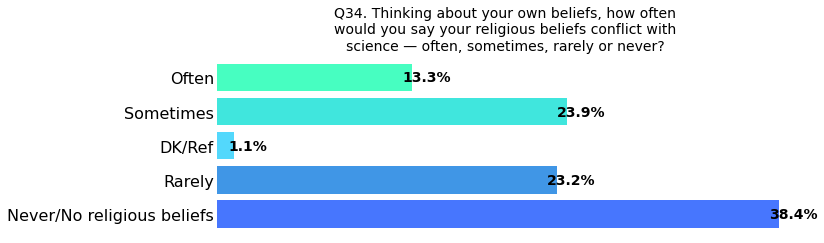

In [378]:
functions.univar_bar(data, 'weight', 'q34_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q36

In [379]:
wording_dict['Q36']

'Q36. Thinking about evolution, which comes closer to your view?'

In [380]:
response_dict['Q36']

{1.0: 'Humans and other living things have evolved over time',
 2.0: 'Humans and other living things have existed in their present form since the beginning of time',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [381]:
functions.univar_table(data, 'weight', 'Q36', response_dict)

Labels  \
Q36                                                                                                   
1.0                                           Humans and other living things have evolved over time   
2.0   Humans and other living things have existed in their present form since the beginning of time   
99.0                                                                                     DK/Refused   

      Freq  Prop  CI_lo  CI_up  
Q36                             
1.0    963  64.1   61.7   66.5  
2.0    474  31.5   29.2   33.9  
99.0    66   4.4    3.3    5.4

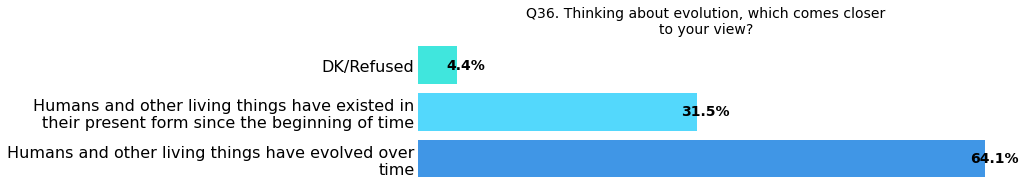

In [382]:
functions.univar_bar(data, 'weight', 'Q36', response_dict, wording_dict, figh = 2, nudge_dlab=1, color = colors_3)

In [383]:
#################
# Q36 transform #
#################

conditions = [data['Q36'] == 1, 
              data['Q36'] == 2,
              data['Q36'] == 99]
outputs = [1, -1, 0]
data['q36_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q36_rec'] = wording_dict['Q36']

# update labels dict with categories and labels
response_dict['q36_rec'] = {
    -1: "Humans and other living things have existed in their present form since the beginning of time",
    0: "DK/Ref",
    1: "Humans and other living things have evolved over time"
}

In [384]:
functions.univar_table(data, 'weight', 'q36_rec', response_dict)

Labels  \
q36_rec                                                                                                  
-1       Humans and other living things have existed in their present form since the beginning of time   
 0                                                                                              DK/Ref   
 1                                               Humans and other living things have evolved over time   

         Freq  Prop  CI_lo  CI_up  
q36_rec                            
-1        474  31.5   29.2   33.9  
 0         66   4.4    3.3    5.4  
 1        963  64.1   61.7   66.5

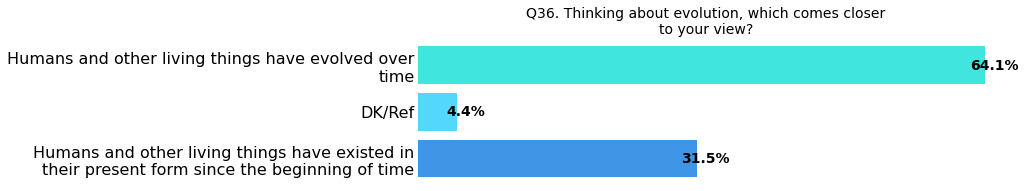

In [385]:
functions.univar_bar(data, 'weight', 'q36_rec', response_dict, wording_dict, figh = 2, nudge_dlab=1, color = colors_3)

# Q37

In [386]:
wording_dict['Q37']

'Q37. In your opinion, can scientific explanations and religious explanations for the origins of life on Earth be compatible, or do you not think so?'

In [387]:
response_dict['Q37']

{1.0: 'Yes, scientific and religious explanations can be compatible',
 2.0: 'No, scientific and religious explanations cannot be compatible',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [388]:
functions.univar_table(data, 'weight', 'Q37', response_dict)

Labels  Freq  \
Q37                                                                          
1.0     Yes, scientific and religious explanations can be compatible   815   
2.0   No, scientific and religious explanations cannot be compatible   635   
99.0                                                      DK/Refused    51   

      Prop  CI_lo  CI_up  
Q37                       
1.0   54.3   51.8   56.8  
2.0   42.3   39.8   44.8  
99.0   3.4    2.5    4.3

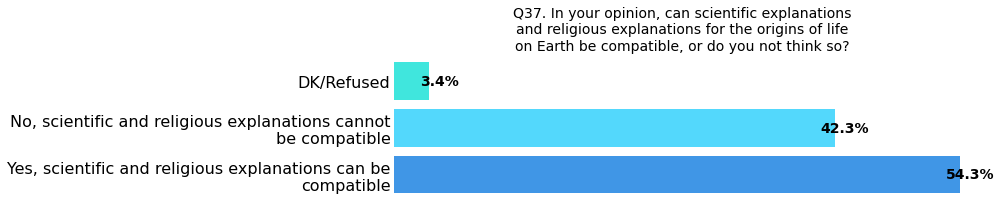

In [389]:
functions.univar_bar(data, 'weight', 'Q37', response_dict, wording_dict, figh = 2, nudge_dlab=1, color = colors_3)

In [390]:
#################
# Q37 transform #
#################

conditions = [data['Q37'] == 1, 
              data['Q37'] == 2,
              data['Q37'] == 99]
outputs = [1, -1, 0]
data['q37_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q37_rec'] = wording_dict['Q37']

# update labels dict with categories and labels
response_dict['q37_rec'] = {
    -1: "No, scientific and religious explanations cannot be compatible",
    0: "DK/Ref",
    1: "Yes, scientific and religious explanations can be compatible"
}

In [391]:
functions.univar_table(data, 'weight', 'q37_rec', response_dict)

Labels  Freq  \
q37_rec                                                                         
-1       No, scientific and religious explanations cannot be compatible   635   
 0                                                               DK/Ref    51   
 1         Yes, scientific and religious explanations can be compatible   815   

         Prop  CI_lo  CI_up  
q37_rec                      
-1       42.3   39.8   44.8  
 0        3.4    2.5    4.3  
 1       54.3   51.8   56.8

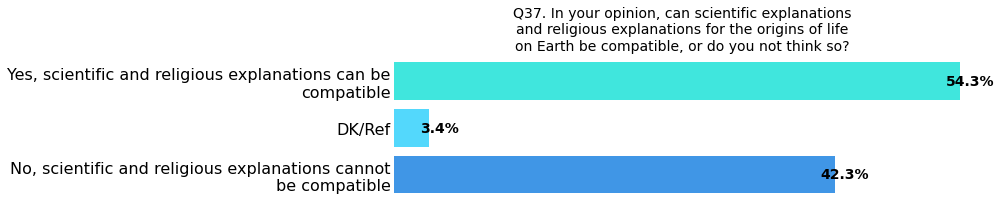

In [392]:
functions.univar_bar(data, 'weight', 'q37_rec', response_dict, wording_dict, figh = 2, nudge_dlab=1, color = colors_3)

# Q39

In [393]:
wording_dict['Q39']

'Q39. How often do you see, hear or read something in the news about science — often, sometimes, rarely or never?'

In [394]:
response_dict['Q39']

{1.0: 'Often',
 2.0: 'Sometimes',
 3.0: 'Rarely',
 4.0: 'Never',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [395]:
functions.univar_table(data, 'weight', 'Q39', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q39                                       
1.0        Often   781  52.0   49.5   54.5
2.0    Sometimes   453  30.2   27.8   32.5
3.0       Rarely   176  11.7   10.1   13.4
4.0        Never    84   5.6    4.4    6.8
99.0  DK/Refused     7   0.5    0.1    0.8

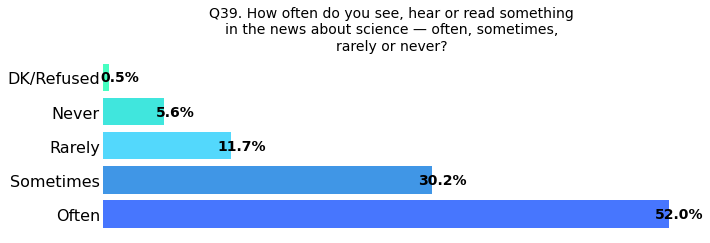

In [396]:
functions.univar_bar(data, 'weight', 'Q39', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [397]:
#################
# Q39 transform #
#################

conditions = [data['Q39'] == 1, 
              data['Q39'] == 2,
              data['Q39'] == 3,
              data['Q39'] == 4,
              data['Q39'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q39_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q39_rec'] = wording_dict['Q39']

# update labels dict with categories and labels
response_dict['q39_rec'] = {
    -1: "Never",
    -0.5: "Rarely",
    0: "DK/Ref",
    0.5: "Sometimes",
    1: "Often"
}

In [398]:
functions.univar_table(data, 'weight', 'q39_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q39_rec                                     
-1.0         Never    84   5.6    4.4    6.8
-0.5        Rarely   176  11.7   10.1   13.4
 0.0        DK/Ref     7   0.5    0.1    0.8
 0.5     Sometimes   453  30.2   27.8   32.5
 1.0         Often   781  52.0   49.5   54.5

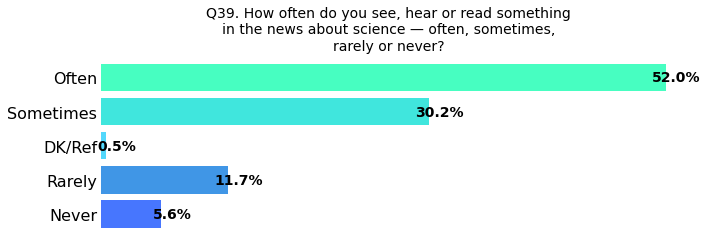

In [399]:
functions.univar_bar(data, 'weight', 'q39_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q40

In [400]:
wording_dict['Q40']

'Q40. Overall, how would you rate the job news media do in covering science?'

In [401]:
response_dict['Q40']

{1.0: 'Very good job',
 2.0: 'Somewhat good job',
 3.0: 'Somewhat bad job',
 4.0: 'Very bad job',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [402]:
functions.univar_table(data, 'weight', 'Q40', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q40                                              
1.0       Very good job   120   8.0    6.6    9.4
2.0   Somewhat good job   662  44.1   41.6   46.6
3.0    Somewhat bad job   382  25.5   23.3   27.7
4.0        Very bad job   292  19.4   17.4   21.4
99.0         DK/Refused    46   3.1    2.2    3.9

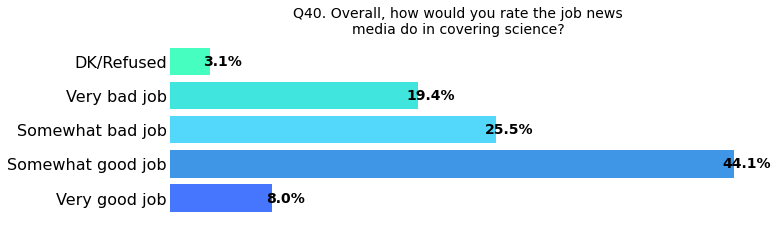

In [403]:
functions.univar_bar(data, 'weight', 'Q40', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

In [404]:
#################
# Q40 transform #
#################

conditions = [data['Q40'] == 1, 
              data['Q40'] == 2,
              data['Q40'] == 3,
              data['Q40'] == 4,
              data['Q40'] == 99]
outputs = [1, 0.5, -0.5, -1, 0]
data['q40_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q40_rec'] = wording_dict['Q40']

# update labels dict with categories and labels
response_dict['q40_rec'] = {
    -1: "Very bad job",
    -0.5: "Somewhat bad job",
    0: "DK/Ref",
    0.5: "Somewhat good job",
    1: "Very good job"
}

In [405]:
functions.univar_table(data, 'weight', 'q40_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q40_rec                                             
-1.0          Very bad job   292  19.4   17.4   21.4
-0.5      Somewhat bad job   382  25.5   23.3   27.7
 0.0                DK/Ref    46   3.1    2.2    3.9
 0.5     Somewhat good job   662  44.1   41.6   46.6
 1.0         Very good job   120   8.0    6.6    9.4

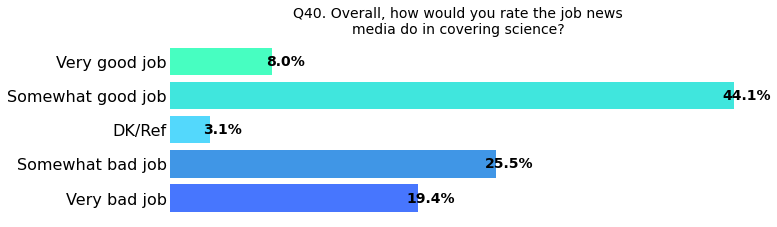

In [406]:
functions.univar_bar(data, 'weight', 'q40_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_5)

# Q41a

In [407]:
wording_dict['Q41a']

"Q41a. Thinking about news reports of scientific research findings, do you think the following is a problem or is it not a problem? a. the public doesn't know enough about science to really understand research findings covered in the news"

In [408]:
response_dict['Q41a']

{1.0: 'Yes, this is a problem',
 2.0: 'No, this is not a problem',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [409]:
functions.univar_table(data, 'weight', 'Q41a', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q41a                                                     
1.0      Yes, this is a problem  1152  76.7   74.6   78.8
2.0   No, this is not a problem   318  21.2   19.1   23.3
99.0                 DK/Refused    32   2.1    1.4    2.8

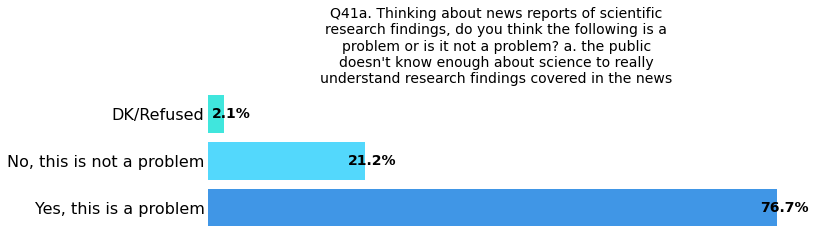

In [410]:
functions.univar_bar(data, 'weight', 'Q41a', response_dict, wording_dict, figh = 2, nudge_dlab=1, color = colors_3)

In [411]:
##################
# Q41a transform #
##################

conditions = [data['Q41a'] == 1, 
              data['Q41a'] == 2,
              data['Q41a'] == 99]
outputs = [1, -1, 0]
data['q41a_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q41a_rec'] = wording_dict['Q41a']

# update labels dict with categories and labels
response_dict['q41a_rec'] = {
    -1: "No, this is not a problem",
    0: "DK/Ref",
    1: "Yes, this is a problem"
}

In [412]:
functions.univar_table(data, 'weight', 'q41a_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q41a_rec                                                     
-1        No, this is not a problem   318  21.2   19.1   23.3
 0                           DK/Ref    32   2.1    1.4    2.8
 1           Yes, this is a problem  1152  76.7   74.6   78.8

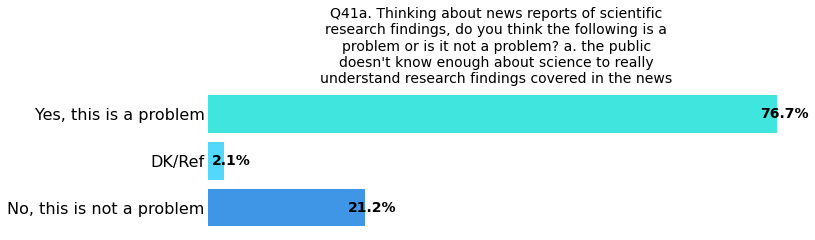

In [413]:
functions.univar_bar(data, 'weight', 'q41a_rec', response_dict, wording_dict, figh = 2, nudge_dlab=1, color = colors_3)

# Q41b

In [414]:
wording_dict['Q41b']

'Q41b. Thinking about news reports of scientific research findings, do you think the following is a problem or is it not a problem? b. the news media oversimplify scientific research findings'

In [415]:
response_dict['Q41b']

{1.0: 'Yes, this is a problem',
 2.0: 'No, this is not a problem',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [416]:
functions.univar_table(data, 'weight', 'Q41b', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q41b                                                     
1.0      Yes, this is a problem   893  59.4   57.0   61.9
2.0   No, this is not a problem   557  37.1   34.6   39.5
99.0                 DK/Refused    53   3.5    2.6    4.4

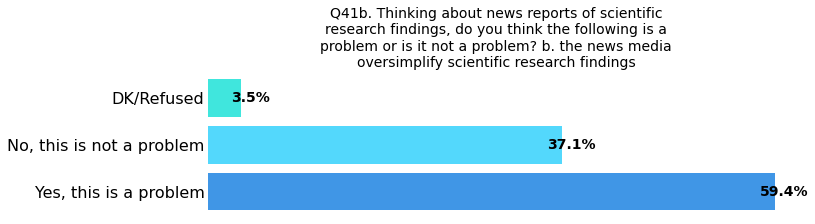

In [417]:
functions.univar_bar(data, 'weight', 'Q41b', response_dict, wording_dict, figh = 2, nudge_dlab=1, color = colors_3)

In [418]:
##################
# Q41b transform #
##################

conditions = [data['Q41b'] == 1, 
              data['Q41b'] == 2,
              data['Q41b'] == 99]
outputs = [1, -1, 0]
data['q41b_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q41b_rec'] = wording_dict['Q41b']

# update labels dict with categories and labels
response_dict['q41b_rec'] = {
    -1: "No, this is not a problem",
    0: "DK/Ref",
    1: "Yes, this is a problem"
}

In [419]:
functions.univar_table(data, 'weight', 'q41b_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q41b_rec                                                     
-1        No, this is not a problem   557  37.1   34.6   39.5
 0                           DK/Ref    53   3.5    2.6    4.4
 1           Yes, this is a problem   893  59.4   57.0   61.9

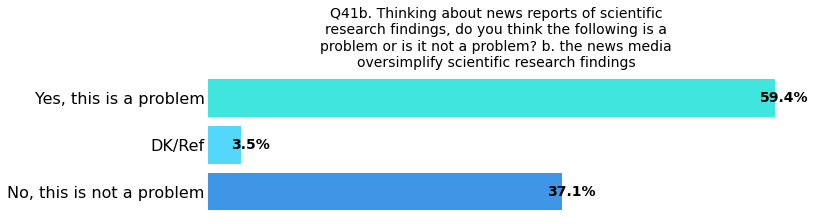

In [420]:
functions.univar_bar(data, 'weight', 'q41b_rec', response_dict, wording_dict, figh = 2, nudge_dlab=1, color = colors_3)

# Q41c

In [421]:
wording_dict['Q41c']

'Q41c. Thinking about news reports of scientific research findings, do you think the following is a problem or is it not a problem? c. science researchers overstate the implications of their research findings'

In [422]:
response_dict['Q41c']

{1.0: 'Yes, this is a problem',
 2.0: 'No, this is not a problem',
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [423]:
functions.univar_table(data, 'weight', 'Q41c', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
Q41c                                                     
1.0      Yes, this is a problem   740  49.3   46.7   51.8
2.0   No, this is not a problem   695  46.3   43.7   48.8
99.0                 DK/Refused    67   4.5    3.4    5.5

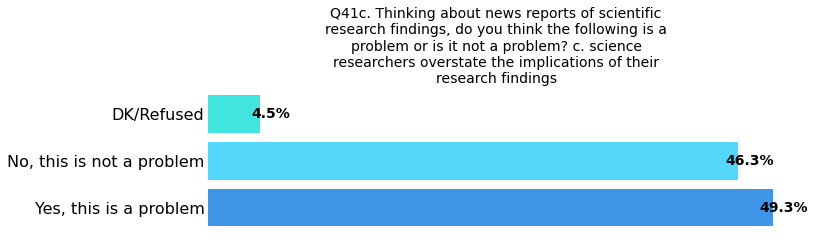

In [424]:
functions.univar_bar(data, 'weight', 'Q41c', response_dict, wording_dict, figh = 2, nudge_dlab=1, color = colors_3)

In [425]:
##################
# Q41c transform #
##################

conditions = [data['Q41c'] == 1, 
              data['Q41c'] == 2,
              data['Q41c'] == 99]
outputs = [1, -1, 0]
data['q41c_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q41c_rec'] = wording_dict['Q41c']

# update labels dict with categories and labels
response_dict['q41c_rec'] = {
    -1: "No, this is not a problem",
    0: "DK/Ref",
    1: "Yes, this is a problem"
}

In [426]:
functions.univar_table(data, 'weight', 'q41c_rec', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
q41c_rec                                                     
-1        No, this is not a problem   695  46.3   43.7   48.8
 0                           DK/Ref    67   4.5    3.4    5.5
 1           Yes, this is a problem   740  49.3   46.7   51.8

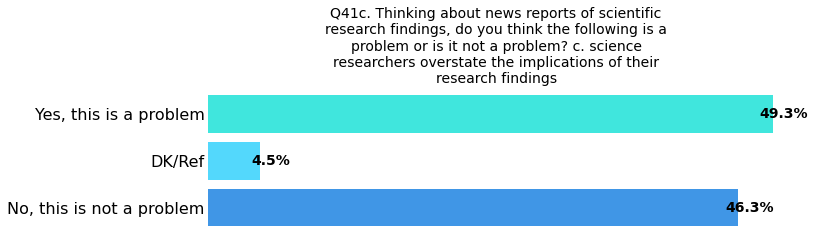

In [427]:
functions.univar_bar(data, 'weight', 'q41c_rec', response_dict, wording_dict, figh = 2, nudge_dlab=1, color = colors_3)

# Q42

In [428]:
wording_dict['Q42']

'Q42. Which of these statements comes closer to your view, even if neither is exactly right?'

In [429]:
response_dict['Q42']

{1.0: 'As (nationality group), we can always find ways to solve our problems and get what we want',
 2.0: "(survey public) can't solve many of its important problems",
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [430]:
functions.univar_table(data, 'weight', 'Q42', response_dict)

Labels  \
Q42                                                                                                
1.0   As (nationality group), we can always find ways to solve our problems and get what we want   
2.0                                   (survey public) can't solve many of its important problems   
99.0                                                                                  DK/Refused   

      Freq  Prop  CI_lo  CI_up  
Q42                             
1.0    975  64.9   62.5   67.3  
2.0    486  32.3   30.0   34.7  
99.0    41   2.7    1.9    3.6

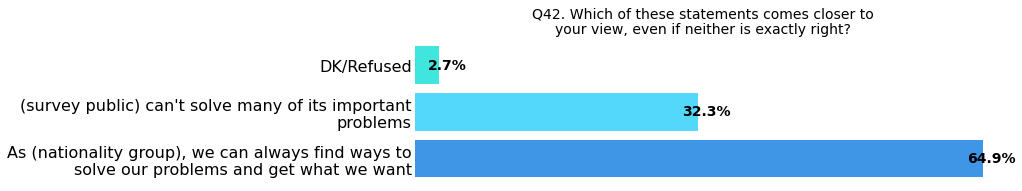

In [431]:
functions.univar_bar(data, 'weight', 'Q42', response_dict, wording_dict, figh = 2, nudge_dlab=1, color = colors_3)

In [432]:
#################
# Q42 transform #
#################

conditions = [data['Q42'] == 1, 
              data['Q42'] == 2,
              data['Q42'] == 99]
outputs = [1, -1, 0]
data['q42_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q42_rec'] = wording_dict['Q42']

# update labels dict with categories and labels
response_dict['q42_rec'] = {
    -1: "(survey public) can't solve many of its important problems",
    0: "DK/Ref",
    1: "As (nationality group), we can always find ways to solve our problems and get what we want"
}

In [433]:
functions.univar_table(data, 'weight', 'q42_rec', response_dict)

Labels  \
q42_rec                                                                                               
-1                                       (survey public) can't solve many of its important problems   
 0                                                                                           DK/Ref   
 1       As (nationality group), we can always find ways to solve our problems and get what we want   

         Freq  Prop  CI_lo  CI_up  
q42_rec                            
-1        486  32.3   30.0   34.7  
 0         41   2.7    1.9    3.6  
 1        975  64.9   62.5   67.3

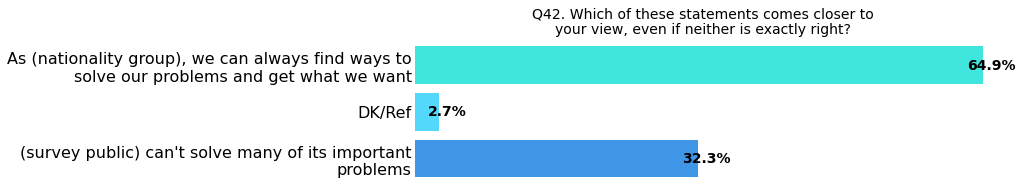

In [434]:
functions.univar_bar(data, 'weight', 'q42_rec', response_dict, wording_dict, figh = 2, nudge_dlab=1, color = colors_3)

# Q43

In [435]:
wording_dict['Q43']

"Q43. Which of these do you think is the better way to solve (survey public's) most pressing problems, even if neither is exactly right?"

In [436]:
response_dict['Q43']

{1.0: "Rely more on people who are considered experts about the problems, even if they don't have much practical experience",
 2.0: "Rely more on people with practical experience with the problems, even if they aren't considered experts",
 98.0: "Don't know (DO NOT READ)",
 99.0: 'DK/Refused'}

In [437]:
functions.univar_table(data, 'weight', 'Q43', response_dict)

Labels  \
Q43                                                                                                                          
1.0   Rely more on people who are considered experts about the problems, even if they don't have much practical experience   
2.0                Rely more on people with practical experience with the problems, even if they aren't considered experts   
99.0                                                                                                            DK/Refused   

      Freq  Prop  CI_lo  CI_up  
Q43                             
1.0    418  27.9   25.6   30.1  
2.0    996  66.3   63.9   68.7  
99.0    88   5.8    4.6    7.0

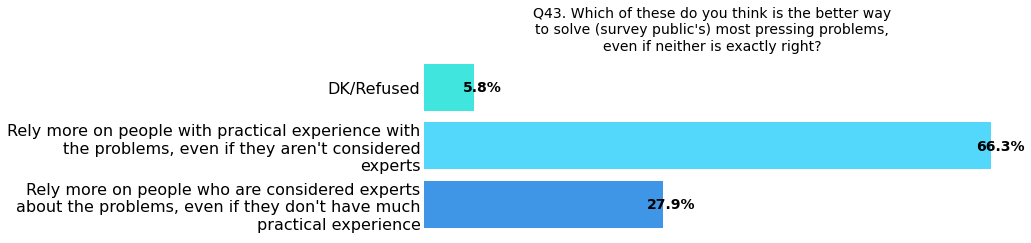

In [438]:
functions.univar_bar(data, 'weight', 'Q43', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

In [439]:
#################
# Q43 transform #
#################

conditions = [data['Q43'] == 1, 
              data['Q43'] == 2,
              data['Q43'] == 99]
outputs = [1, -1, 0]
data['q43_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['q43_rec'] = wording_dict['Q43']

# update labels dict with categories and labels
response_dict['q43_rec'] = {
    -1: "Rely more on people with practical experience with the problems, even if they aren't considered experts",
    0: "DK/Ref",
    1: "Rely more on people who are considered experts about the problems, even if they don't have much practical experience"
}

In [440]:
functions.univar_table(data, 'weight', 'q43_rec', response_dict)

Labels  \
q43_rec                                                                                                                         
-1                    Rely more on people with practical experience with the problems, even if they aren't considered experts   
 0                                                                                                                     DK/Ref   
 1       Rely more on people who are considered experts about the problems, even if they don't have much practical experience   

         Freq  Prop  CI_lo  CI_up  
q43_rec                            
-1        996  66.3   63.9   68.7  
 0         88   5.8    4.6    7.0  
 1        418  27.9   25.6   30.1

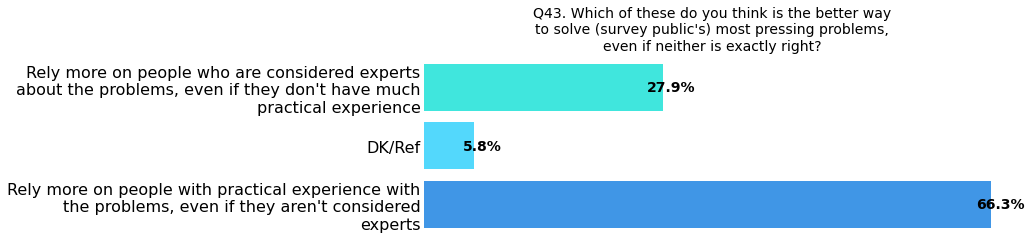

In [441]:
functions.univar_bar(data, 'weight', 'q43_rec', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_3)

# GEN

In [442]:
display(wording_dict['GEN'])
display(response_dict['GEN'])
functions.univar_table(data, 'weight', 'GEN', response_dict)

'GEN. Gender [RECORD BY OBSERVATION]'

{1.0: 'Male', 2.0: 'Female'}

Labels  Freq  Prop  CI_lo  CI_up
GEN                                  
1.0    Male   749  49.9   47.4   52.4
2.0  Female   753  50.1   47.6   52.6

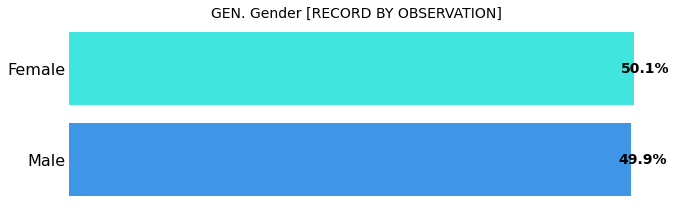

In [443]:
functions.univar_bar(data, 'weight', 'GEN', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_2)

In [444]:
#################
# GEN transform #
#################

data['is_female'] = np.where(data['GEN'] == 2, 1, 0)

# update meta dict with question wording
wording_dict['is_female'] = wording_dict['GEN']

# update labels dict with categories and labels
response_dict['is_female'] = {
    0: "Male",
    1: "Female"
}

In [445]:
functions.univar_table(data, 'weight', 'is_female', response_dict)

Labels  Freq  Prop  CI_lo  CI_up
is_female                                  
0            Male   749  49.9   47.4   52.4
1          Female   753  50.1   47.6   52.6

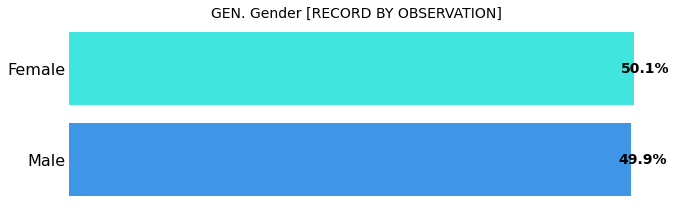

In [446]:
functions.univar_bar(data, 'weight', 'is_female', response_dict, wording_dict, figh = 2.5, nudge_dlab=1, color = colors_2)

# Age

In [447]:
display(wording_dict['AGE'])
display(response_dict['AGE'])

'AGE. How old are you?'

{97.0: '97 or older', 98.0: "Don't know (DO NOT READ)", 99.0: 'DK/Refused'}

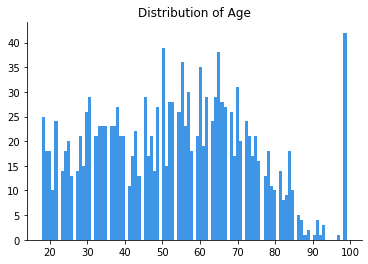

In [448]:
data['AGE'].hist(bins = 99, grid = False, color = colors_2[0])
plt.title("Distribution of Age")
sns.despine();

In [449]:
#################
# AGE transform #
#################

data['age_rec'] = np.where(data['AGE'] > 97, data['AGE'].mean(), data['AGE'])
zscore = lambda x: (x - x.mean()) / x.std()
data['age_rec'] = data['age_rec'].transform(zscore)

# update meta dict with question wording
wording_dict['age_rec'] = wording_dict['AGE']

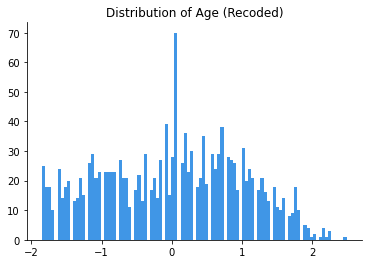

In [450]:
data['age_rec'].hist(bins = 99, grid = False, color = colors_2[0])
plt.title("Distribution of Age (Recoded)")
sns.despine();

# Education

In [451]:
display(wording_dict['eduusa'])
display(response_dict['eduusa'])

'EDUUSA. What is the highest level of school you have completed or the highest degree you have received?\xa0'

{1.0: 'Less than high school (Grades 1-8 or no formal schooling)',
 2.0: 'High school incomplete (Grades 9-11 or Grade 12 with NO diploma)',
 3.0: 'High school graduate (Grade 12 with diploma or GED certificate)',
 4.0: 'Some college, no degree (includes some community college)',
 5.0: 'Two year associate degree from a college or university',
 6.0: "Four year college or university degree/Bachelor's degree (e.g., BS, BA, AB)",
 7.0: 'Some postgraduate or professional schooling, no postgraduate degree (e.g. some graduate school)',
 8.0: "Postgraduate or professional degree, including master's, doctorate, medical or law degree (e.g., MA, MS, PhD, MD, JD, gr",
 98.0: "(VOL) Don't know",
 99.0: 'DK/Refused'}

In [507]:
unweighted = data['eduusa'].value_counts(normalize = True).sort_index()

In [508]:
unweighted = round(unweighted, 3)*100

In [509]:
unweighted.name = 'unweighted prop'

In [510]:
table = functions.univar_table(data, 'weight', 'eduusa', response_dict)[['Labels', 'Prop']]

In [511]:
table.join(unweighted)

Labels  \
eduusa                                                                                                                             
1.0                                                                    Less than high school (Grades 1-8 or no formal schooling)   
2.0                                                             High school incomplete (Grades 9-11 or Grade 12 with NO diploma)   
3.0                                                              High school graduate (Grade 12 with diploma or GED certificate)   
4.0                                                                    Some college, no degree (includes some community college)   
5.0                                                                       Two year associate degree from a college or university   
6.0                                                  Four year college or university degree/Bachelor's degree (e.g., BS, BA, AB)   
7.0                              Some postgraduate or professional schooling, no postgraduate degree (e.g. some graduate school)   
8.0     Postgraduate or professional degree, including master's, doctorate, medical or law degree (e.g., MA, MS, PhD, MD, JD, gr   
99.0                                                                                                                  DK/Refused   

        Prop  unweighted prop  
eduusa                         
1.0      3.8              2.3  
2.0      4.8              3.3  
3.0     29.6             18.6  
4.0     17.6             15.4  
5.0     13.2             11.9  
6.0     16.8             25.6  
7.0      1.3              2.1  
8.0     12.6             20.3  
99.0     0.4              0.6

In [495]:
table.index

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 99.0], dtype='float64', name='eduusa')

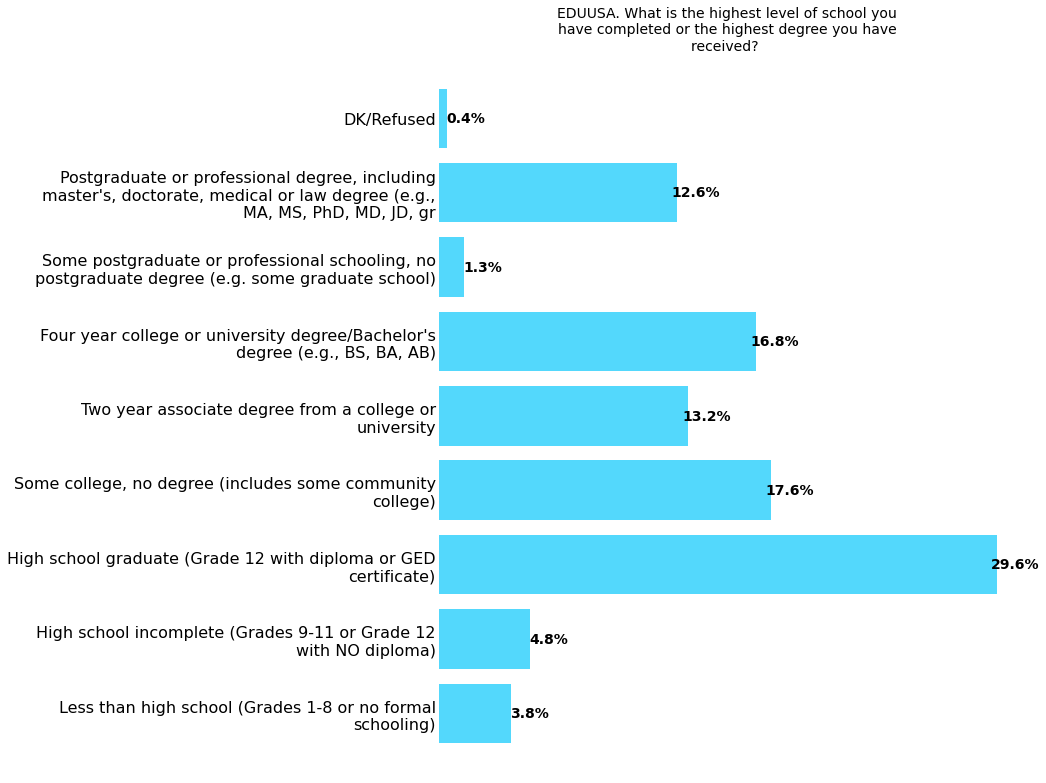

In [452]:
functions.univar_bar(data, 'weight', 'eduusa', response_dict, wording_dict, figh = 10, nudge_dlab=1)

In [453]:
#################
# EDUC transform #
#################

data['educ_rec'] = np.where(data['eduusa'] > 8, data['eduusa'].mode(), data['eduusa'])
zscore = lambda x: (x - x.mean()) / x.std()
data['educ_rec'] = data['educ_rec'].transform(zscore)

# update meta dict with question wording
wording_dict['educ_rec'] = wording_dict['eduusa']

# update labels dict with categories and labels
response_dict['educ_rec'] = dict(zip(data['educ_rec'].value_counts().sort_index().index, list(response_dict['eduusa'].values())[:-2]))

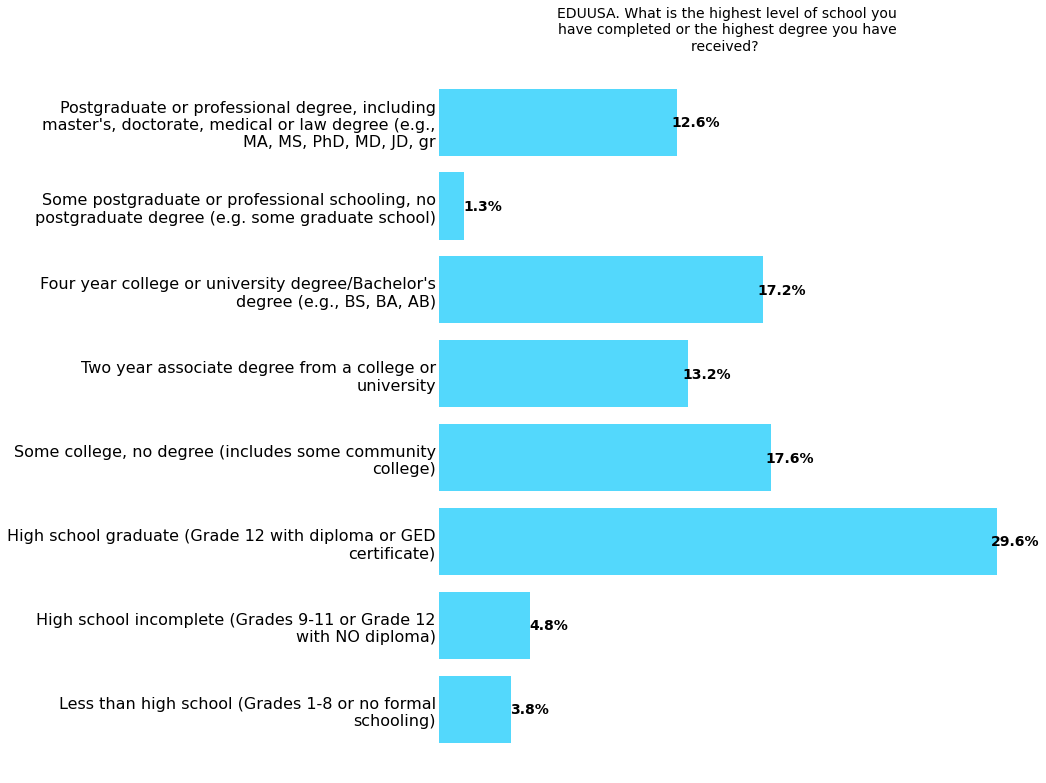

In [454]:
functions.univar_bar(data, 'weight', 'educ_rec', response_dict, wording_dict, figh = 10, nudge_dlab=1)

# Ideology

In [455]:
display(wording_dict['idous'])
display(response_dict['idous'])

'IDOUS. In general, would you describe your political views as ... [READ]?'

{1.0: 'Very conservative',
 2.0: 'Conservative',
 3.0: 'Moderate',
 4.0: 'Liberal [OR]',
 5.0: 'Very liberal',
 98.0: "(VOL)\xa0Don't know",
 99.0: 'DK/Refused'}

In [456]:
data['idous'].value_counts().sort_index()

1.0     140
2.0     426
3.0     490
4.0     256
5.0     134
99.0     56
Name: idous, dtype: int64

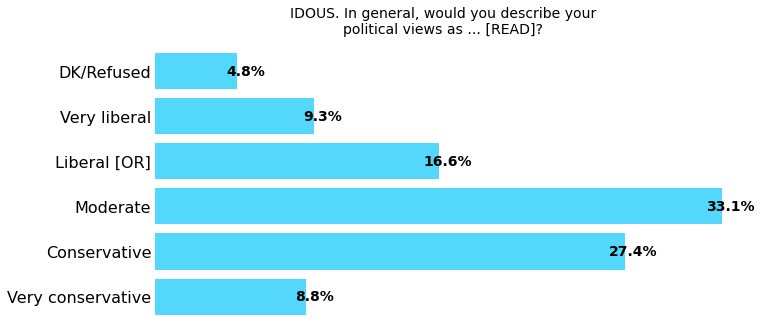

In [457]:
functions.univar_bar(data, 'weight', 'idous', response_dict, wording_dict, figh = 4)

In [458]:
#################
# ideo transform #
#################

conditions = [data['idous'] == 1, 
              data['idous'] == 2,
              data['idous'] == 3,
              data['idous'] == 4,
              data['idous'] == 5,
              data['idous'] == 99]
outputs = [-1, -0.5, 0, 0.5, 1, 0]
data['ideo_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['ideo_rec'] = wording_dict['idous']

# update labels dict with categories and labels
response_dict['ideo_rec'] = dict(zip(data['ideo_rec'].value_counts().sort_index().index, list(response_dict['idous'].values())[:-2]))

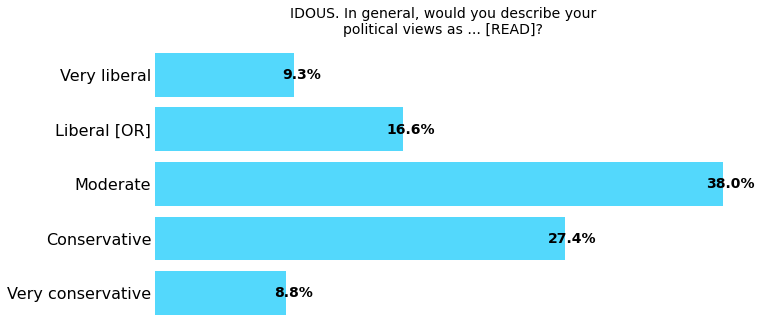

In [459]:
functions.univar_bar(data, 'weight', 'ideo_rec', response_dict, wording_dict, figh = 4)

# SCa & SCc

In [460]:
#################
# sc transform #
#################

conditions = (data['SCa'] == 1) | (data['SCc'] == 1)
data['sc_bin'] = np.where(conditions, 1, 0)

# update meta dict with question wording
wording_dict['sc_bin'] = "Have you ever taken any science courses as part of your (high school/college) education?"

# update labels dict with categories and labels
response_dict['sc_bin'] = {1: 'Yes', 0: 'No/DK'}

# SCb & SCd

In [461]:
#################
# sc_count transform #
#################

conditions = [(data['SCb'] == 1) | (data['SCd'] == 1),
              (data['SCb'] == 2) | (data['SCd'] == 2),
              (data['SCb'] == 3) | (data['SCd'] == 3),
              (data['SCb'] == 4) | (data['SCd'] == 4),
              (data['SCb'] > 96) | (data['SCd'] > 96) | (data['SCb'].isnull()) | (data['SCd'].isnull())]
outputs = [1, 2, 3, 4, 0]
data['sc_count'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['sc_count'] = "How many (high school-level/college-level) science courses have you taken?"

# update labels dict with categories and labels
response_dict['sc_count'] = {key:value for (key,value) in response_dict['SCb'].items() if key < 5}
response_dict['sc_count'][0.0] = '0 courses' 

# is_christian

In [462]:
#################
# is_chr transform #
#################

conditions = (data['currelusa'] == 1) | (data['currelusa'] == 2) | (data['currelusa'] == 3) | (data['currelusa'] == 13) | ((data['currelusa'] == 11) & ((data['currelausa'] == 1) | (data['currelbusa'] == 1))) | ((data['currelusa'] == 99) & ((data['currelausa'] == 1) | (data['currelbusa'] == 1)))

data['is_christian'] = np.where(conditions, 1, 0)

# update meta dict with question wording
wording_dict['is_christian'] = wording_dict['currelausa']

# update labels dict with categories and labels
response_dict['is_christian'] = {1: 'Yes', 0: 'No/DK'}

# is_protestant, is_catholic, is_ath_ag

In [463]:
data['is_protestant'] = np.where(data['currelusa'] == 1, 1, 0)
data['is_catholic'] = np.where(data['currelusa'] == 2, 1, 0)
data['is_ath_ag'] = np.where((data['currelusa'] == 9) | (data['currelusa'] == 10), 1, 0)

# update meta dict with question wording
wording_dict['is_protestant'] = "What is your present religion, if any? Protestant"
wording_dict['is_catholic'] = "What is your present religion, if any? Catholic"
wording_dict['is_ath_ag'] = "What is your present religion, if any? Atheist/Agnostic"

# update labels dict with categories and labels
response_dict['is_protestant'] = {1: 'Yes', 0: 'No'}
response_dict['is_catholic'] = {1: 'Yes', 0: 'No'}
response_dict['is_ath_ag'] = {1: 'Yes', 0: 'No'}

# attend services

In [464]:
display(wording_dict['ATTEND'])
display(response_dict['ATTEND'])
display(data['ATTEND'].value_counts().sort_index())

'ATTEND. Aside from weddings and funerals, how often do you attend religious services… more than once a week, once a week, once or twice a month, a few times a year, seldom or never?'

{1.0: 'More than once a week',
 2.0: 'Once a week',
 3.0: 'Once or twice a month',
 4.0: 'A few times a year',
 5.0: 'Seldom',
 6.0: 'Never',
 97.0: 'Muslim (should not have received question)',
 98.0: 'Don’t know (DO NOT READ)',
 99.0: 'DK/Refused'}

1.0     185
2.0     339
3.0     192
4.0     262
5.0     264
6.0     233
99.0     19
Name: ATTEND, dtype: int64

In [465]:
#################
# ATTEND transform #
#################

conditions = [(data['ATTEND'] == 1),
              (data['ATTEND'] == 2),
              (data['ATTEND'] == 3),
              (data['ATTEND'] == 4),
              (data['ATTEND'] == 5),
              (data['ATTEND'] > 5)]
outputs = [5, 4, 3, 2, 1, 0]
data['attend_rec'] = np.select(conditions, outputs)

zscore = lambda x: (x - x.mean()) / x.std()
data['attend_rec'] = data['attend_rec'].transform(zscore)

# update meta dict with question wording
wording_dict['attend_rec'] = "Aside from weddings and funerals, how often do you attend religious services?"

# update labels dict with categories and labels
response_dict['attend_rec'] = dict(zip(data['attend_rec'].value_counts().sort_index().index,
                                       ["Never/DK", "Seldom", "A few times a year", "Once or twice a month", 
                                        "Once a week", "More than once a week"]))


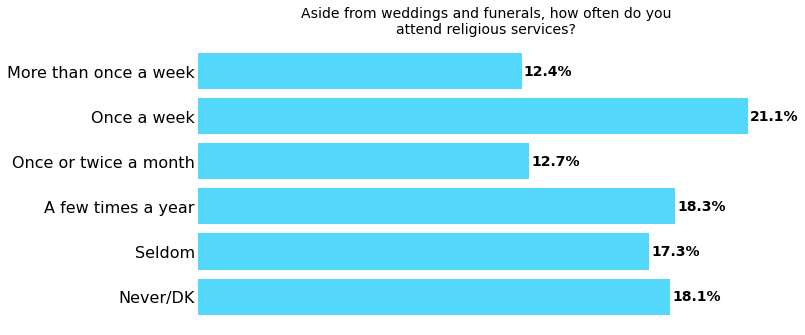

In [466]:
functions.univar_bar(data, 'weight', 'attend_rec', response_dict, wording_dict, figh = 4, nudge_dlab=1)

# pray_rec

In [467]:
display(wording_dict['PRAY'])
display(response_dict['PRAY'])
display(data['PRAY'].value_counts().sort_index())

'PRAY. Aside from religious services, do you pray…? [READ/SHOW CARD]'

{1.0: 'Several times a day',
 2.0: 'Once a day',
 3.0: 'A few times a week',
 4.0: 'Once a week',
 5.0: 'A few times a month',
 6.0: 'Seldom',
 7.0: 'Never',
 97.0: 'Muslim (should not have received question)',
 98.0: 'Don’t know (DO NOT READ)',
 99.0: 'DK/Refused'}

1.0     444
2.0     282
3.0     187
4.0      46
5.0      81
6.0     196
7.0     226
99.0     32
Name: PRAY, dtype: int64

In [468]:
#################
# PRAY transform #
#################

conditions = [(data['PRAY'] == 1),
              (data['PRAY'] == 2),
              (data['PRAY'] == 3),
              (data['PRAY'] == 4),
              (data['PRAY'] == 5),
              (data['PRAY'] == 6),
              (data['PRAY'] > 6)]
outputs = [6, 5, 4, 3, 2, 1, 0]
data['pray_rec'] = np.select(conditions, outputs)

zscore = lambda x: (x - x.mean()) / x.std()
data['pray_rec'] = data['pray_rec'].transform(zscore)

# update meta dict with question wording
wording_dict['pray_rec'] = "Aside from religious services, do you pray…?"

# update labels dict with categories and labels
response_dict['pray_rec'] = dict(zip(data['pray_rec'].value_counts().sort_index().index,
                                       ["Never/DK", "Seldom", "A few times a month", "Once a week", 
                                        "A few times a week", "Once a day", "Several times a day"]))


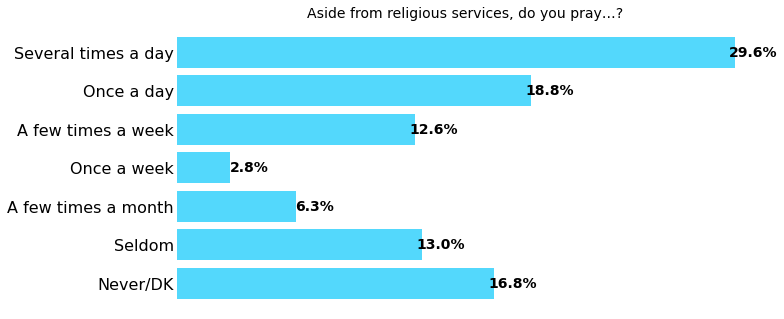

In [469]:
functions.univar_bar(data, 'weight', 'pray_rec', response_dict, wording_dict, figh = 4, nudge_dlab=1)

# race ethnicity

In [470]:
display(wording_dict['racethnusa'])
display(response_dict['racethnusa'])
display(data['racethnusa'].value_counts().sort_index())

'Race-Ethnicity in the U.S.'

{1.0: 'White non-Hispanic',
 2.0: 'Black non-Hispanic',
 3.0: 'Hispanic',
 4.0: 'Other',
 9.0: 'DK/Refused (VOL.)'}

1.0    1018
2.0     130
3.0     196
4.0     118
9.0      40
Name: racethnusa, dtype: int64

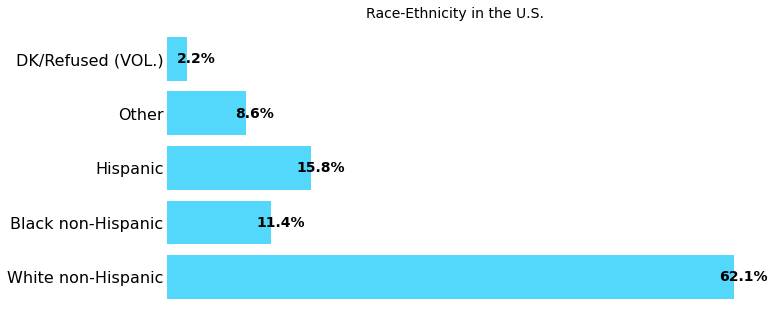

In [471]:
functions.univar_bar(data, 'weight', 'racethnusa', response_dict, wording_dict, figh = 4, nudge_dlab=1)

In [472]:
##################
# RACE/ETHN TXF ##
##################

data['is_white'] = np.where(data['racethnusa'] == 1, 1, 0)
data['is_black'] = np.where(data['racethnusa'] == 2, 1, 0)
data['is_hisp'] = np.where(data['racethnusa'] == 3, 1, 0)

# update meta dict with question wording
wording_dict['is_white'] = "Race-Ethnicity: White non-Hispanic"
wording_dict['is_black'] = "Race-Ethnicity: Black non-Hispanic"
wording_dict['is_hisp'] = "Race-Ethnicity: Hispanic"

# update labels dict with categories and labels
response_dict['is_white'] = {1: 'Yes', 0: 'No'}
response_dict['is_black'] = {1: 'Yes', 0: 'No'}
response_dict['is_hisp'] = {1: 'Yes', 0: 'No'}

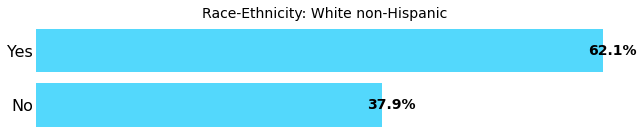

In [473]:
functions.univar_bar(data, 'weight', 'is_white', response_dict, wording_dict, figh = 1.5, nudge_dlab=1)

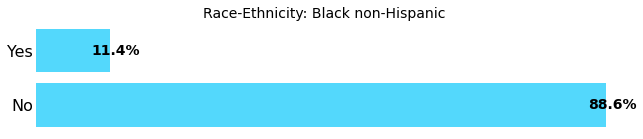

In [474]:
functions.univar_bar(data, 'weight', 'is_black', response_dict, wording_dict, figh = 1.5, nudge_dlab=1)

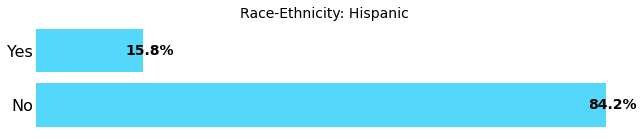

In [475]:
functions.univar_bar(data, 'weight', 'is_hisp', response_dict, wording_dict, figh = 1.5, nudge_dlab=1)

# party id

In [476]:
display(wording_dict['partysumusa'])
display(response_dict['partysumusa'])
display(data['partysumusa'].value_counts().sort_index())

'Party identification in the U.S. including leaners'

{1.0: 'Rep/Lean Rep', 2.0: 'Dem/Lean Dem', 9.0: 'DK/Ref-no lean'}

1.0    628
2.0    710
9.0    164
Name: partysumusa, dtype: int64

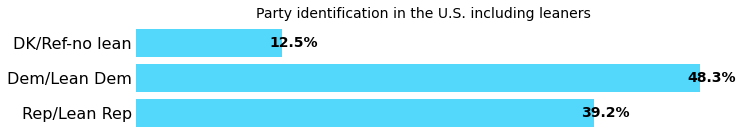

In [477]:
functions.univar_bar(data, 'weight', 'partysumusa', response_dict, wording_dict, figh = 1.5, nudge_dlab=1)

In [478]:
#################
# pid transform #
#################

conditions = [data['partysumusa'] == 1,
              data['partysumusa'] == 2,
              data['partysumusa'] == 9]
outputs = [-1, 1, 0]
data['pid_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
wording_dict['pid_rec'] = wording_dict['partysumusa']

# update labels dict with categories and labels
response_dict['pid_rec'] = {
    -1: "Rep/Lean Rep",
    0: "DK/Ref-no lean",
    1: "Dem/Lean Dem"
}

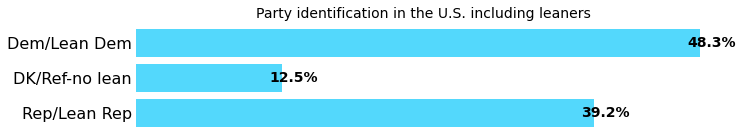

In [479]:
functions.univar_bar(data, 'weight', 'pid_rec', response_dict, wording_dict, figh = 1.5, nudge_dlab=1)

# generation

In [480]:
display(wording_dict['gen6_usa'])
display(response_dict['gen6_usa'])
display(data['gen6_usa'].value_counts().sort_index())

'Generation in the U.S.'

{1.0: 'Greatest and older (-1927)',
 2.0: 'Silent (1928-45)',
 3.0: 'Boomer (1946-64)',
 4.0: 'Xer (1965-80)',
 5.0: 'Millennial (1981-1996)',
 6.0: 'Gen Z (1997-)',
 9.0: 'DK/Ref'}

1.0      5
2.0    182
3.0    496
4.0    349
5.0    333
6.0     95
9.0     42
Name: gen6_usa, dtype: int64

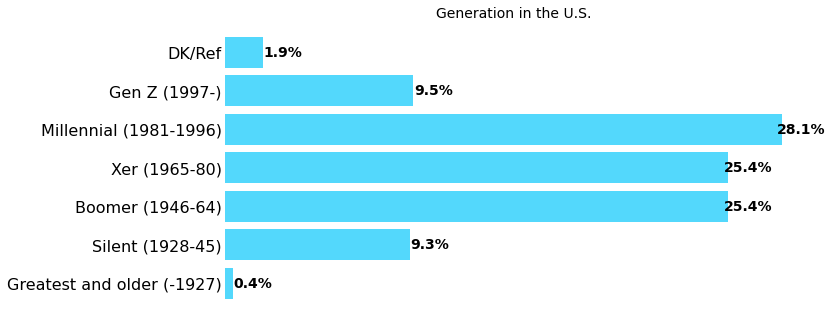

In [481]:
functions.univar_bar(data, 'weight', 'gen6_usa', response_dict, wording_dict, figh = 4, nudge_dlab=1)

In [482]:
##################
# generation TXF ##
##################

data['is_genz'] = np.where(data['gen6_usa'] == 6, 1, 0)
data['is_millennial'] = np.where(data['gen6_usa'] == 5, 1, 0)
data['is_genx'] = np.where(data['gen6_usa'] == 4, 1, 0)
data['is_boomer'] = np.where(data['gen6_usa'] == 3, 1, 0)
data['is_silent'] = np.where(data['gen6_usa'] == 2, 1, 0)

# update meta dict with question wording
wording_dict['is_genz'] = 'Generation in the U.S.: Gen Z (1997-)'
wording_dict['is_millennial'] = 'Generation in the U.S.: Millennial (1981-1996)'
wording_dict['is_genx'] = 'Generation in the U.S.: Xer (1965-80)'
wording_dict['is_boomer'] = 'Generation in the U.S.: Boomer (1946-64)'
wording_dict['is_silent'] = 'Generation in the U.S.: Silent (1928-45)'

# update labels dict with categories and labels
response_dict['is_genz'] = {1: 'Yes', 0: 'No'}
response_dict['is_millennial'] = {1: 'Yes', 0: 'No'}
response_dict['is_genx'] = {1: 'Yes', 0: 'No'}
response_dict['is_boomer'] = {1: 'Yes', 0: 'No'}
response_dict['is_silent'] = {1: 'Yes', 0: 'No'}

# living in household

In [483]:
display(wording_dict['HH1b'])
display(response_dict['HH1b'])
display(data['HH1b'].value_counts().sort_index())

'HH1b. How many people live in your household including yourself?'

{98.0: "Don't know (DO NOT READ)", 99.0: 'DK/Refused'}

1.0     289
2.0     510
3.0     276
4.0     214
5.0      98
6.0      49
7.0      21
8.0      24
99.0     21
Name: HH1b, dtype: int64

In [484]:
############
# hh txfm ##
############

data['hh_rec'] = np.where(data['HH1b'] > 9, 1, data['HH1b'])
wording_dict['hh_rec'] = wording_dict['HH1b']
response_dict['hh_rec'] = {
    1: "One person living in household",
    2: "Two people living in household",
    3: "Three people living in household",
    4: "Four people living in household",
    5: "Five people living in household",
    6: "Six people living in household",
    7: "Seven people living in household",
    8: "Eight or more people living in household"
}

In [485]:
model_cols = ['weight', 'q1_rec', 'q2a_rec', 'q2b_rec', 'q2c_rec', 'q2d_rec', 'q2e_rec', 
              'q4a_rec', 'q4b_rec', 'q4c_rec', 'q4d_rec', 'q4e_rec', 'q4f_rec', 'q4g_rec', 'q4h_rec',
              'q5_rec', 'q7_rec', 'q9a_rec', 'q11a_rec', 'q11b_rec', 'q11c_rec', 'q12a_rec', 'q12b_rec', 
              'q12c_rec', 'q15_rec', 'q16a_rec', 'q16b_rec', 'q18_rec', 'q19_rec', 'q20_rec', 'q23a_rec', 
              'q23b_rec', 'q23c_rec', 'q24a_rec', 'q24b_rec', 'q24c_rec', 'q24e_rec', 'q24f_rec', 'q25_rec', 
              'q26a_rec', 'q26b_rec', 'q26c_rec', 'q26d_rec', 'q26e_rec', 'q26f_rec', 'q26g_rec', 'q27_rec',
              'q28_rec', 'q29_rec', 'q30_rec', 'q31_rec', 'q32_rec', 'q33_rec', 'q34_rec', 'q36_rec', 
              'q37_rec', 'q39_rec', 'q40_rec', 'q41a_rec', 'q41b_rec', 'q41c_rec', 'q42_rec', 'q43_rec',
              'is_female', 'age_rec', 'educ_rec', 'ideo_rec', 'sc_bin', 'sc_count', 'is_christian', 
              'is_protestant', 'is_catholic', 'is_ath_ag', 'attend_rec', 'pray_rec', 'is_white', 'is_black',
              'is_hisp', 'pid_rec', "is_genz", "is_millennial", "is_genx", "is_boomer", "is_silent", 'hh_rec']